In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [176]:
# Definitions 

V_t = 1 # spiking threshold
dt =  0.1*10**-3 #time step
t = 20*10**-3 # membrane time constant
N = 1000 # number of neurons per population
K = 100 # connections per neuron
rx = 10 # firing rate in population x

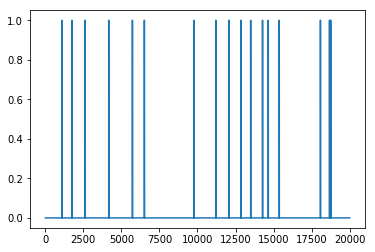

In [3]:
# excersise 1

t_sample = 2

#sample each dirrectly from a benoilli distribution with prob rxdt
fire_prob = rx*dt
activity = np.random.binomial(1,fire_prob,(int(t_sample/dt),N)) # store the spike trains for N independant neurons in X

plt.plot(activity[:,0])
plt.show()

In [4]:
def raster_plot(activity,dt):
    # activity is (samples,N) big
    #plot graph with dot at position (kdt,i) if neuron i fires at time kdt
    
    times, neurons = np.nonzero(activity) # gets the indices of the neurons that fired
    times = times*dt
    plt.figure(figsize=(20, 20))
    plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
    plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
    plt.rc('xtick', labelsize='xx-large')  # fontsize of the tick labels
    plt.rc('ytick', labelsize='xx-large')  # fontsize of the tick labels
    plt.rc('legend', fontsize='xx-large')
    
    
    plt.scatter(times,neurons,marker='x')
    plt.ylabel('Neuron in X')
    plt.xlabel('Time/s')
    plt.show() 



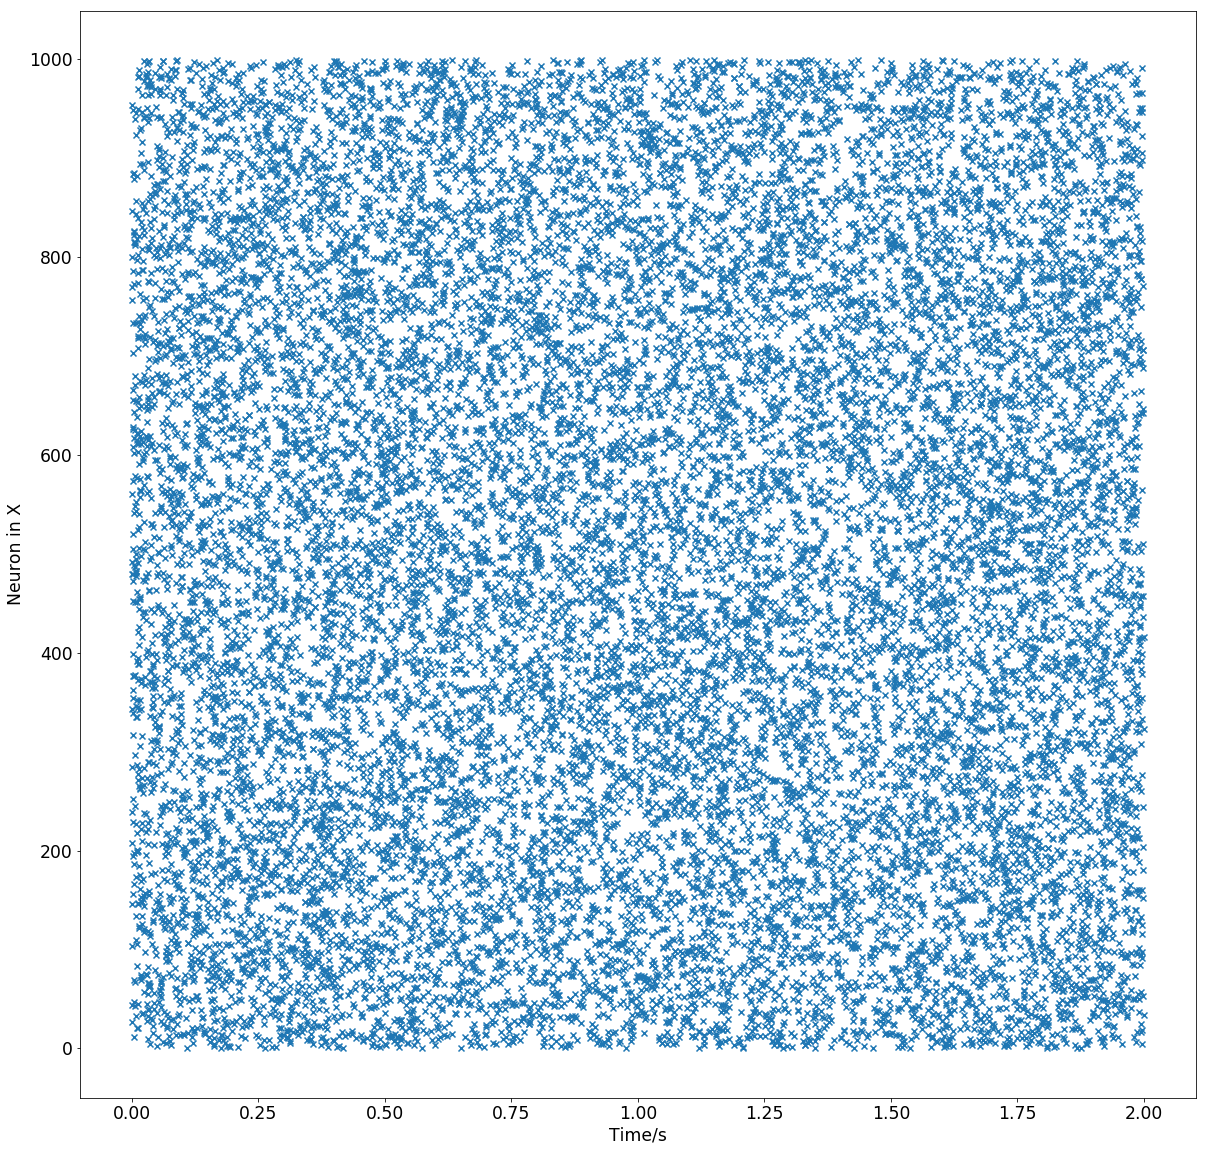

In [5]:
raster_plot(activity,dt)

In [41]:
fired_per_neuron = sum(activity,0)

print(activity.shape)

ave_fired = np.average(fired_per_neuron)
print(ave_fired)

print(t_sample/dt*fire_prob)

(20000, 1000)
20.06
20.0


In [7]:
# E and I populations are leaky integrate and fire neurons
def single_LIF_neuron(tau,w,Sj,dt,V_t):
    samples = Sj.shape[0]
    V = np.zeros(samples)
    Si = np.zeros(samples)
    for i in range(samples-1): #calculate discrete time membrane potential
        #k = i+1
        #print(V[i])
        V[i+1]=V[i]+dt*(-V[i]/tau + w*Sj[i])
        #print(V[i+1])
        if V[i+1]>V_t:
            V[i+1]=0
            Si[i+1] = 1/dt
    #print(V)
    #plt.plot(Sj)
    #plt.plot(Si)
    #plt.plot(V)
    #plt.show()        
            
    plt.figure(figsize=(20, 20))
    plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
    plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
    plt.rc('xtick', labelsize='xx-large')  # fontsize of the tick labels
    plt.rc('ytick', labelsize='xx-large')  # fontsize of the tick labels
    plt.rc('legend', fontsize='xx-large')
    
    times,neurons = np.nonzero(Sj) # gets the indices of the neurons that fir
    times = times*dt
    plt.scatter(times,np.ones(times.shape),marker='x',color='g',label='Sj')
    times = np.nonzero(Si) # gets the indices of the neurons that fired
    times = times[0]*dt
    
    plt.scatter(times,np.ones(times.shape)*1.05,marker='x',color='r',label='Si')
    
    times= np.arange(0,samples*dt,dt)
    plt.plot(times,V,color='b',label='Vi')
    
    plt.ylabel('Membrane Potential/V')
    plt.xlabel('Time/s')
    plt.legend(loc = 'lower left')
    plt.show()

In [8]:
def gen_spike_train(t_sample,N,dt,rx):
    fire_prob = rx*dt
    activity = np.random.binomial(1,fire_prob,(int(t_sample/dt),N)) # store the spike trains for N independant neurons in X
    return activity/dt

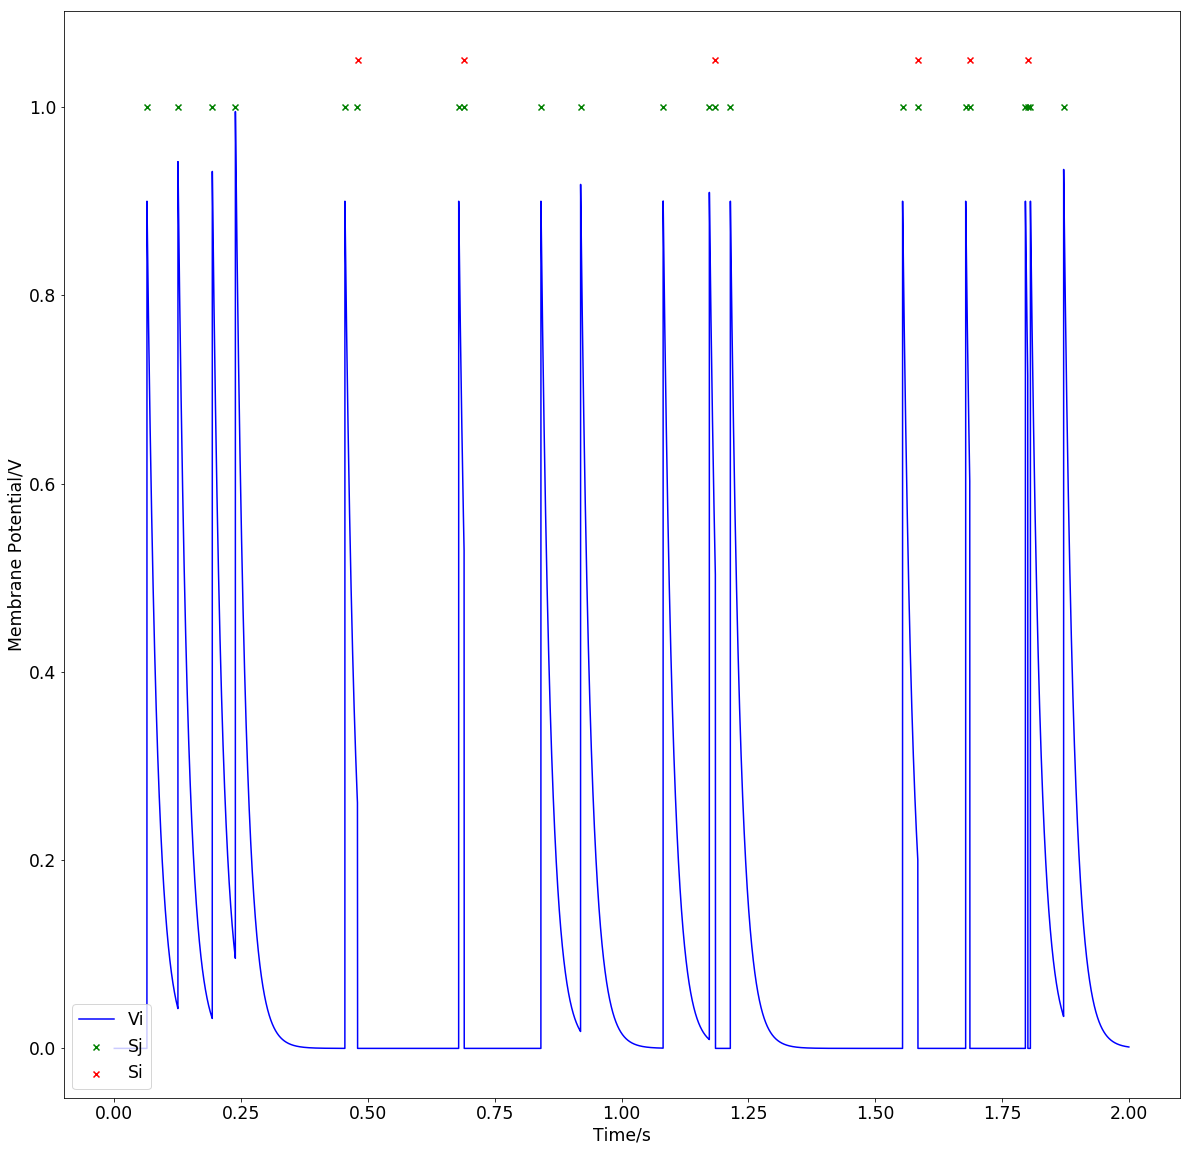

In [9]:
Sj = gen_spike_train(2,1,dt,rx)
w=0.9
single_LIF_neuron(t,w,Sj,dt,V_t)

In [115]:
# E and I populations are leaky integrate and fire neurons
def single_LIF_neuron_multi_input(tau,w,Sj,dt,V_t,reset = True,inputs=True,outputs=True):
    samples = Sj.shape[0]
    K = Sj.shape[1]
    V = np.zeros(samples)
    Si = np.zeros(samples)
    
    input_sum = np.sum(Sj,1)
    for i in range(samples-1): #calculate discrete time membrane potential
        #k = i+1
        #print(V[i])
        V[i+1]=V[i]+dt*(-V[i]/tau + w*input_sum[i]/K)
        #print(V[i+1])
        if V[i+1]>V_t:
            if reset ==True:
                V[i+1]=0
            Si[i+1] = 1/dt
    #print(V)
    #plt.plot(Sj)
    #plt.plot(Si)
    #plt.plot(V)
    #plt.plot(input_sum)
    #plt.show()        
    print(np.var(V))        
    plt.figure(figsize=(20, 20))
    plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
    plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
    plt.rc('xtick', labelsize='xx-large')  # fontsize of the tick labels
    plt.rc('ytick', labelsize='xx-large')  # fontsize of the tick labels
    plt.rc('legend', fontsize='xx-large')
    
    if inputs == True:
        times,neurons = np.nonzero(Sj) # gets the indices of the neurons that fir
        times = times*dt
        plt.scatter(times,np.ones(times.shape),marker='x',color='g',label='Sj')
    
    if outputs == True:    
        times = np.nonzero(Si) # gets the indices of the neurons that fired
        times = times[0]*dt
        plt.scatter(times,np.ones(times.shape)*1.05,marker='x',color='r',label='Si')
        rate = times.shape[0]/(samples*dt)
        print('rate = ',rate )
        
        window = int(0.1 /dt)
        counts = np.zeros(samples-window)
        for i in range(samples-window):
            counts[i] = np.sum(Si[i:i+window])*dt
        c_mean = np.average(counts)
        c_var = np.std(counts)**2
        
        fano_factor = c_var/c_mean
        print('fano factor = ',fano_factor )
        
        
    times= np.arange(0,samples*dt,dt)
    plt.plot(times,V,color='b',label='Vi')
    
    plt.ylabel('Membrane Potential/V')
    plt.xlabel('Time/s')
    plt.legend(loc = 'lower left')
    plt.show()

0.10129606766588442


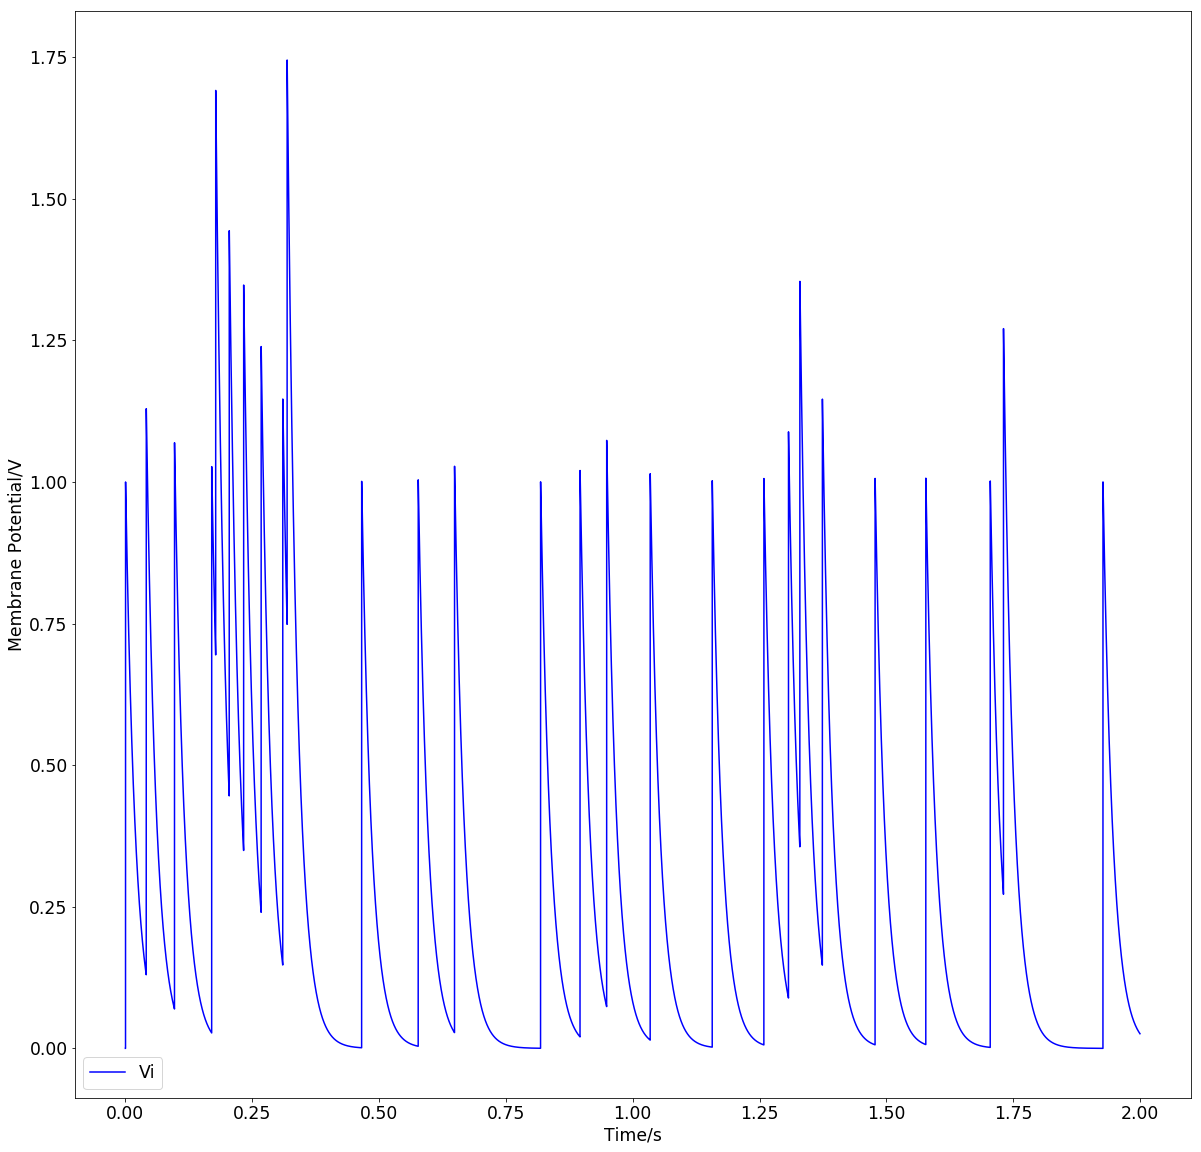

In [118]:
K=1
Sj = gen_spike_train(2,K,dt,rx)
w=1
single_LIF_neuron_multi_input(t,w,Sj,dt,V_t,False,False,False)

In [126]:
def comp_mean_cov(tau,w,Sj,dt,V_t,reset = True,discard=0.1):
    samples = Sj.shape[0]
    K = Sj.shape[1]
    V = np.zeros(samples)
    Si = np.zeros(samples)   
    input_sum = np.sum(Sj,1)
    for i in range(samples-1): #calculate discrete time membrane potential
        #k = i+1
        V[i+1]=V[i]+dt*(-V[i]/tau + w*input_sum[i]/K)
        if V[i+1]>V_t:
            if reset ==True:
                V[i+1]=0
            Si[i+1] = 1/dt
            
    mean = np.average(V[int(discard/dt):])
    sd = np.std(V[int(discard/dt):])
    print(sd**2)
    return [mean,sd**2]

100


In [155]:
N=1000
ks = np.array([1,10,25,50,100,500,800,900,1000])
moments = np.zeros((ks.shape[0],2))
rx=10
w=1
t = 0.02
for i in range(ks.shape[0]):
    Sj = gen_spike_train(10,ks[i],dt,rx)
    moments[i,:] = comp_mean_cov(t,w,Sj,dt,V_t,False)

    
    


4.5723651336616244
0.25817698880916623
0.09017452223896277
0.04533691095012037
0.02747635597846192
0.005273062544136729
0.002648105708800207
0.0031929637843962698
0.0026735549996655906


In [131]:
print(moments)

[[2.13776807e-01 1.07475487e-01]
 [2.07267672e-01 1.00870314e-02]
 [1.96505031e-01 3.85927679e-03]
 [2.02811754e-01 2.20531143e-03]
 [2.00050849e-01 9.89448390e-04]
 [1.99908463e-01 1.87685713e-04]
 [1.99444377e-01 1.17287905e-04]
 [1.98923150e-01 1.04985359e-04]
 [2.00862599e-01 1.10514842e-04]]


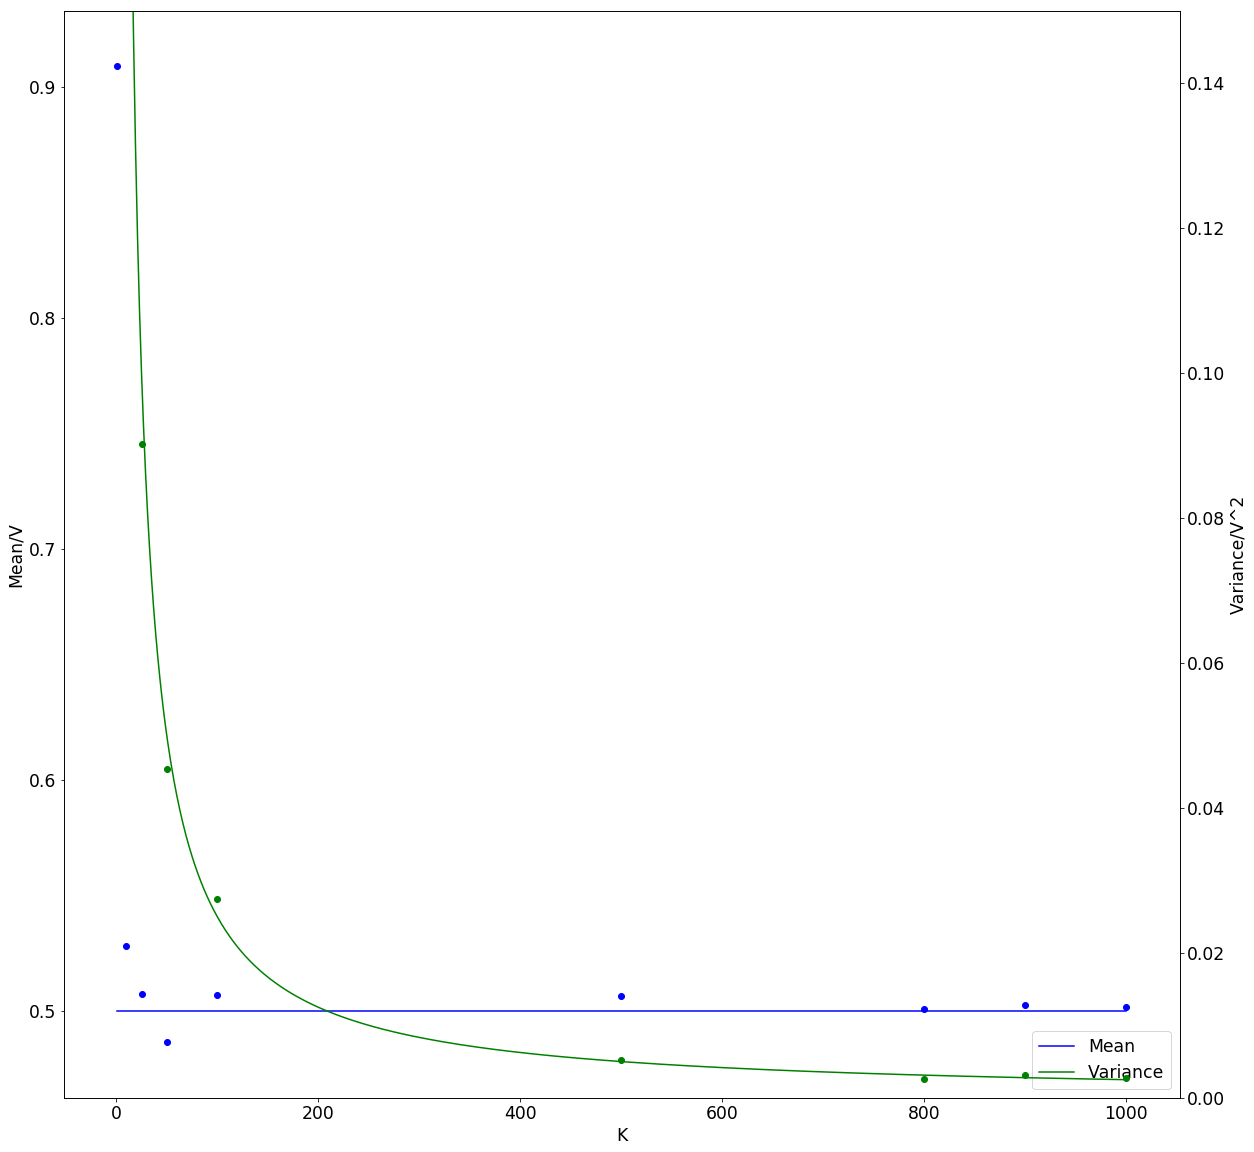

In [156]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(111)
plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
plt.rc('xtick', labelsize='xx-large')  # fontsize of the tick labels
plt.rc('ytick', labelsize='xx-large')  # fontsize of the tick labels
plt.rc('legend', fontsize='xx-large')

pp= ax1.scatter(ks,moments[:,0],color='b',label='simulated means')
ax2 = ax1.twinx()
mp= ax2.scatter(ks,moments[:,1],color='g',label='simulated variance')

ax1.set_ylabel('Mean/V')
ax2.set_ylabel('Variance/V^2')
ax1.set_xlabel('K')


points = np.linspace(1,ks[-1],1000)
var = t *w**2 *rx/(2*points )
me = np.ones(points.shape)*t*w*rx

pp = ax1.plot(points,me, color = 'b', label = 'Mean')
mm = ax2.plot(points,var,color = 'g',label = 'Variance')
ax2.set_ylim(0,0.15)
lns = pp + mm
labs=[l.get_label() for l in lns]
ax1.legend(lns, labs,loc='lower right')
#plt.legend(loc='upper right')
plt.show()

5.0


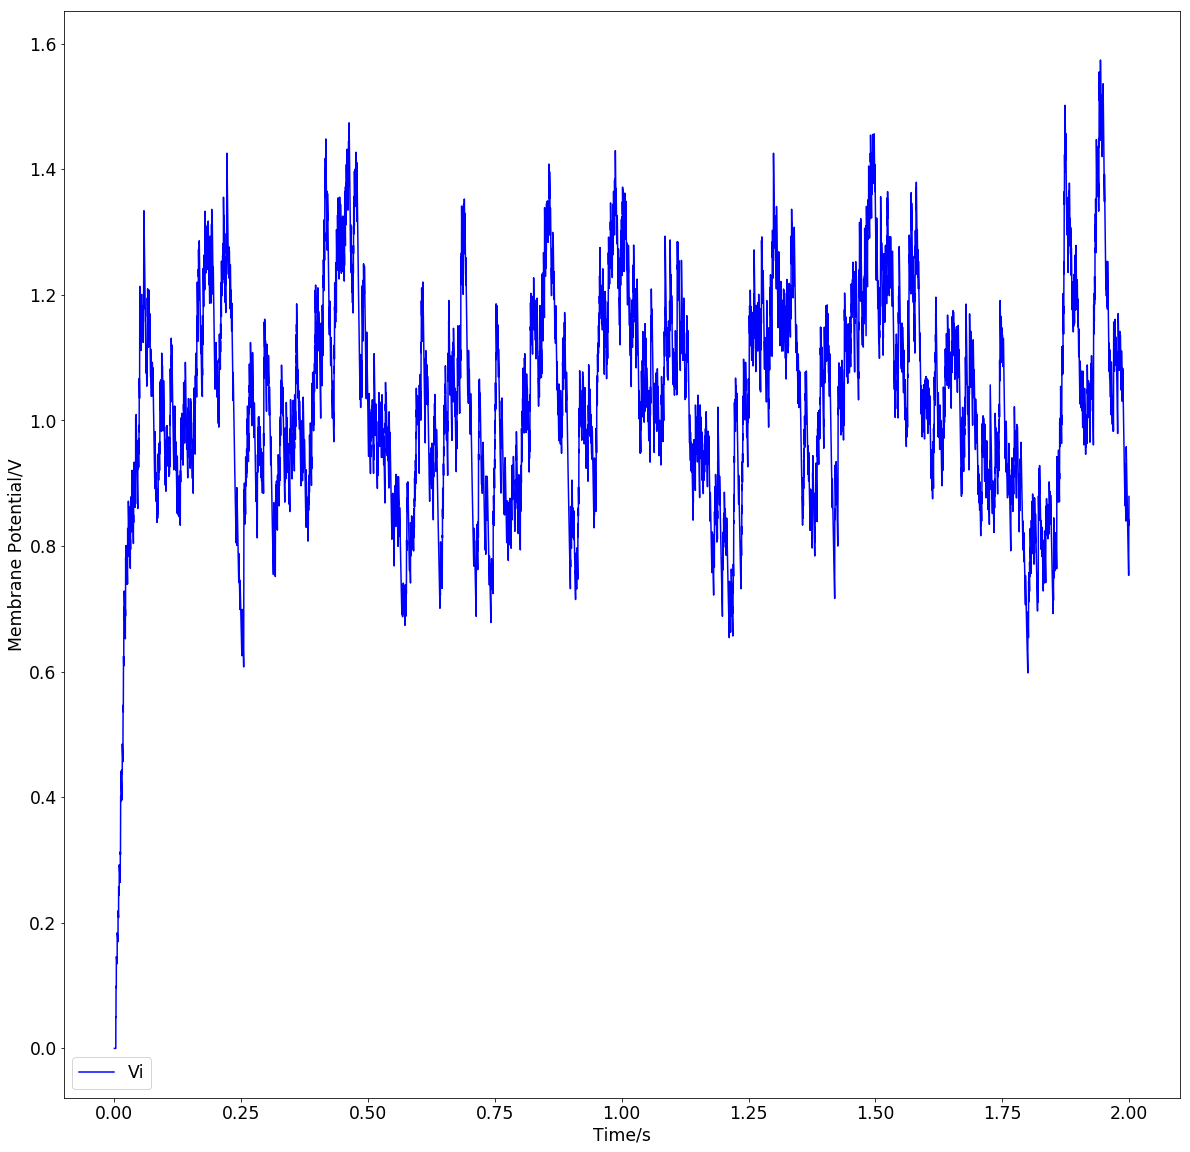

1.040911663831851
0.026934695464011043


In [15]:
w = V_t/(t*rx)
print(w)
Sj = gen_spike_train(2,K,dt,rx)
single_LIF_neuron_multi_input(t,w,Sj,dt,V_t,False,False,False)

mean, cov = comp_mean_cov(t,w,Sj,dt,V_t,False)
print(mean)
print(cov)

4.1000000000000005
0.043788247292829374
rate =  9.0
fano factor =  0.4307952208449459


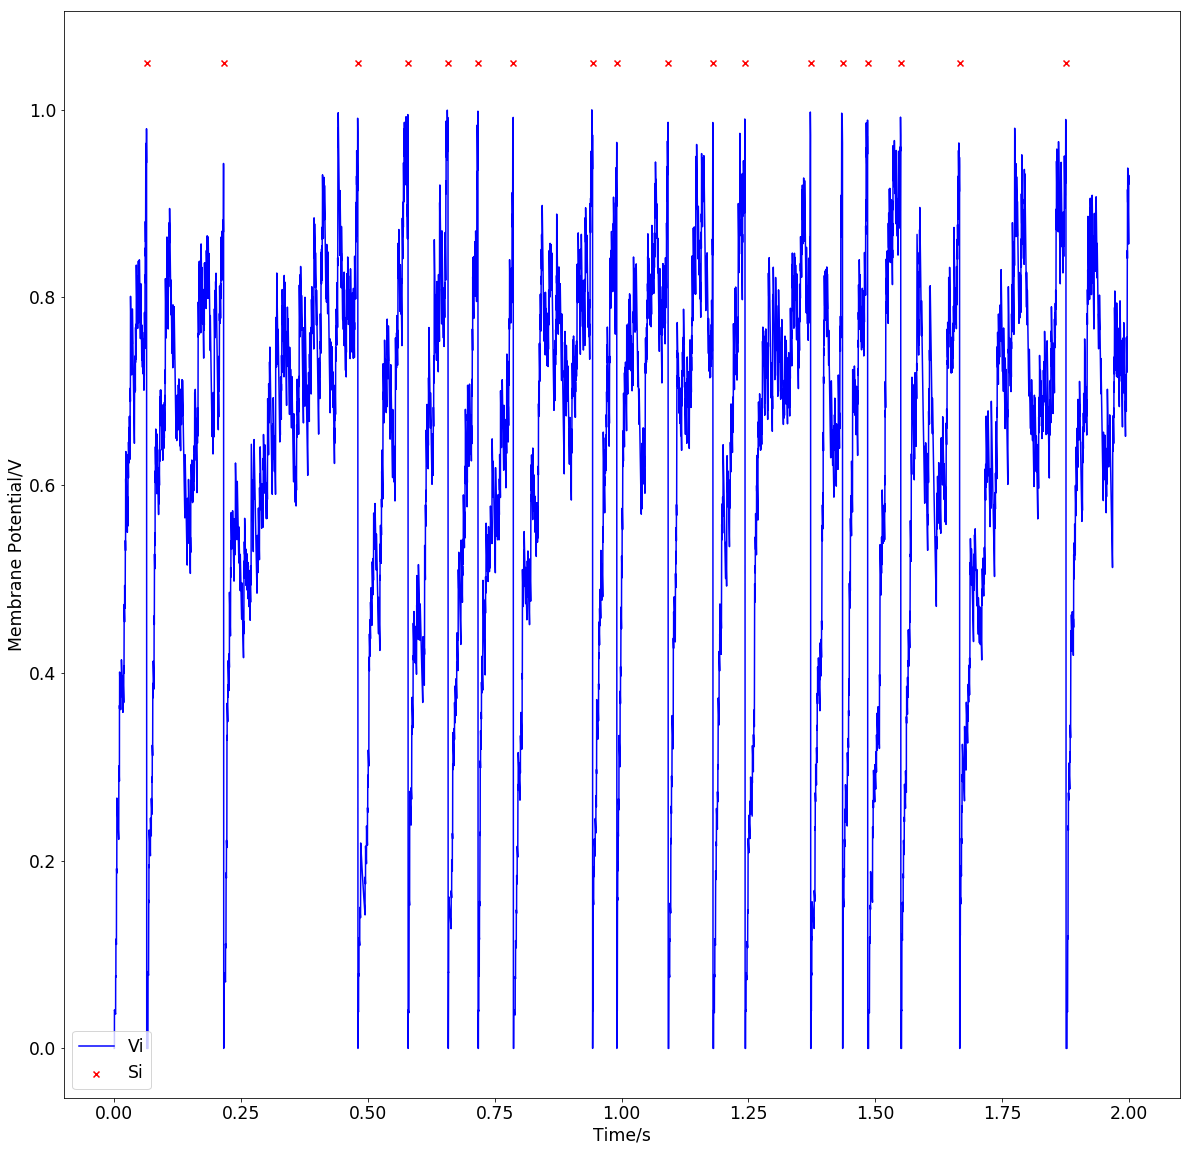

4.11
0.04365575908223617
rate =  8.0
fano factor =  0.36884030292507897


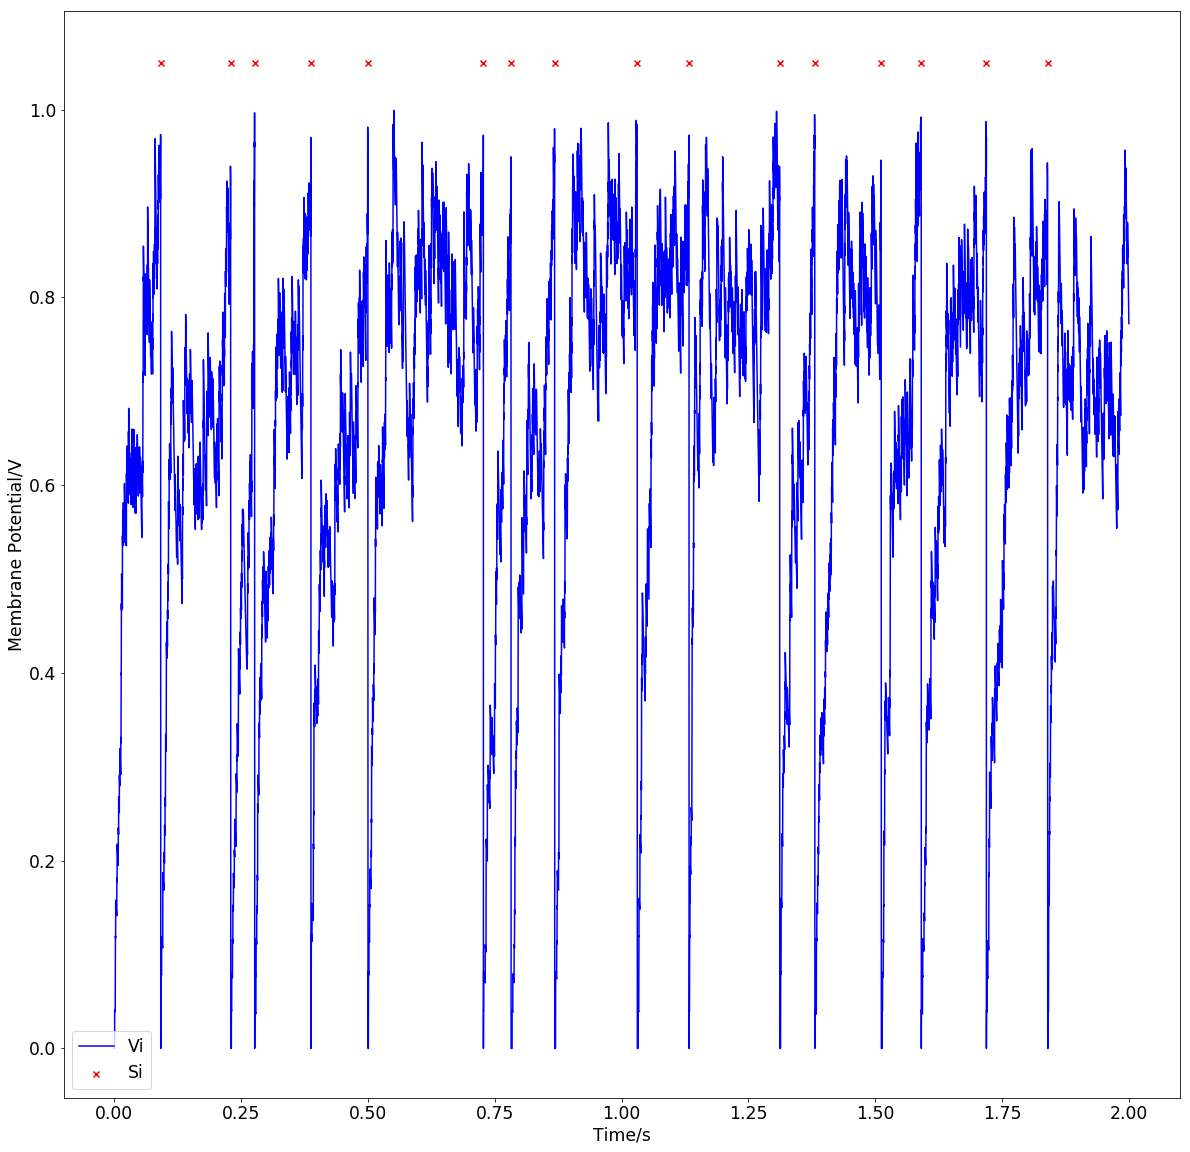

4.12
0.04739386241044192
rate =  7.0
fano factor =  0.42648267678032614


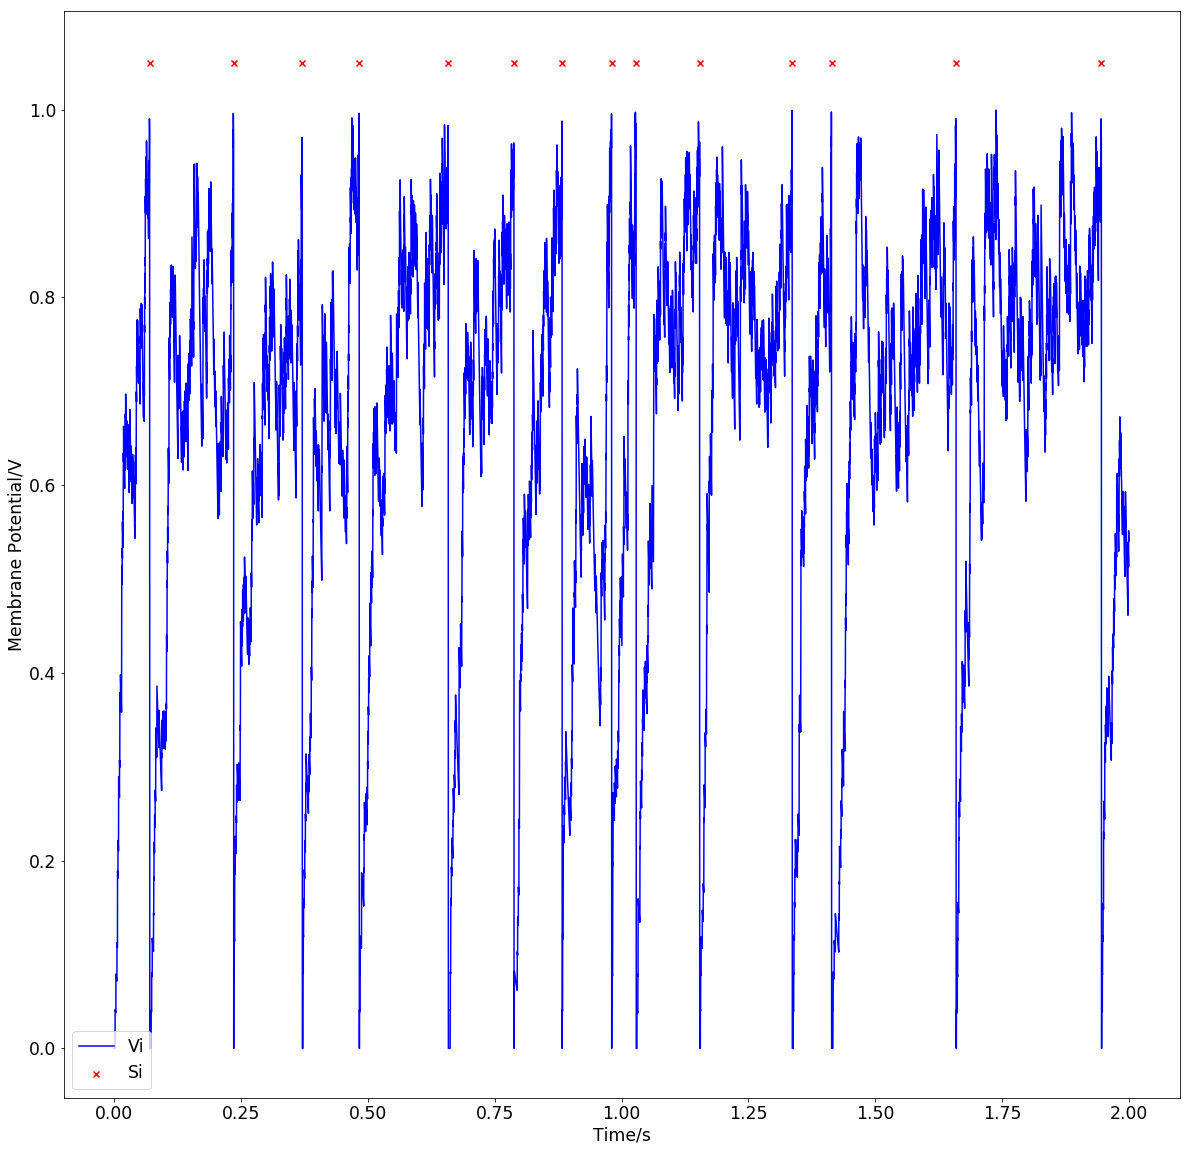

4.13
0.039141360786939715
rate =  7.0
fano factor =  0.5067974492600126


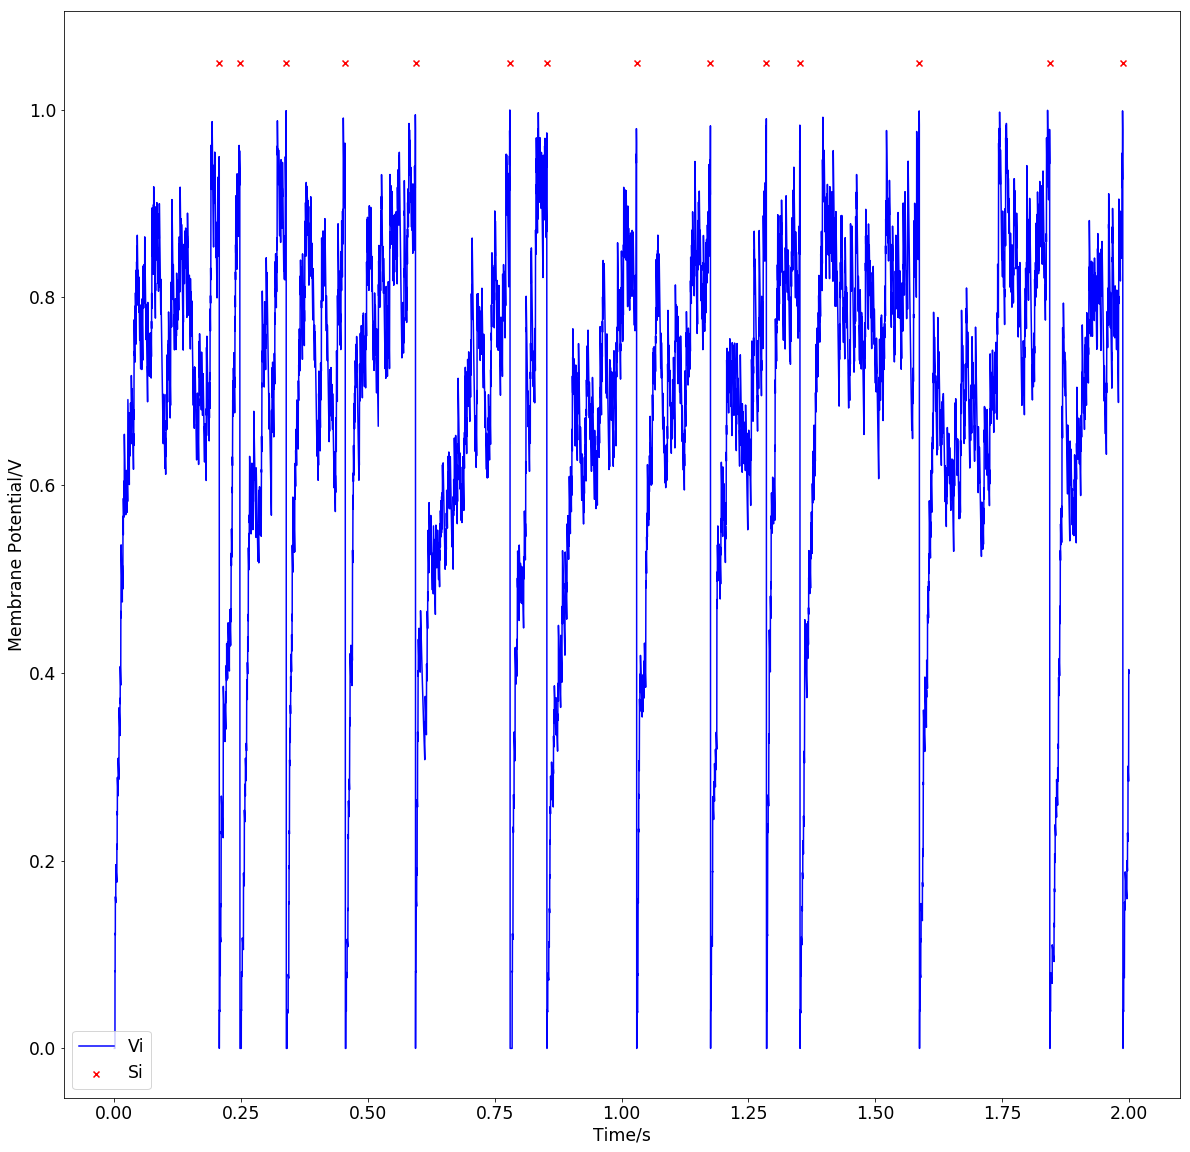

4.140000000000001
0.04304799498187661
rate =  7.5
fano factor =  0.5484876515348065


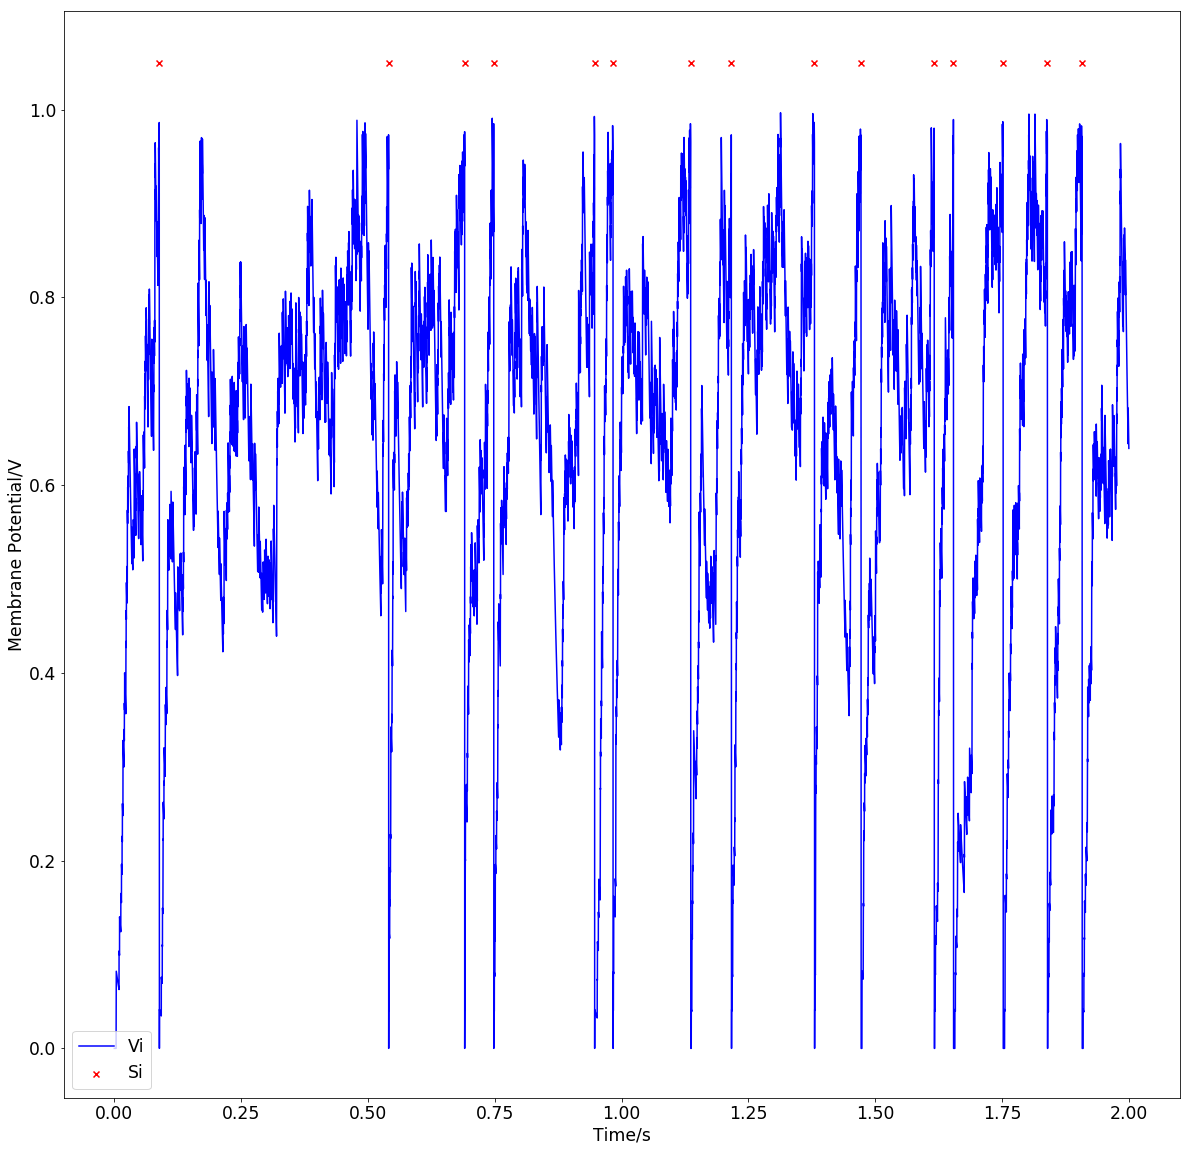

4.15
0.053189788055806354
rate =  10.5
fano factor =  0.3491102231748768


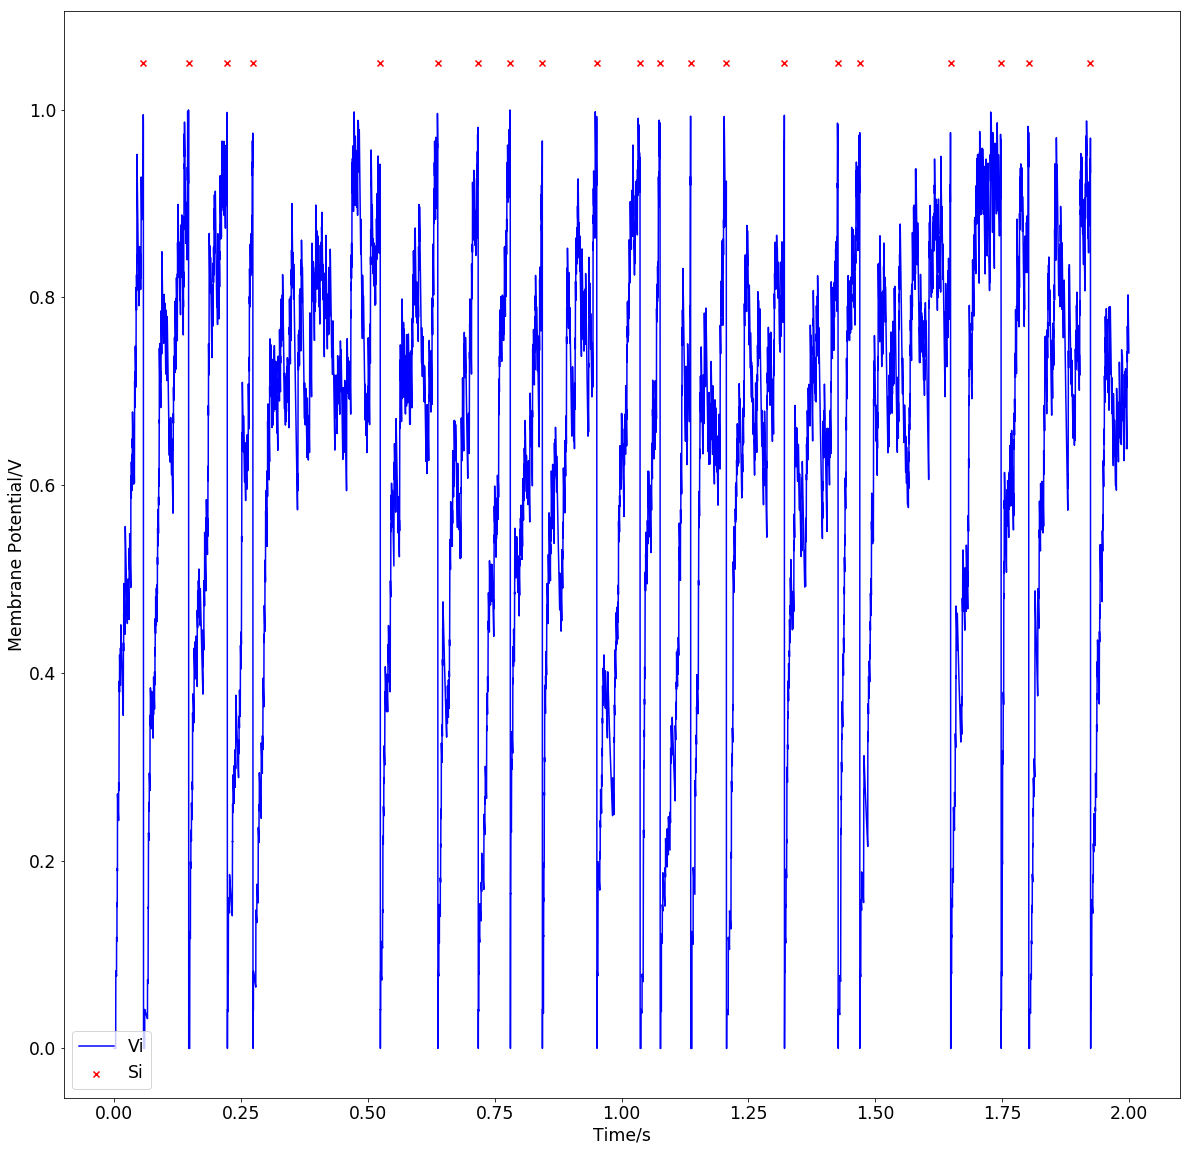

4.16
0.03766908006243167
rate =  7.0
fano factor =  0.4963007518796993


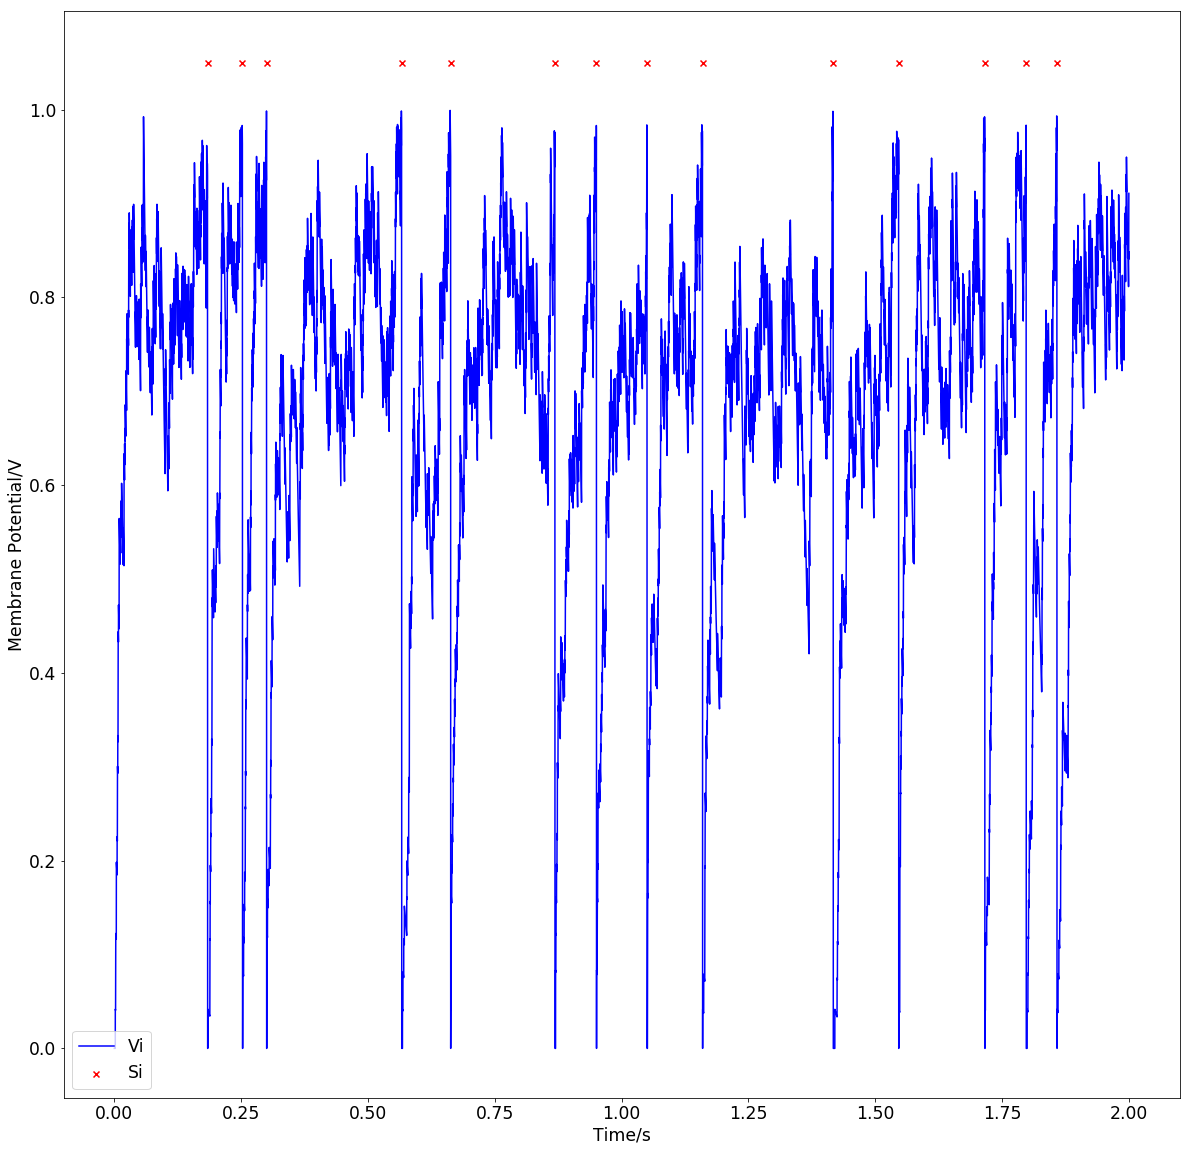

4.17
0.04867578331986638
rate =  9.0
fano factor =  0.4834093567251462


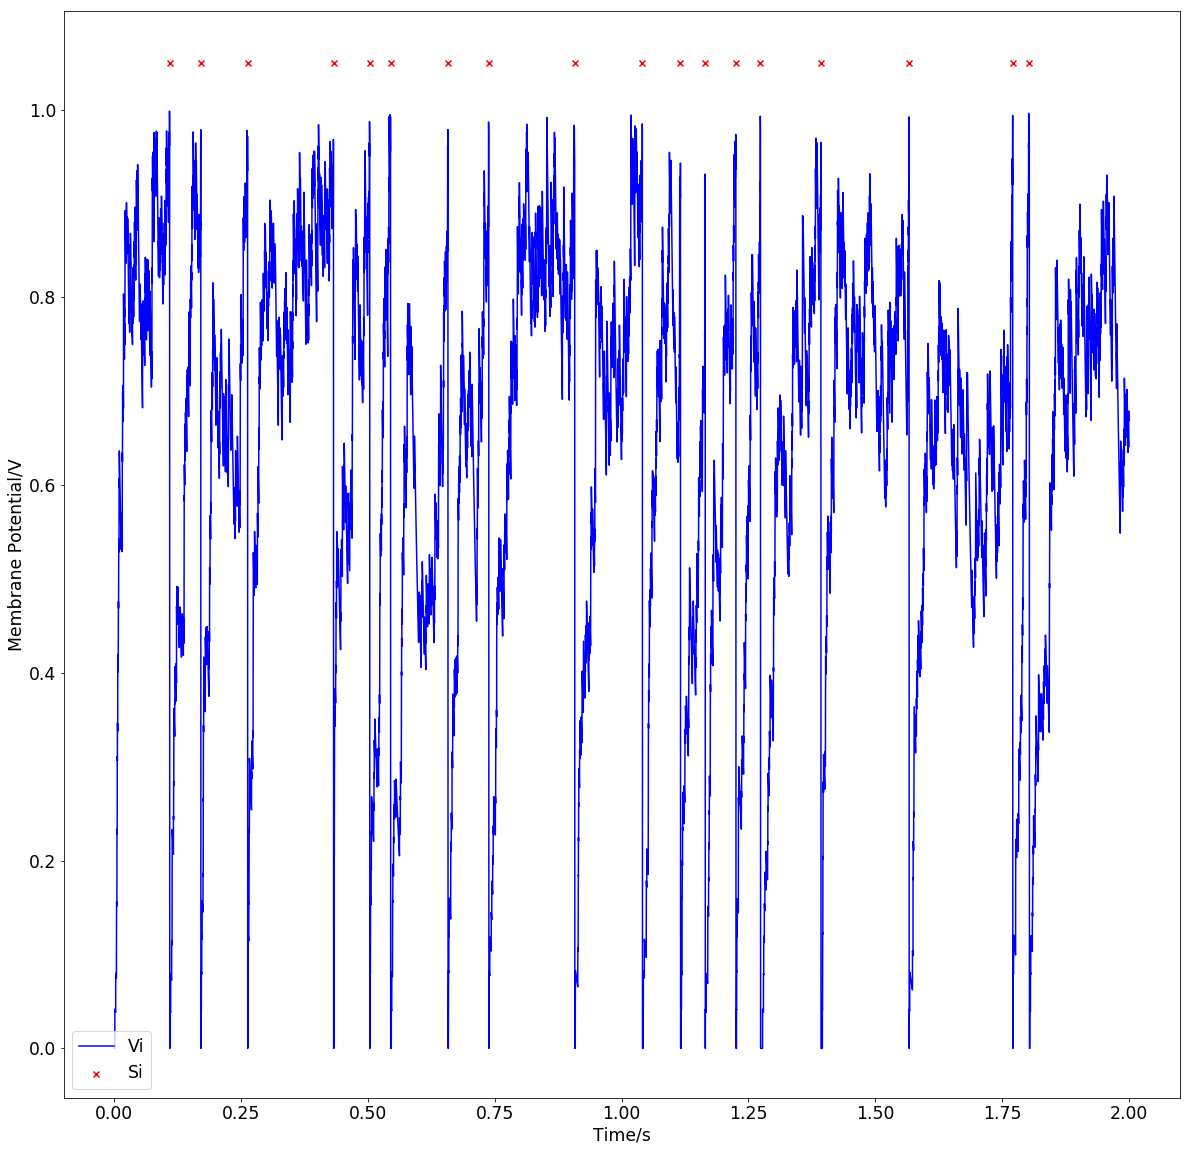

4.180000000000001
0.04200426380485321
rate =  8.5
fano factor =  0.5159902979104867


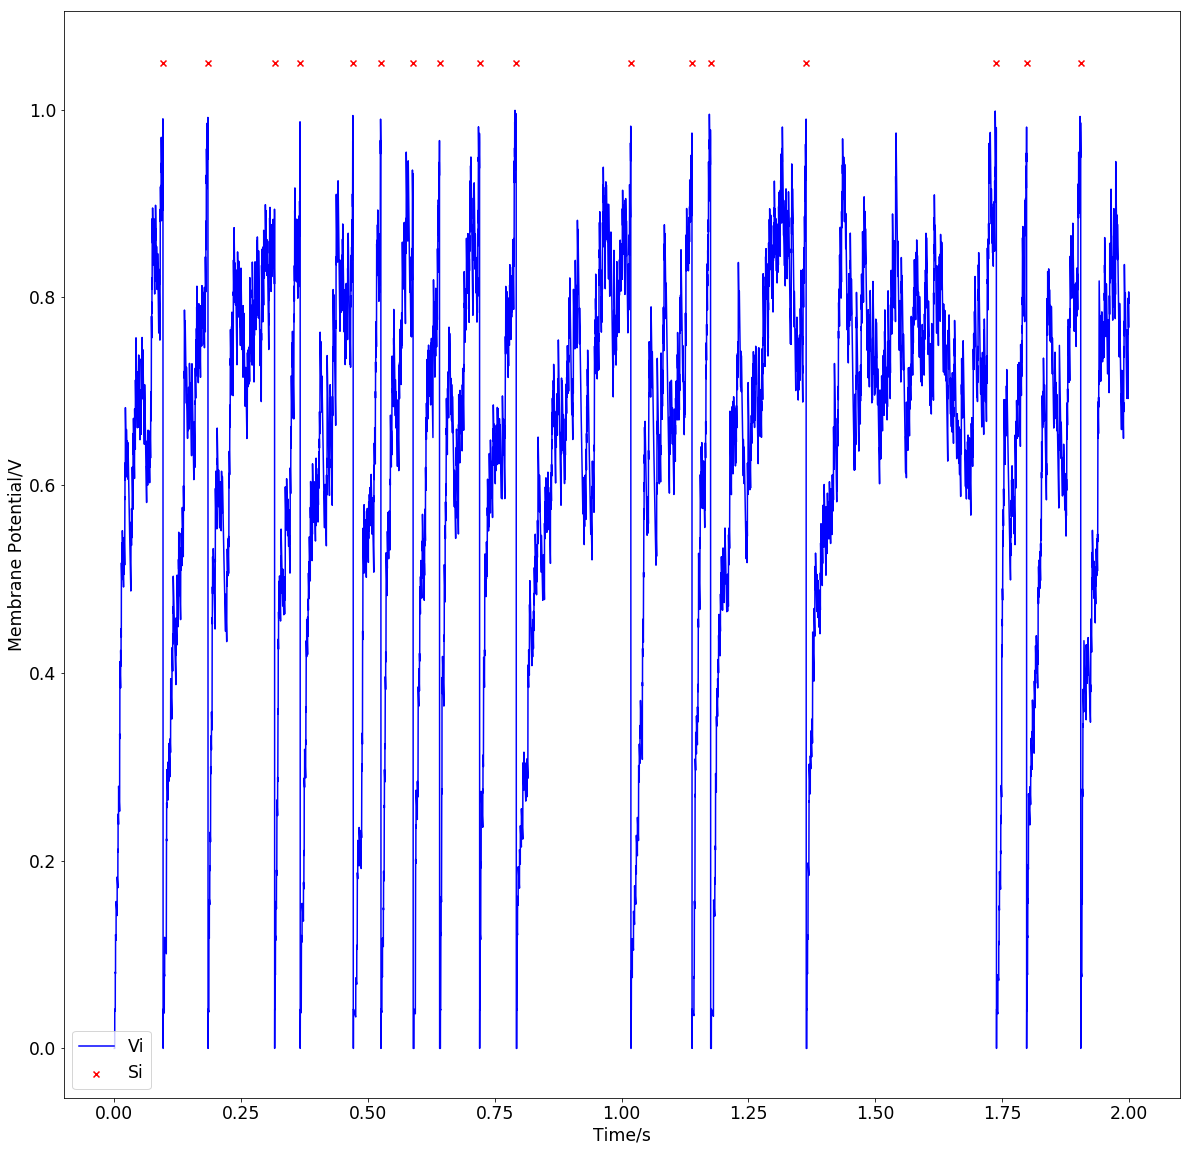

4.19
0.05275397325407912
rate =  11.5
fano factor =  0.4513521808751265


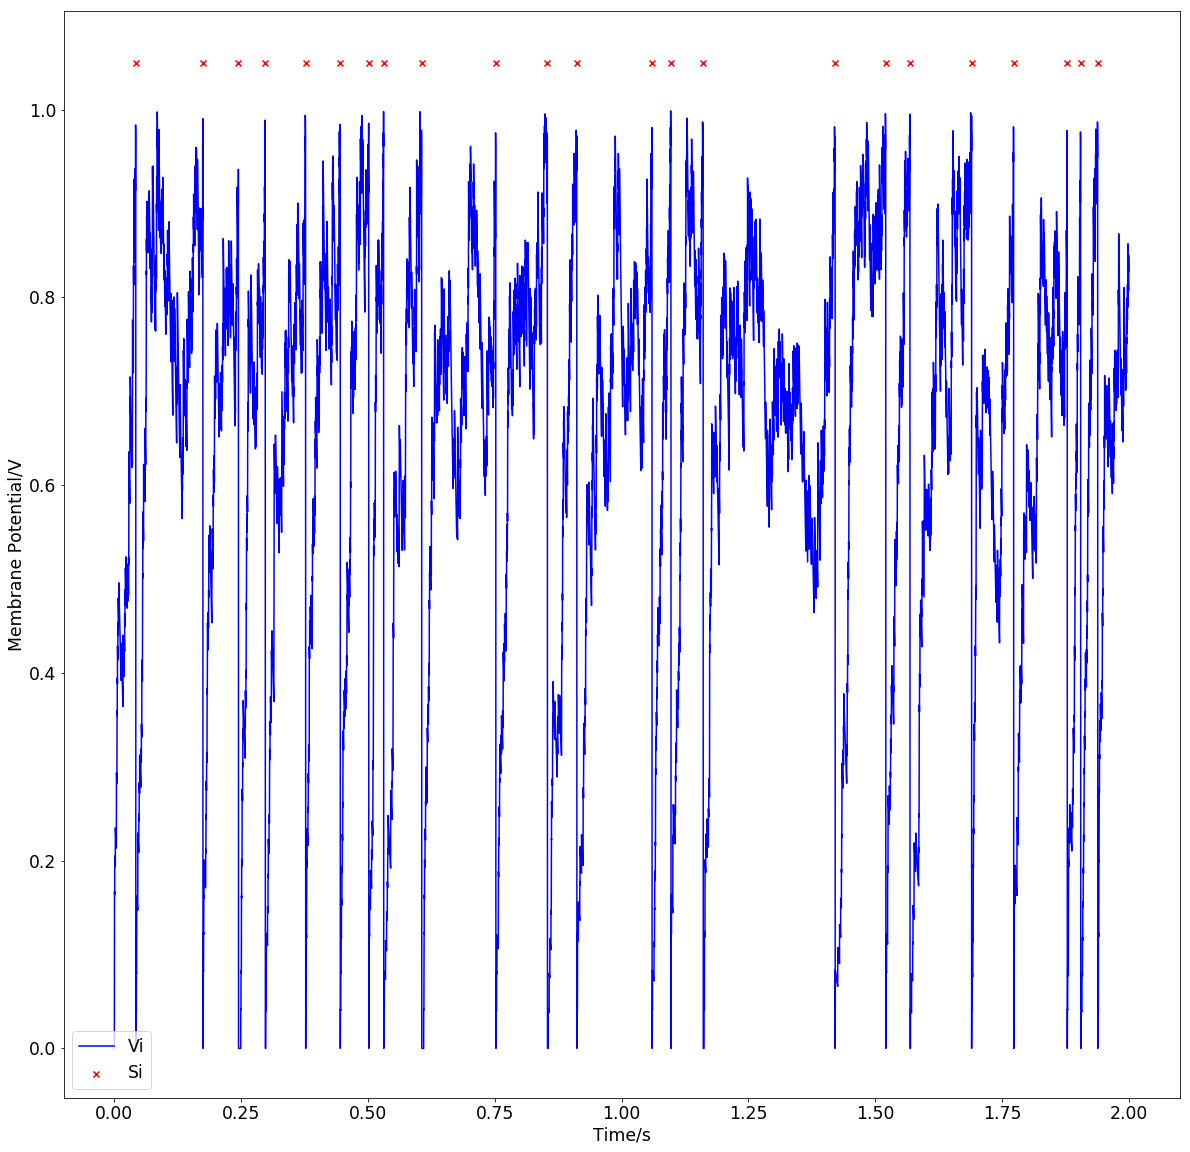

4.2
0.04221148076967108
rate =  7.5
fano factor =  0.707798579021459


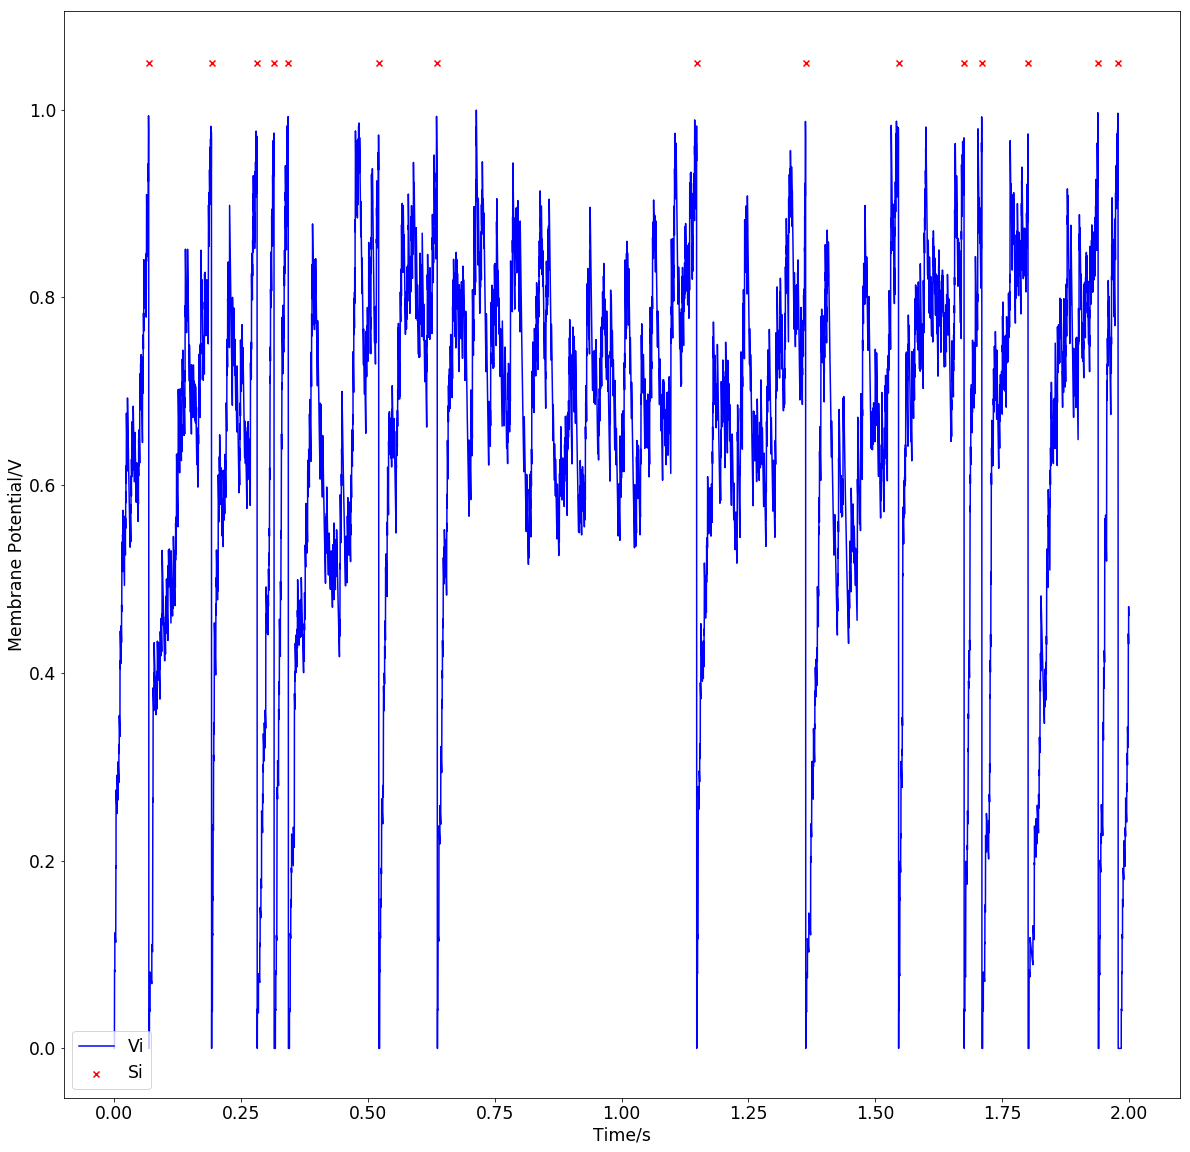

4.21
0.045331183696741696
rate =  9.5
fano factor =  0.5231369815266643


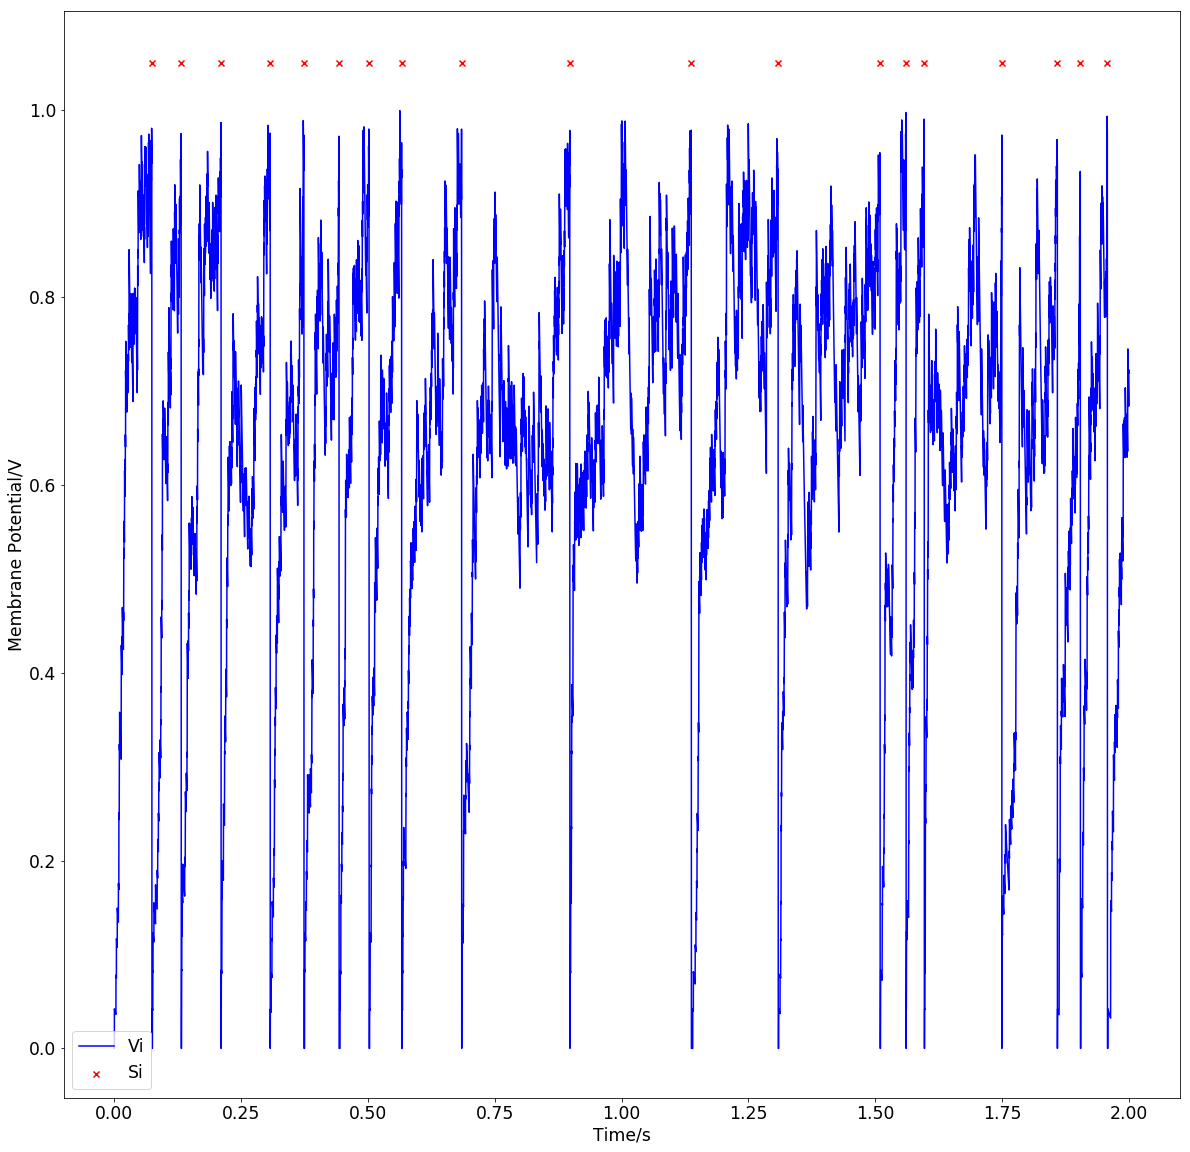

4.22
0.05032096141924966
rate =  10.5
fano factor =  0.41816541353383463


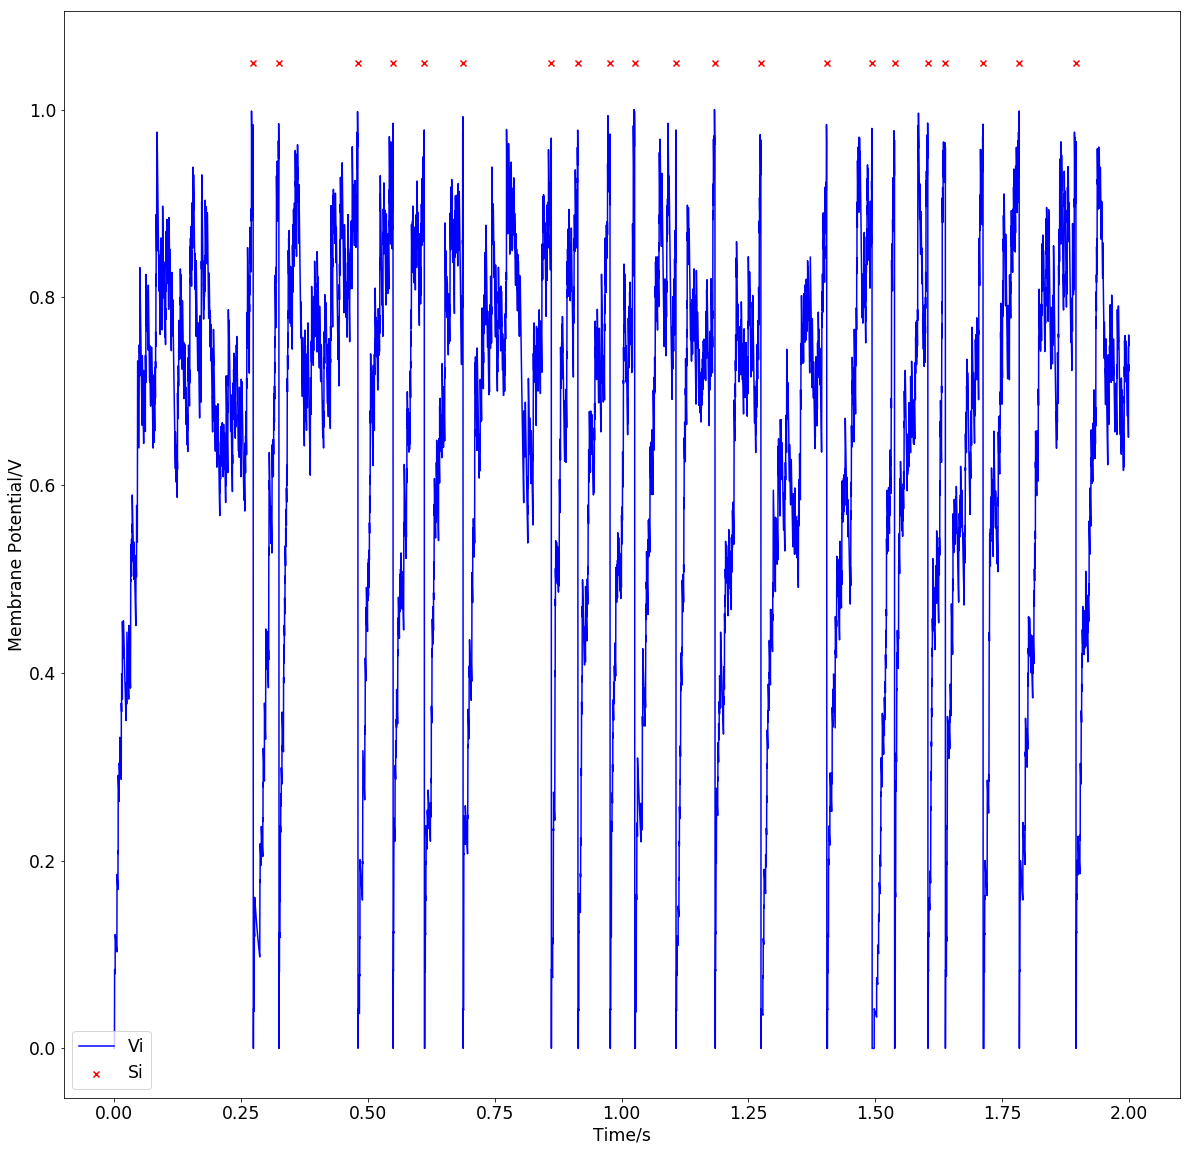

4.23
0.04447566567056318
rate =  9.5
fano factor =  0.5007590566758972


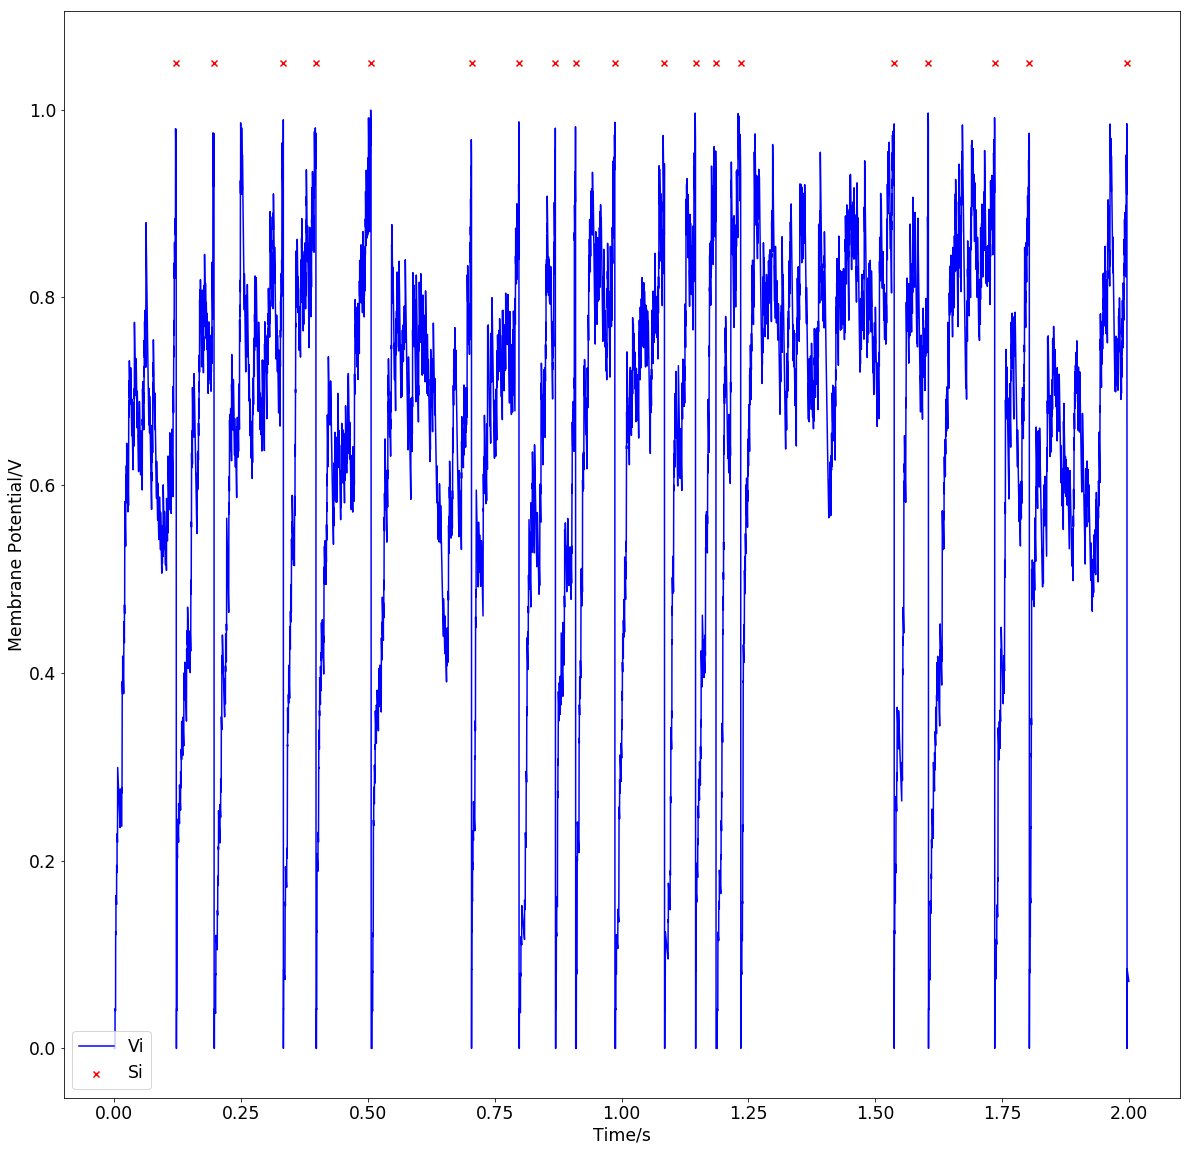

4.24
0.049379500730595216
rate =  10.5
fano factor =  0.42517135862913097


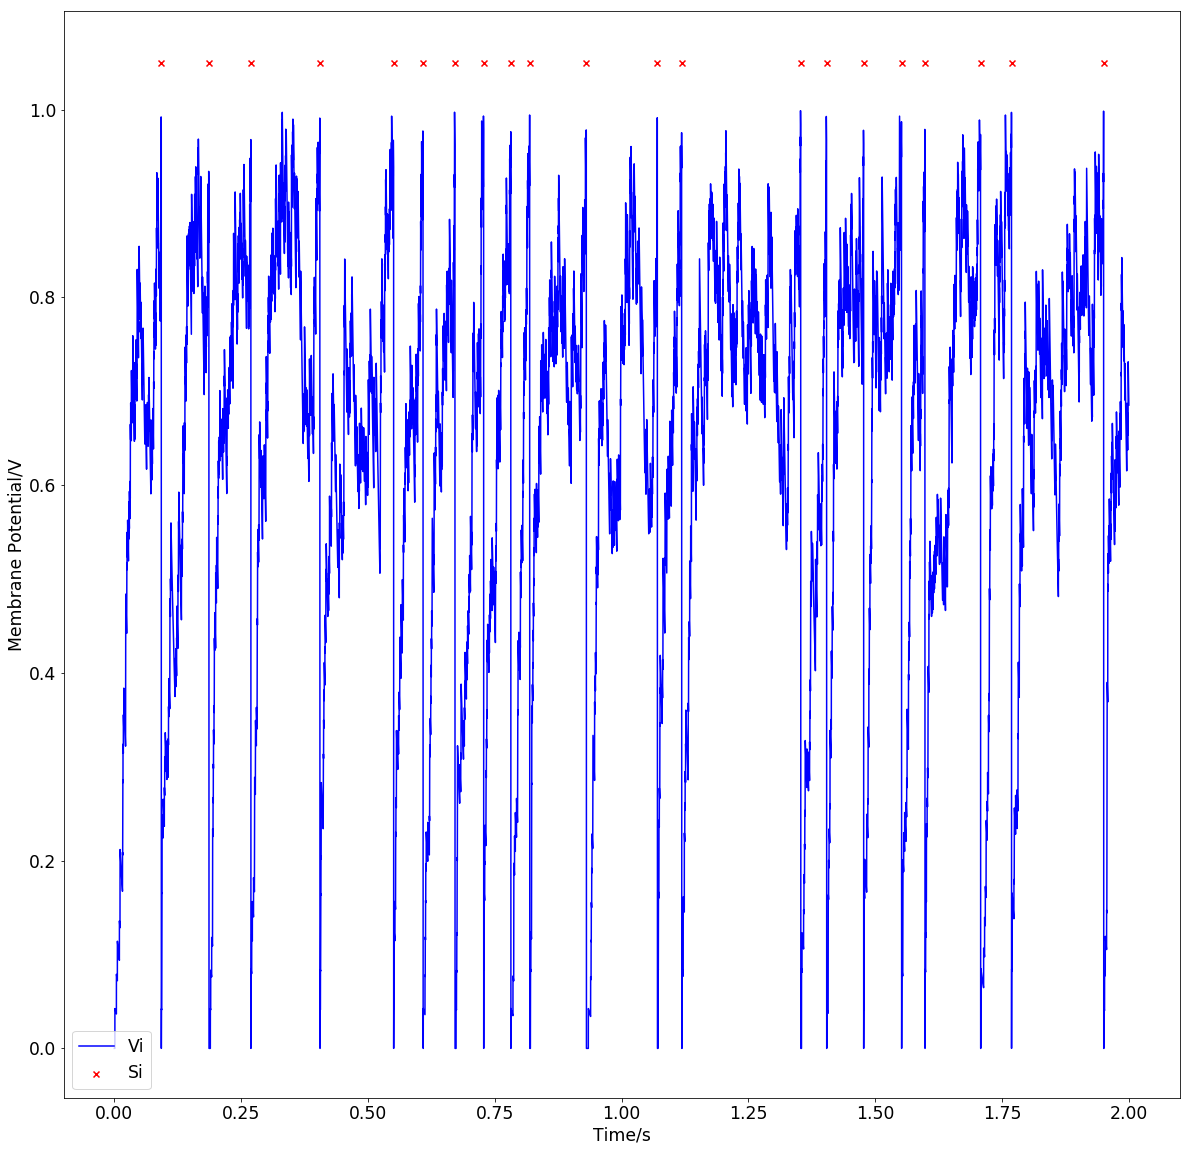

4.25
0.0450608569589321
rate =  8.5
fano factor =  0.5016160990712074


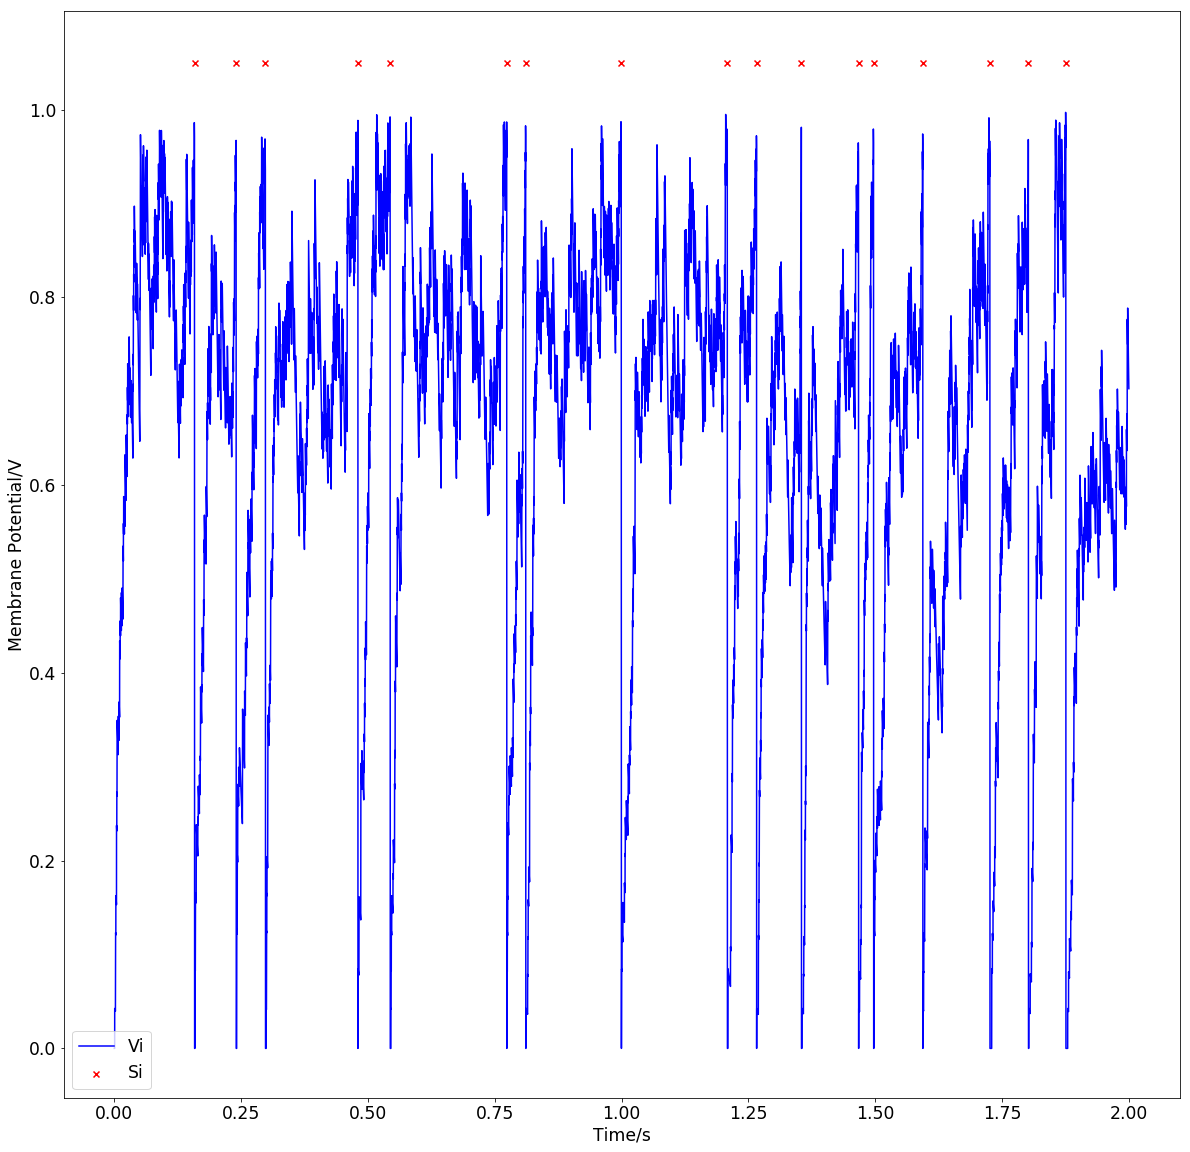

4.26
0.05059162187944666
rate =  10.5
fano factor =  0.4139835685762036


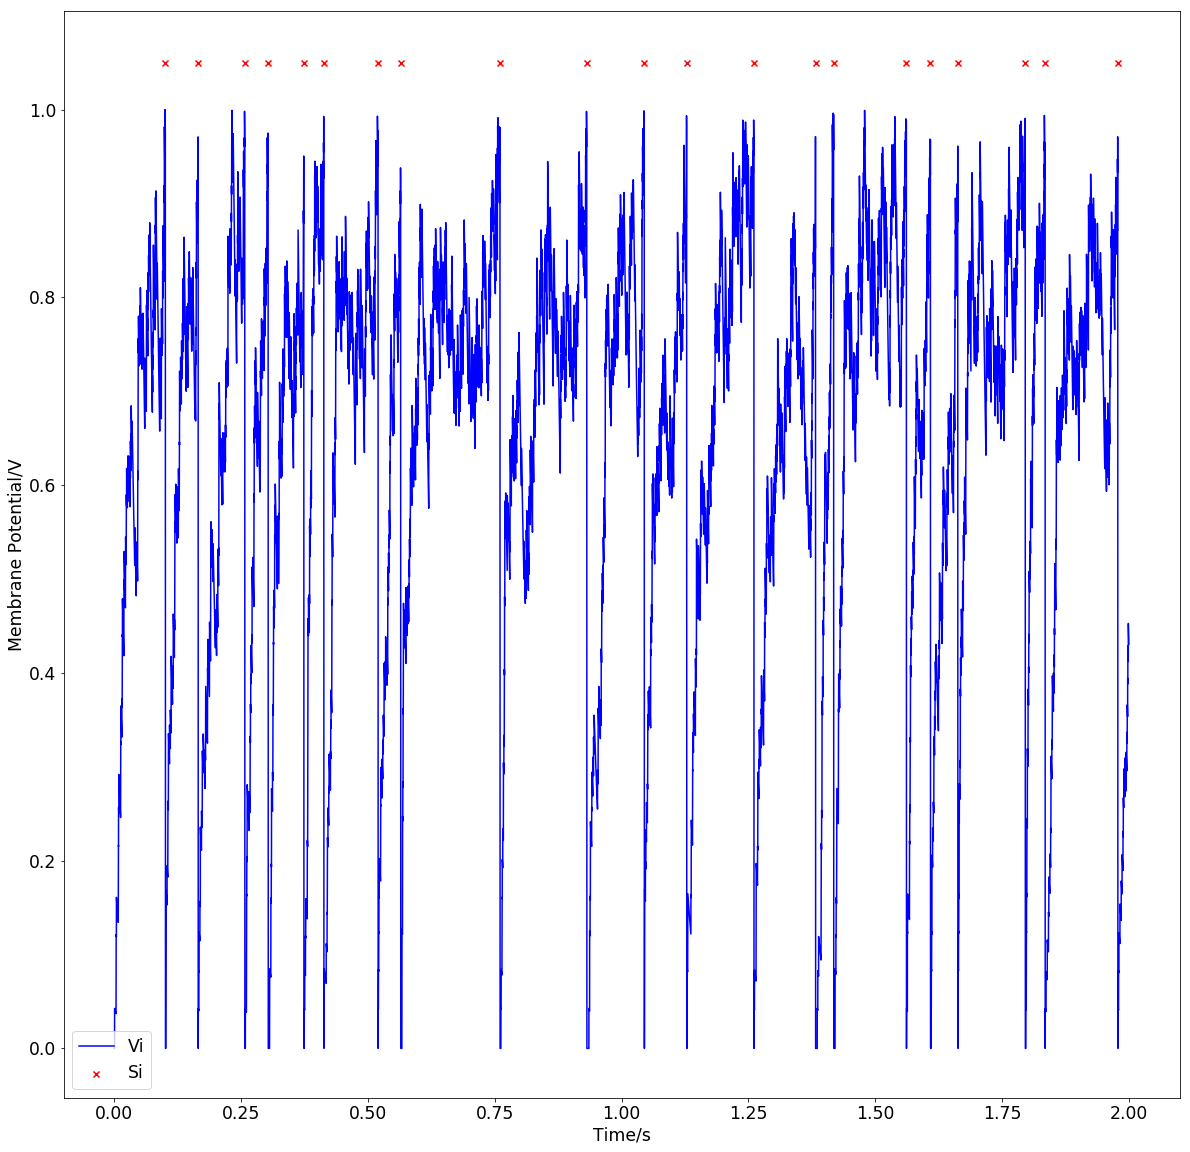

4.2700000000000005
0.0585597184959159
rate =  11.0
fano factor =  0.4055134529596511


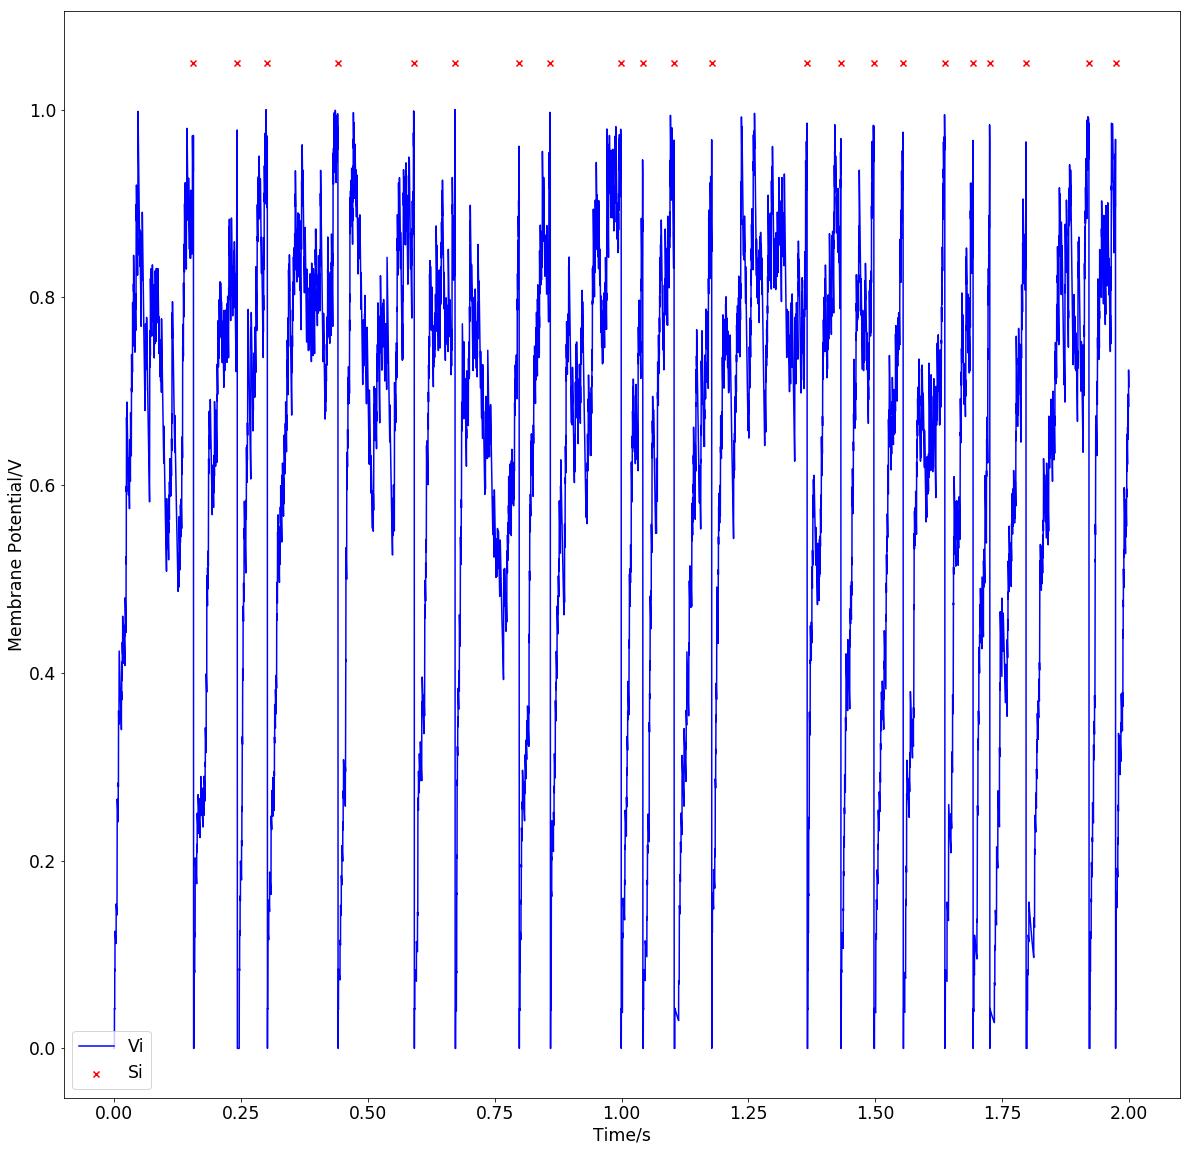

4.28
0.04239120679263206
rate =  8.5
fano factor =  0.5449417577230262


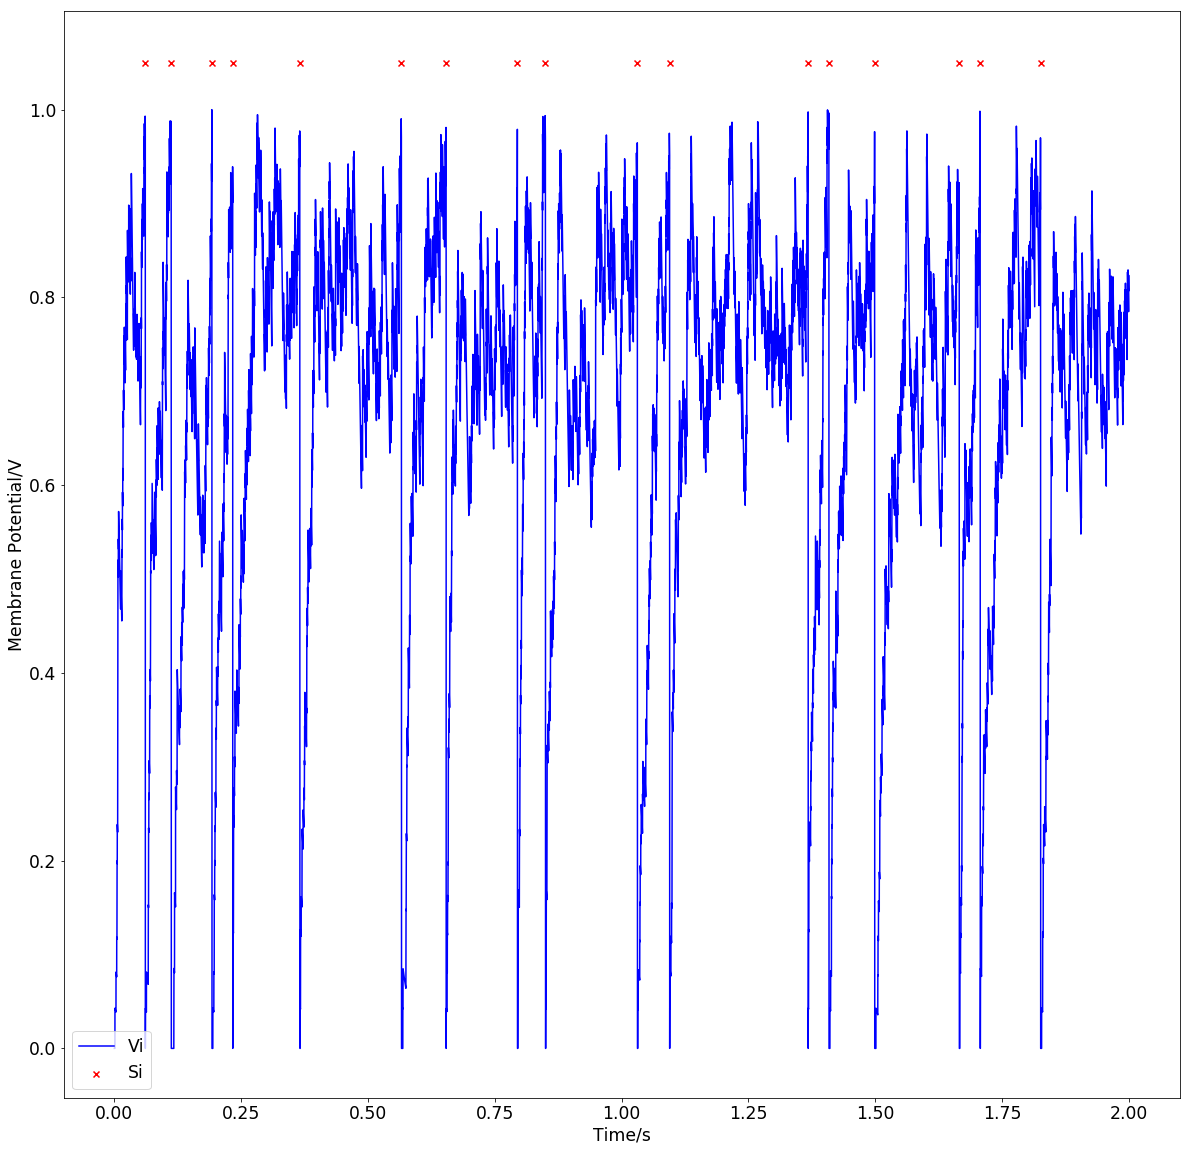

4.29
0.05475914382218275
rate =  10.5
fano factor =  0.4722677751113265


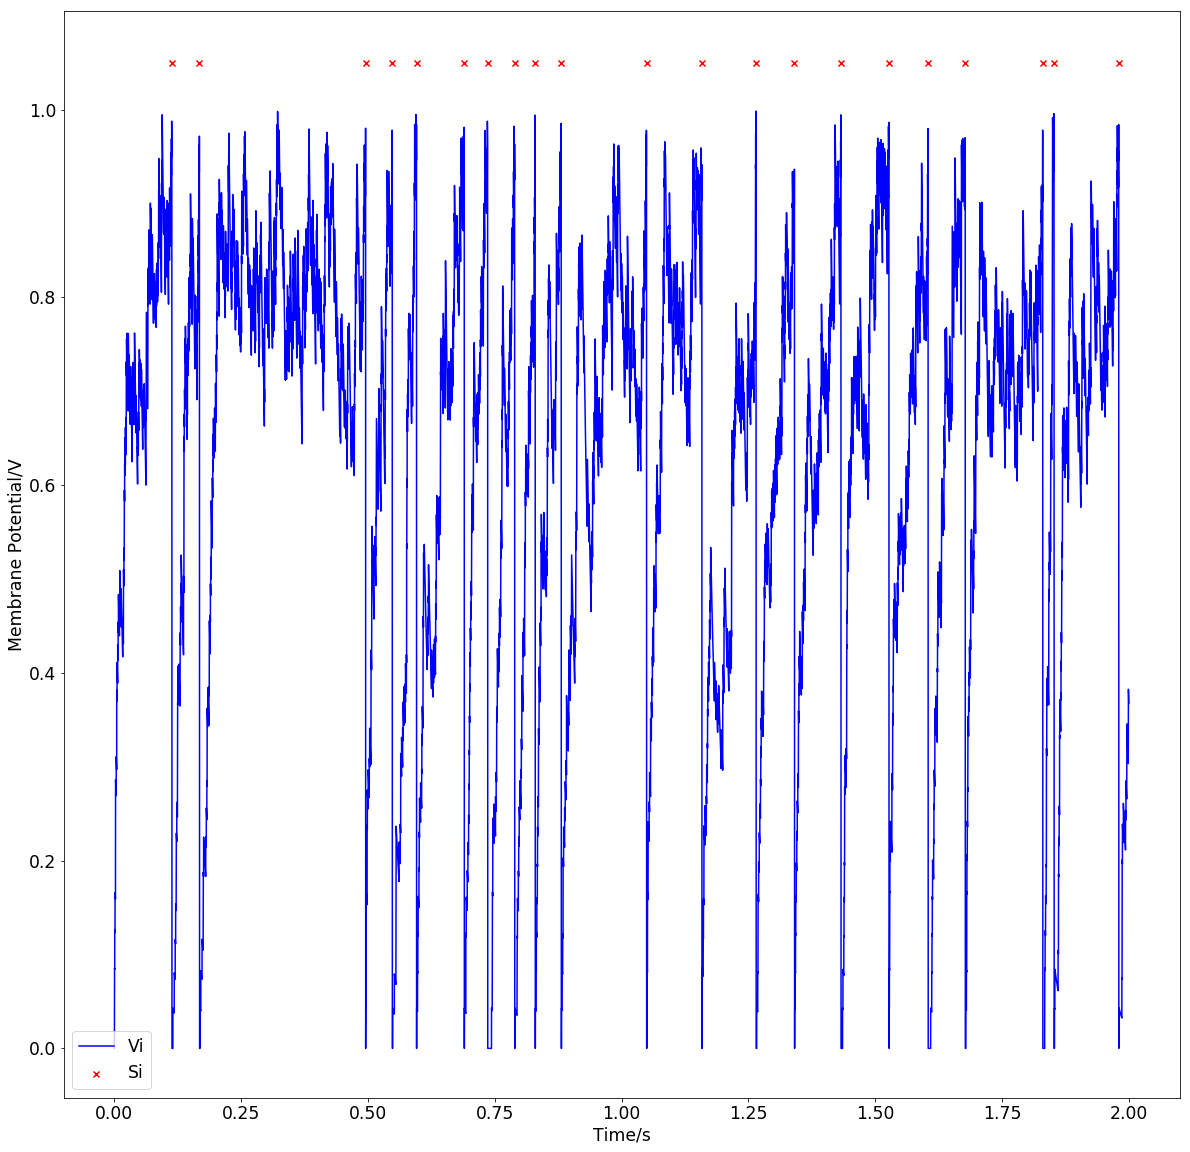

In [178]:
for i in range(20):
    w= (i-10) /100 +4.2
    print(w)
    Sj = gen_spike_train(2,K,dt,rx)
    single_LIF_neuron_multi_input(t,w,Sj,dt,V_t,True,False,True)
    

In [189]:
print(K, t, dt, rx, N)

100 0.02 0.0001 10 1000


In [17]:
# E and I populations are leaky integrate and fire neurons
def single_LIF_neuron_EI_input(tau,w,SjE,SjI,dt,V_t,reset = True,inputs=True,outputs=True):
    samples = SjE.shape[0]
    K = SjE.shape[1]
    V = np.zeros(samples)
    Si = np.zeros(samples)
    
    input_sum_E = np.sum(SjE,1)
    input_sum_I = np.sum(SjI,1)
    
    input_sum = input_sum_E - input_sum_I
    for i in range(samples-1): #calculate discrete time membrane potential
        #k = i+1
        #print(V[i])
        V[i+1]=V[i]+dt*(-V[i]/tau + w*input_sum[i]/np.sqrt(K))
        #print(V[i+1])
        if V[i+1]>V_t:
            if reset ==True:
                V[i+1]=0
            Si[i+1] = 1/dt
    #print(V)
    #plt.plot(Sj)
    #plt.plot(Si)
    #plt.plot(V)
    #plt.plot(input_sum)
    #plt.show()        
            
    plt.figure(figsize=(20, 20))
    plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
    plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
    plt.rc('xtick', labelsize='xx-large')  # fontsize of the tick labels
    plt.rc('ytick', labelsize='xx-large')  # fontsize of the tick labels
    plt.rc('legend', fontsize='xx-large')
    
    if inputs == True:
        times,neurons = np.nonzero(Sj) # gets the indices of the neurons that fir
        times = times*dt
        plt.scatter(times,np.ones(times.shape),marker='x',color='g',label='Sj')
    
    if outputs == True:    
        times = np.nonzero(Si) # gets the indices of the neurons that fired
        times = times[0]*dt
        plt.scatter(times,np.ones(times.shape)*1.05,marker='x',color='r',label='Si')
        rate = times.shape[0]/(samples*dt)
        print('rate = ',rate )
        
        window = int(0.1 /dt)
        counts = np.zeros(samples-window)
        for i in range(samples-window):
            counts[i] = np.sum(Si[i:i+window])*dt
        c_mean = np.average(counts)
        c_var = np.std(counts)**2
        
        fano_factor = c_var/c_mean
        print('fano factor = ',fano_factor )
        
        
    times= np.arange(0,samples*dt,dt)
    plt.plot(times,V,color='b',label='Vi')
    
    plt.ylabel('Membrane Potential/V')
    plt.xlabel('Time/s')
    plt.legend(loc = 'lower left')
    plt.show()

In [192]:
print(K,t,N,dt,rx)

NameError: name 'V_th' is not defined

1.4
rate =  5.5
fano factor =  1.229517837069448


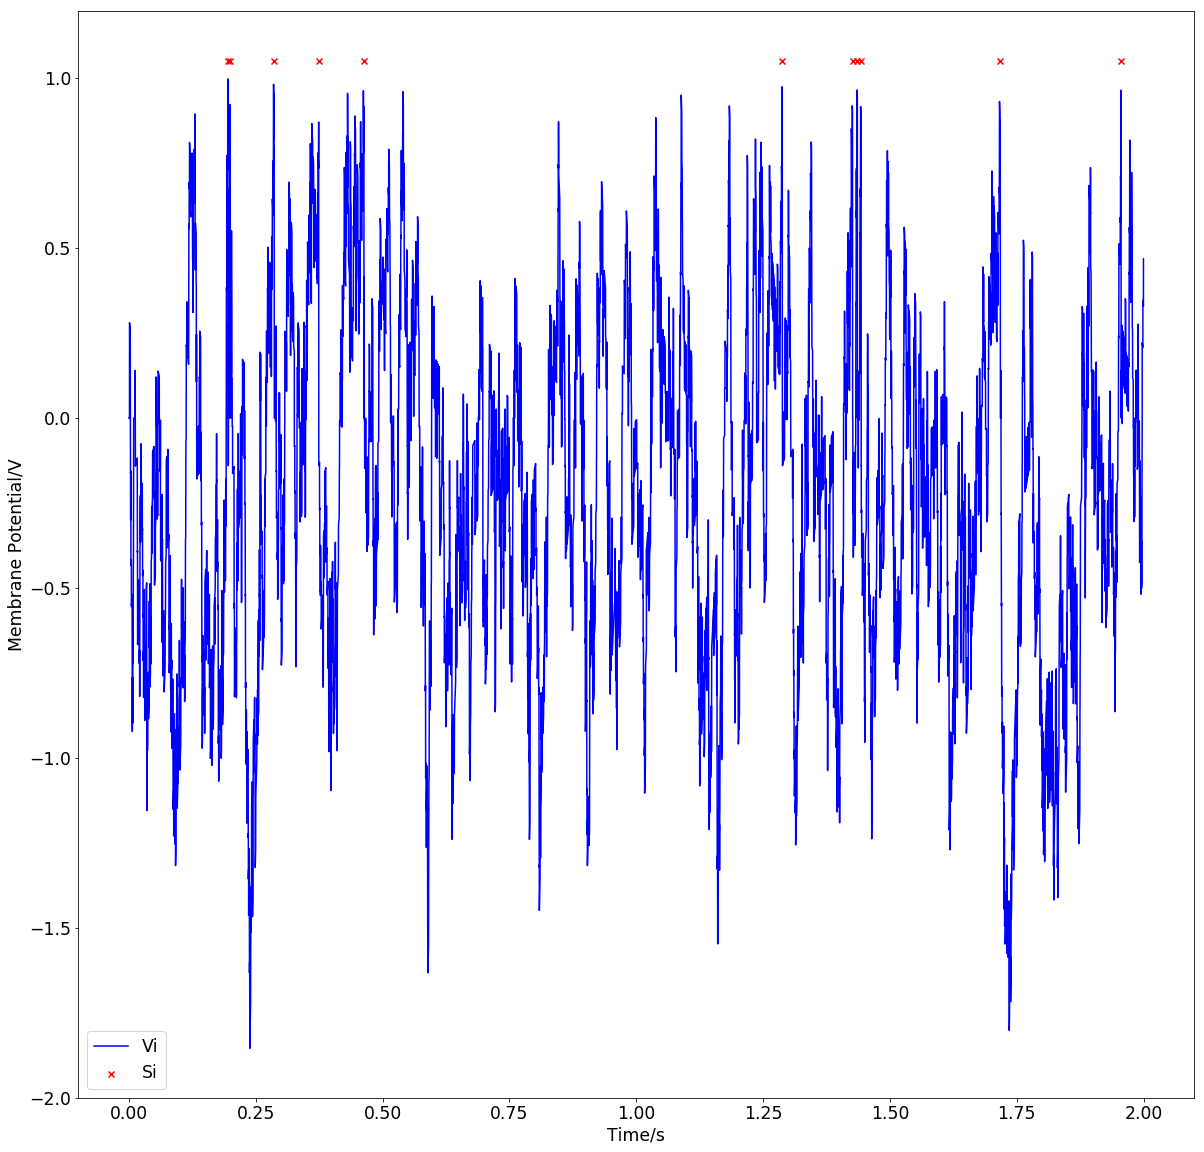

1.41
rate =  7.5
fano factor =  1.2380609418282549


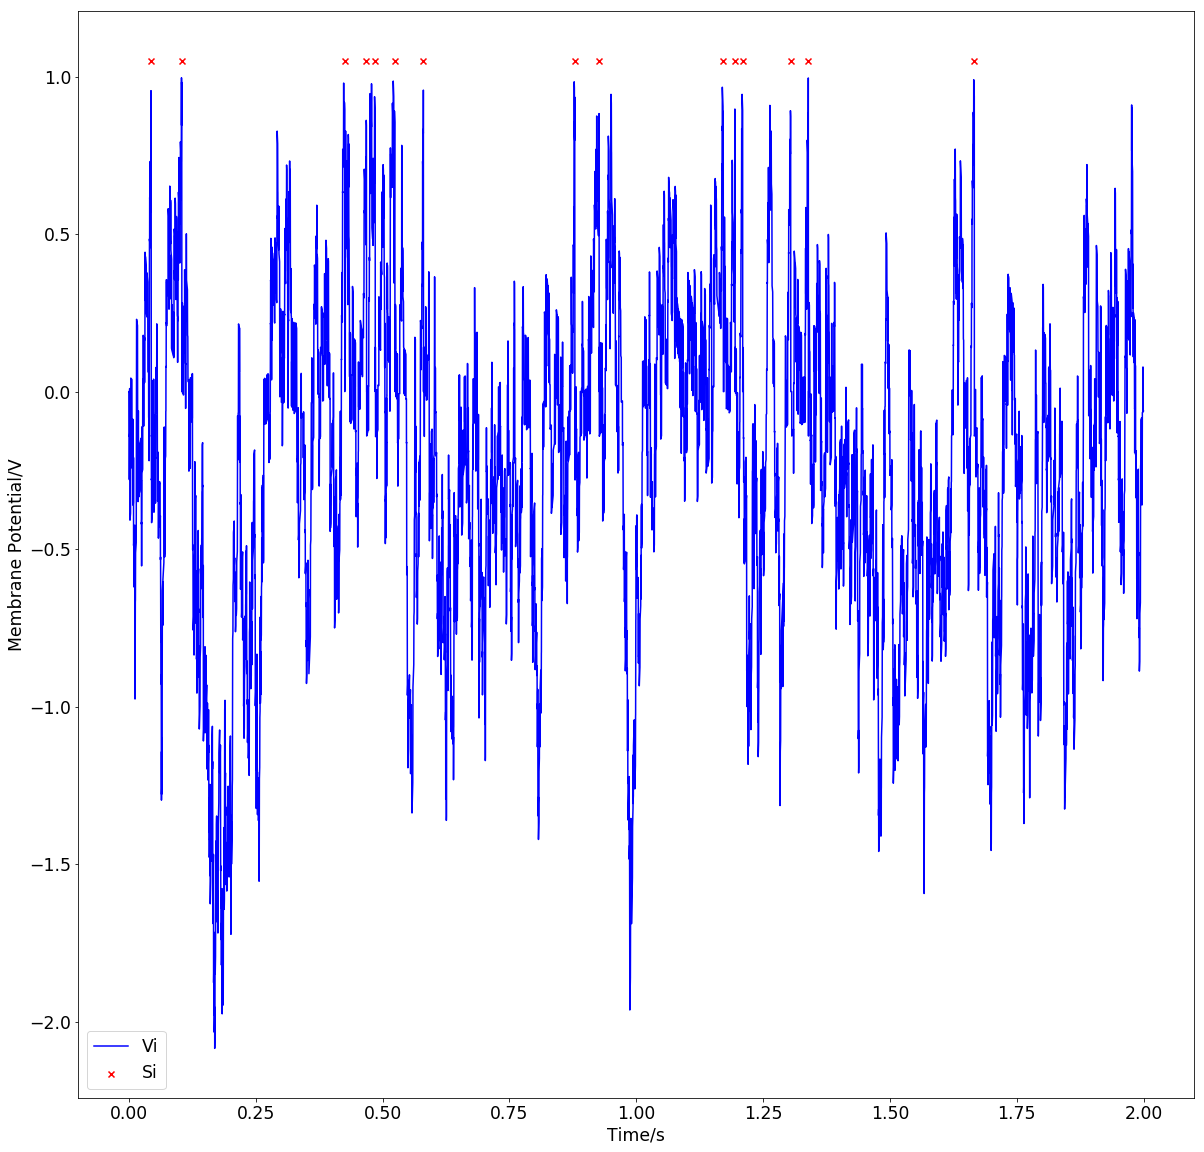

1.42
rate =  14.0
fano factor =  0.995477137954254


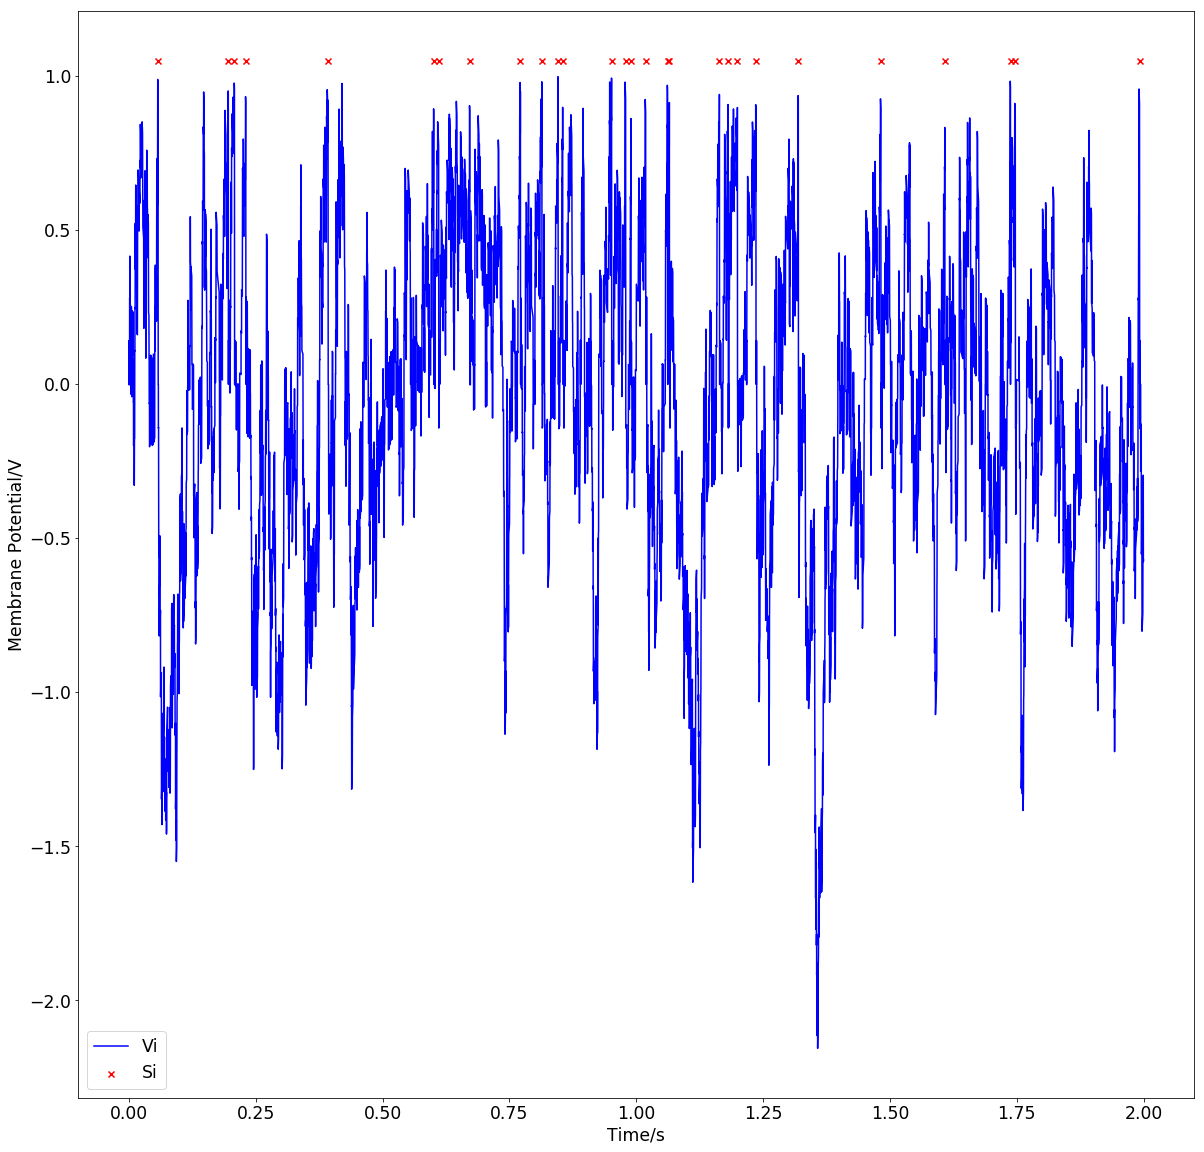

1.43
rate =  9.0
fano factor =  0.6667676852935923


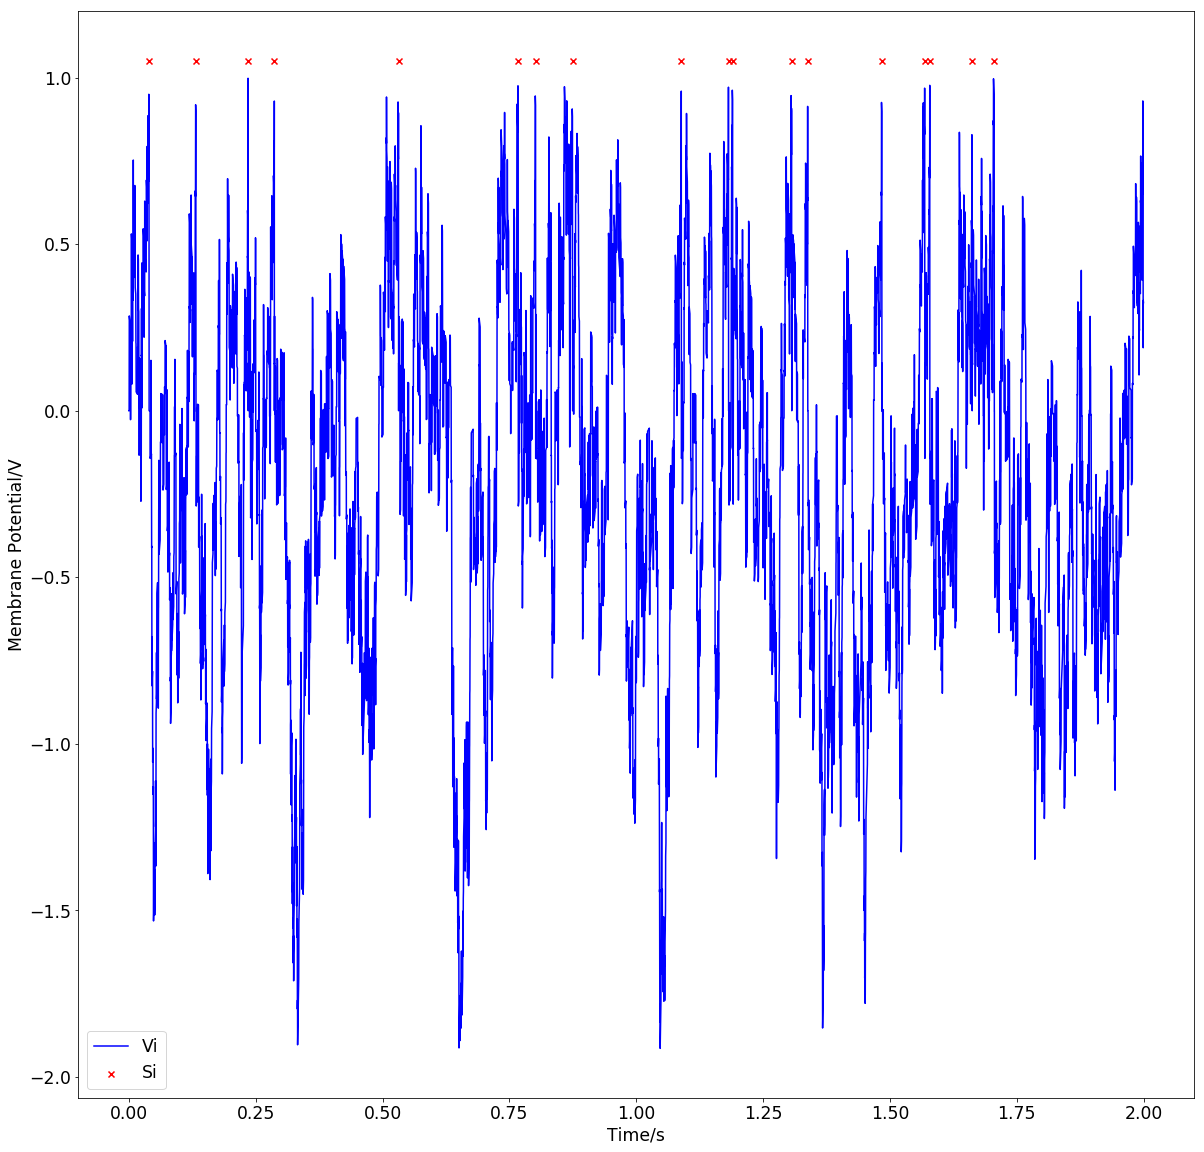

1.44
rate =  8.0
fano factor =  0.7860900875049064


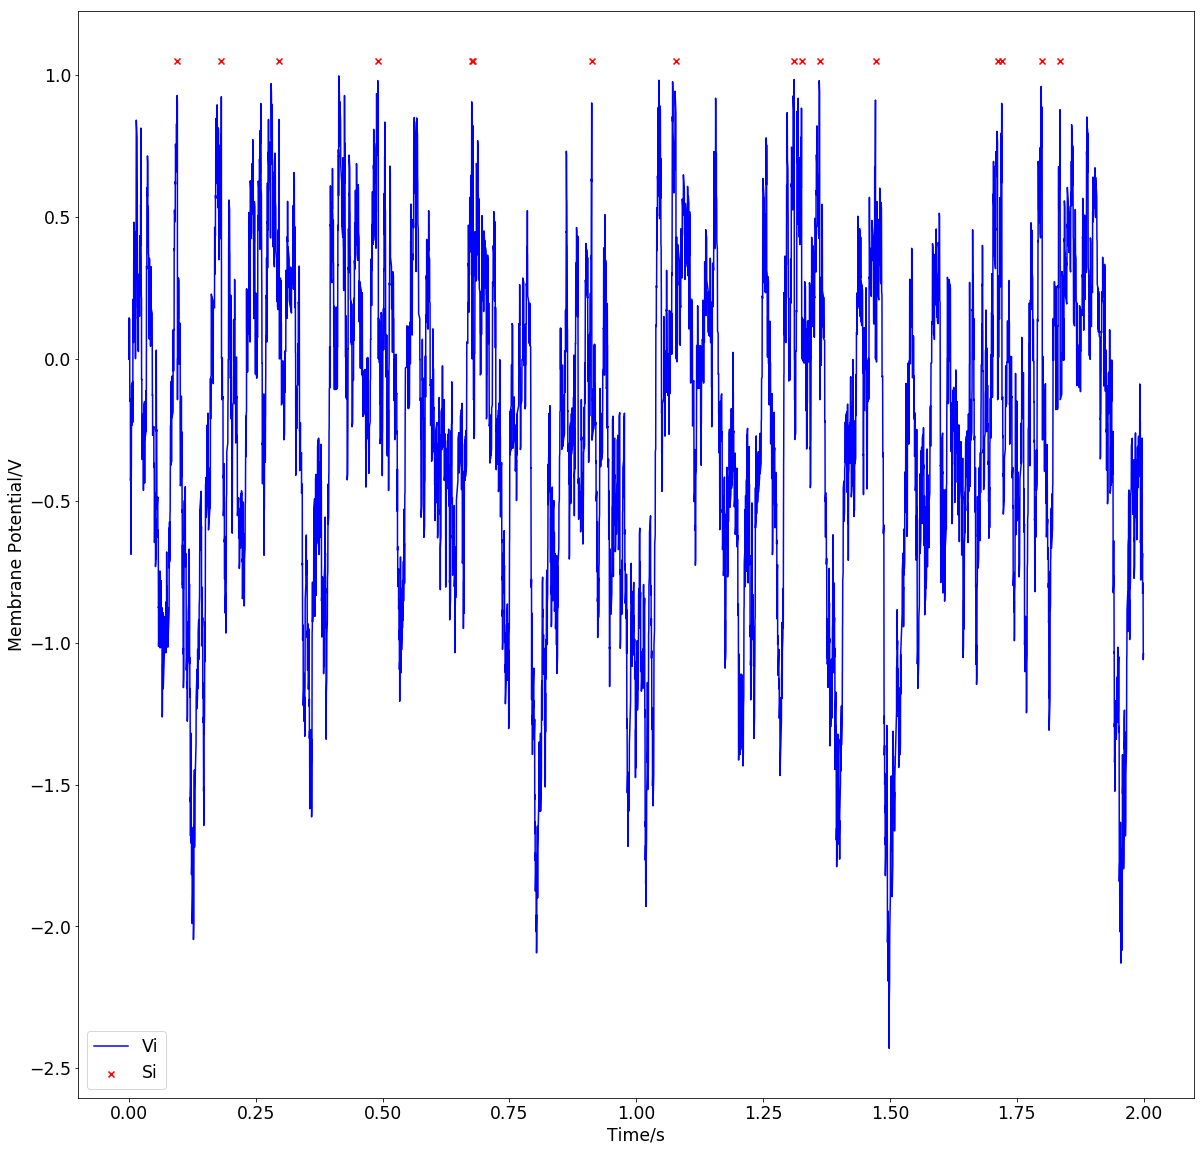

1.45
rate =  9.0
fano factor =  0.8762982456140349


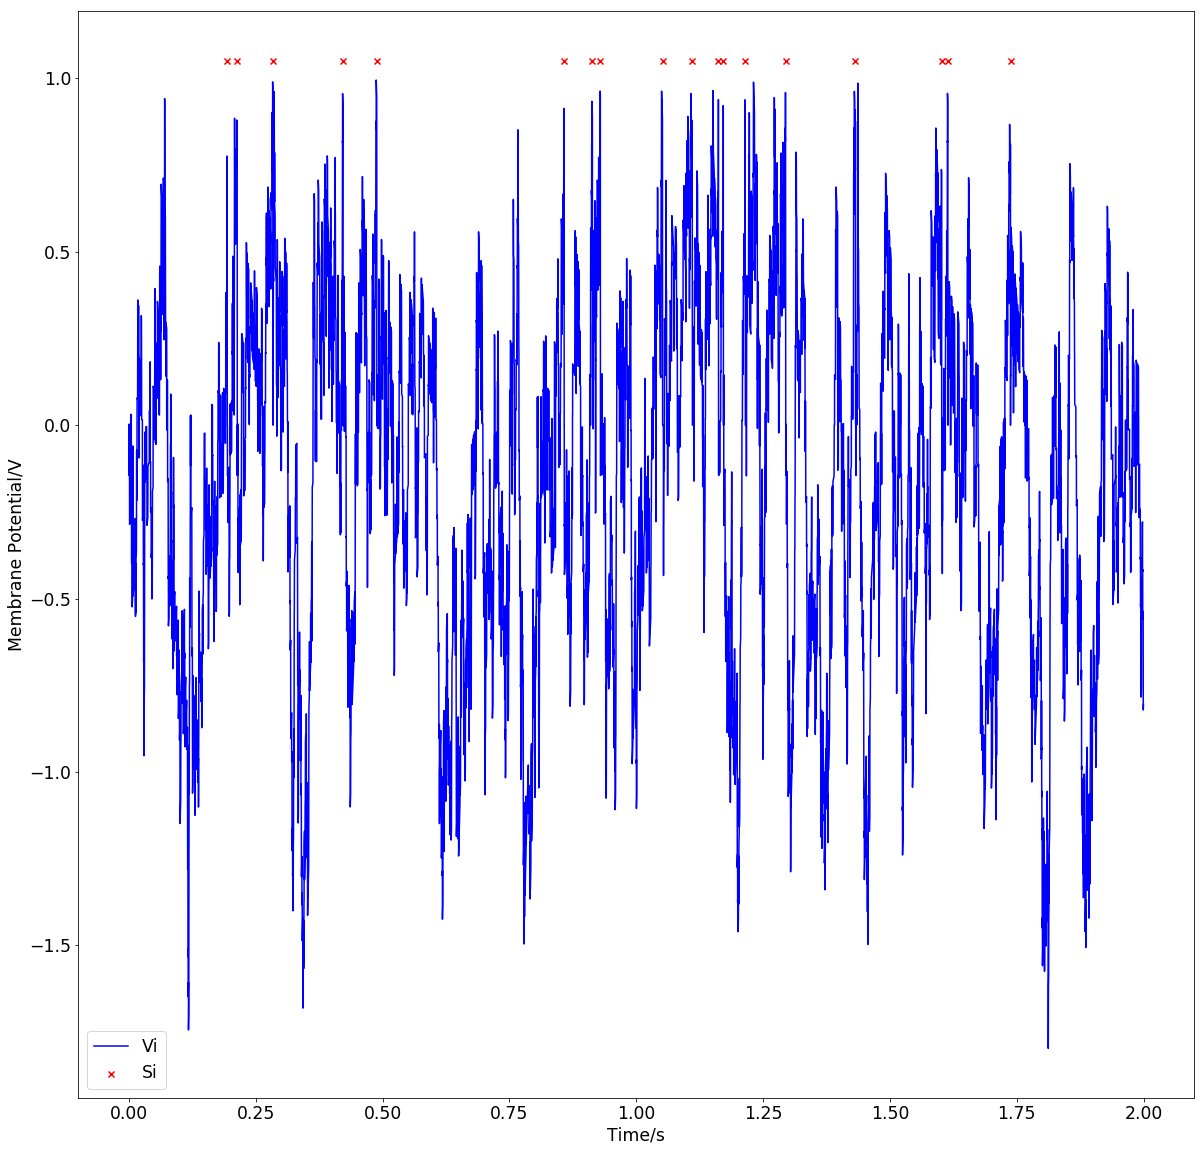

1.46
rate =  10.5
fano factor =  1.341050378779513


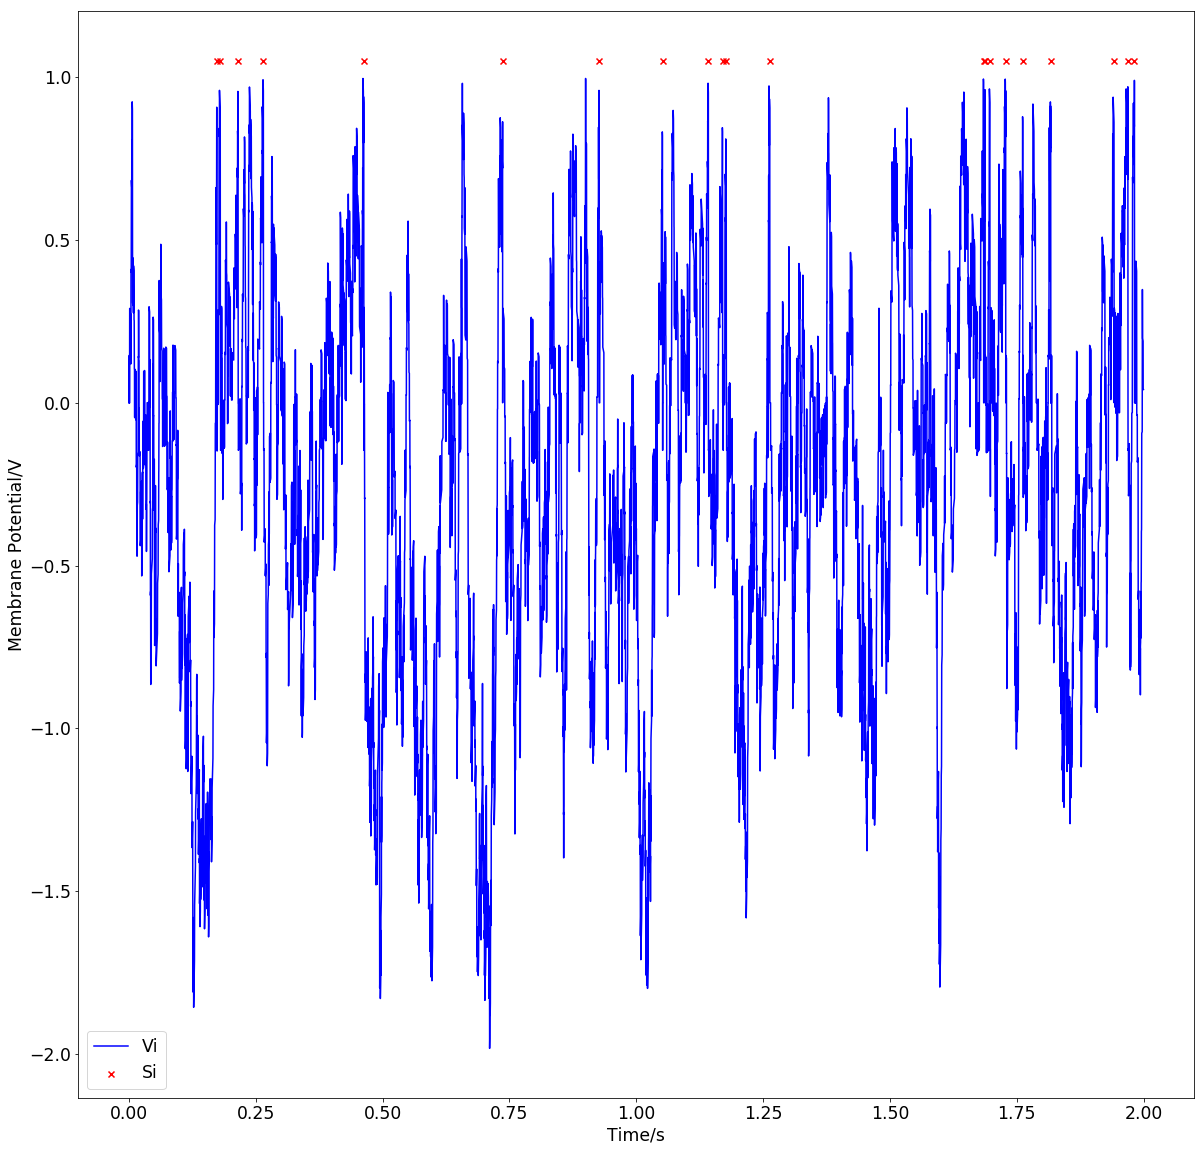

1.47
rate =  7.0
fano factor =  0.4546395701295122


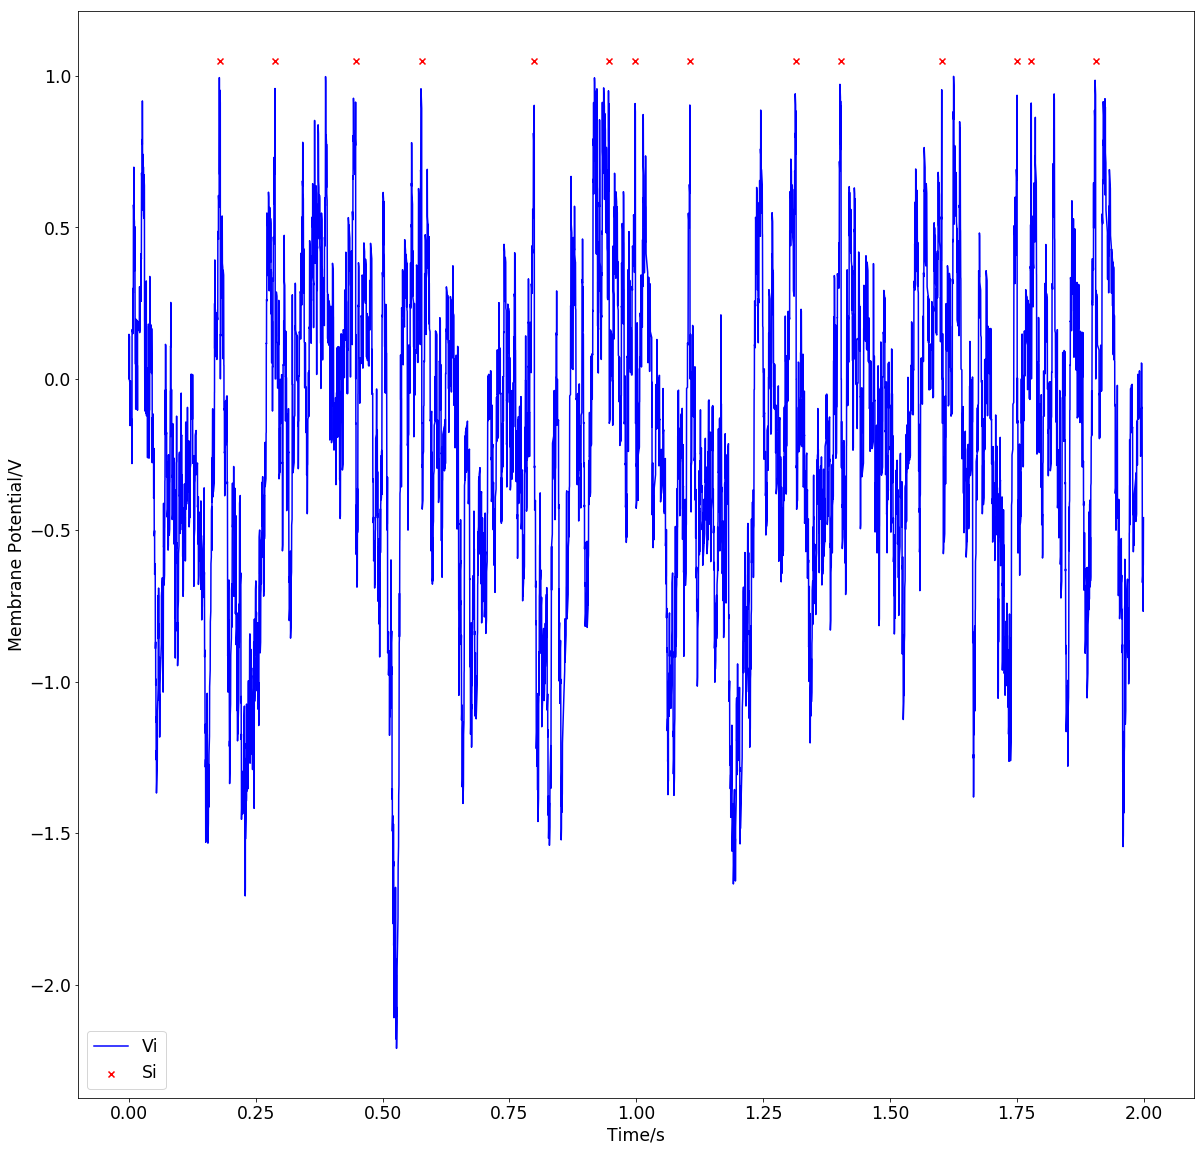

1.48
rate =  9.0
fano factor =  0.5716754202506563


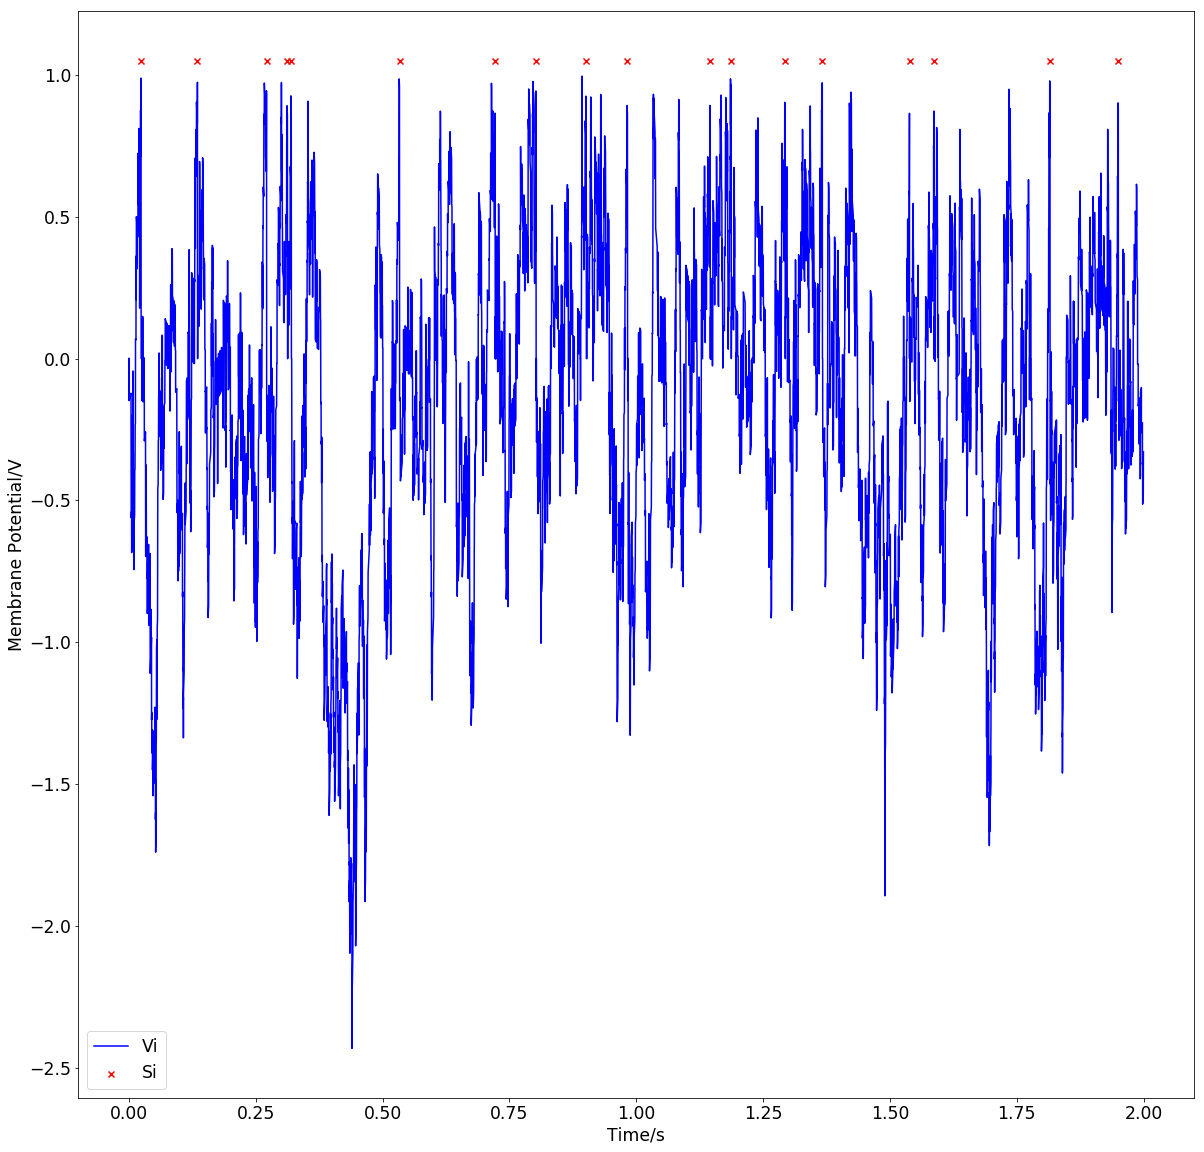

1.49
rate =  10.5
fano factor =  0.5610671161181122


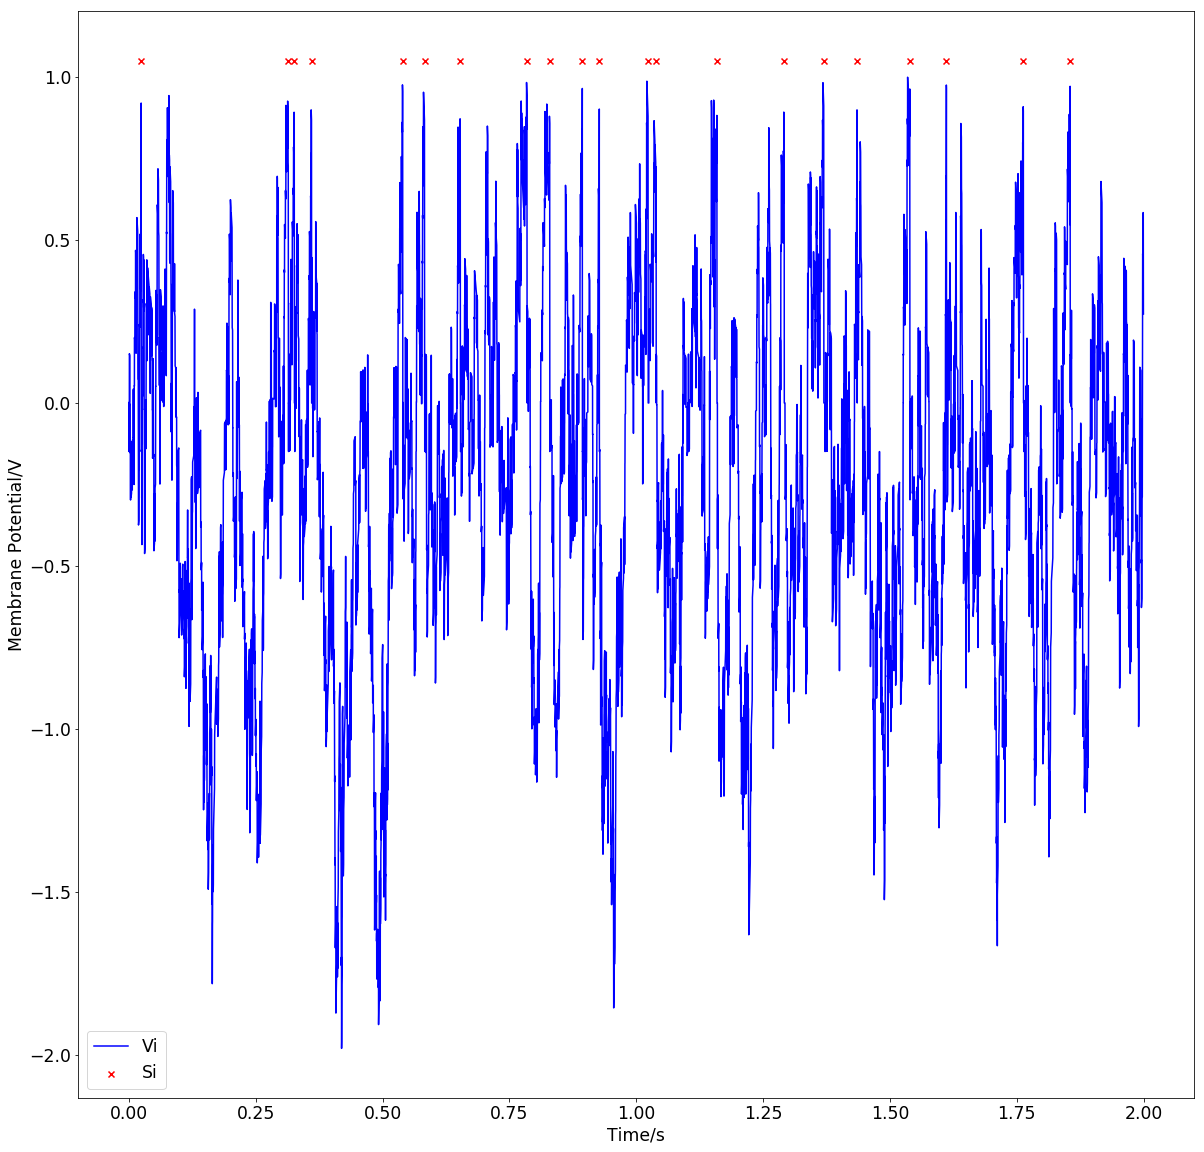

1.5
rate =  9.0
fano factor =  1.1469252181189469


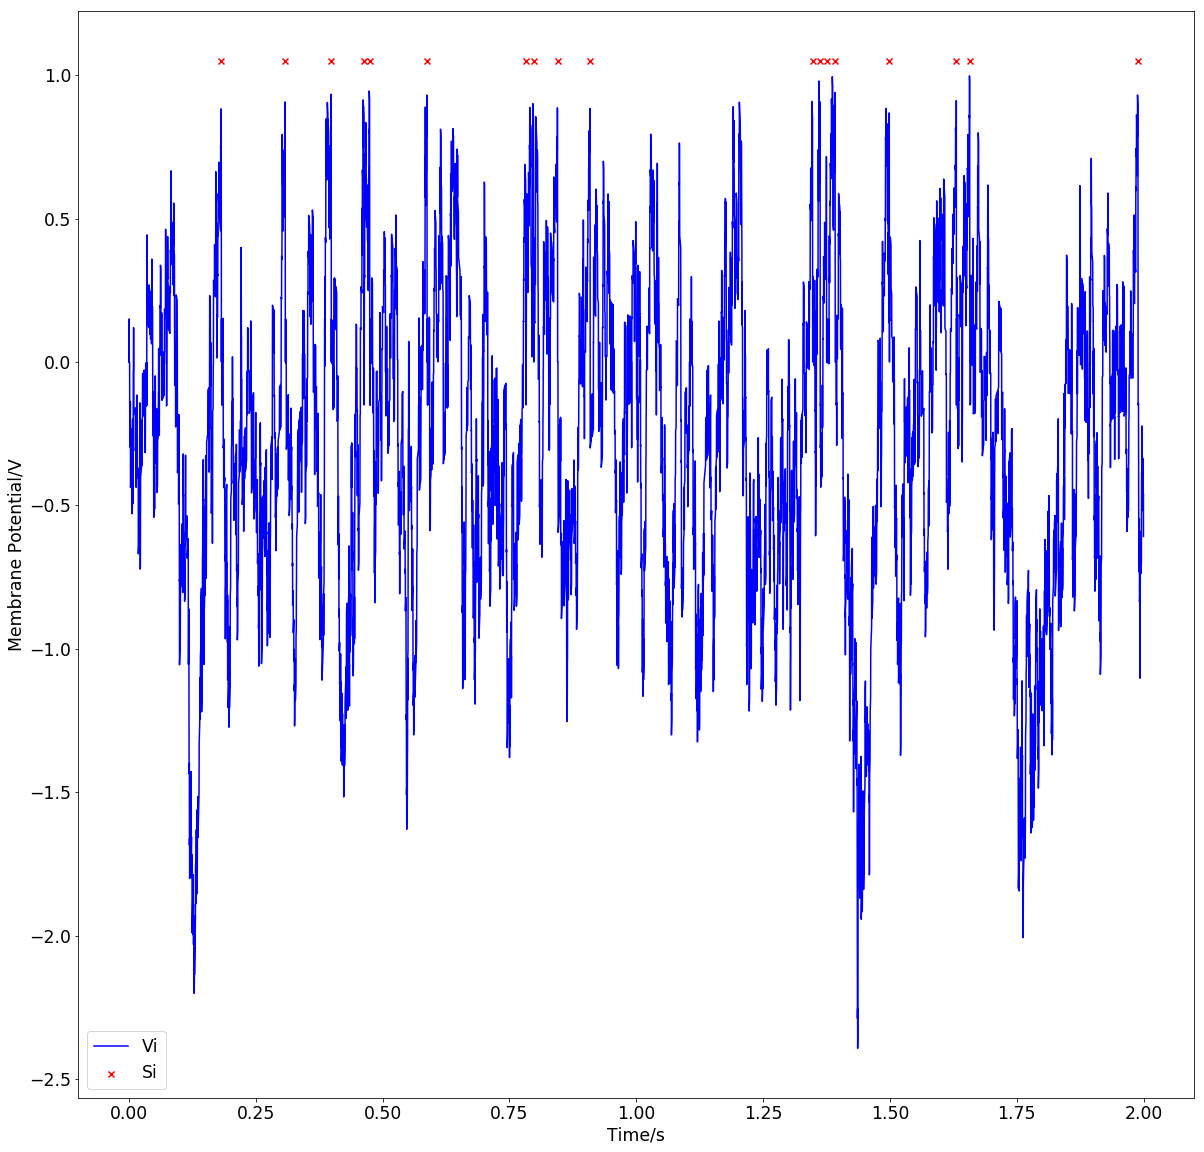

1.51
rate =  13.0
fano factor =  1.0402544491460304


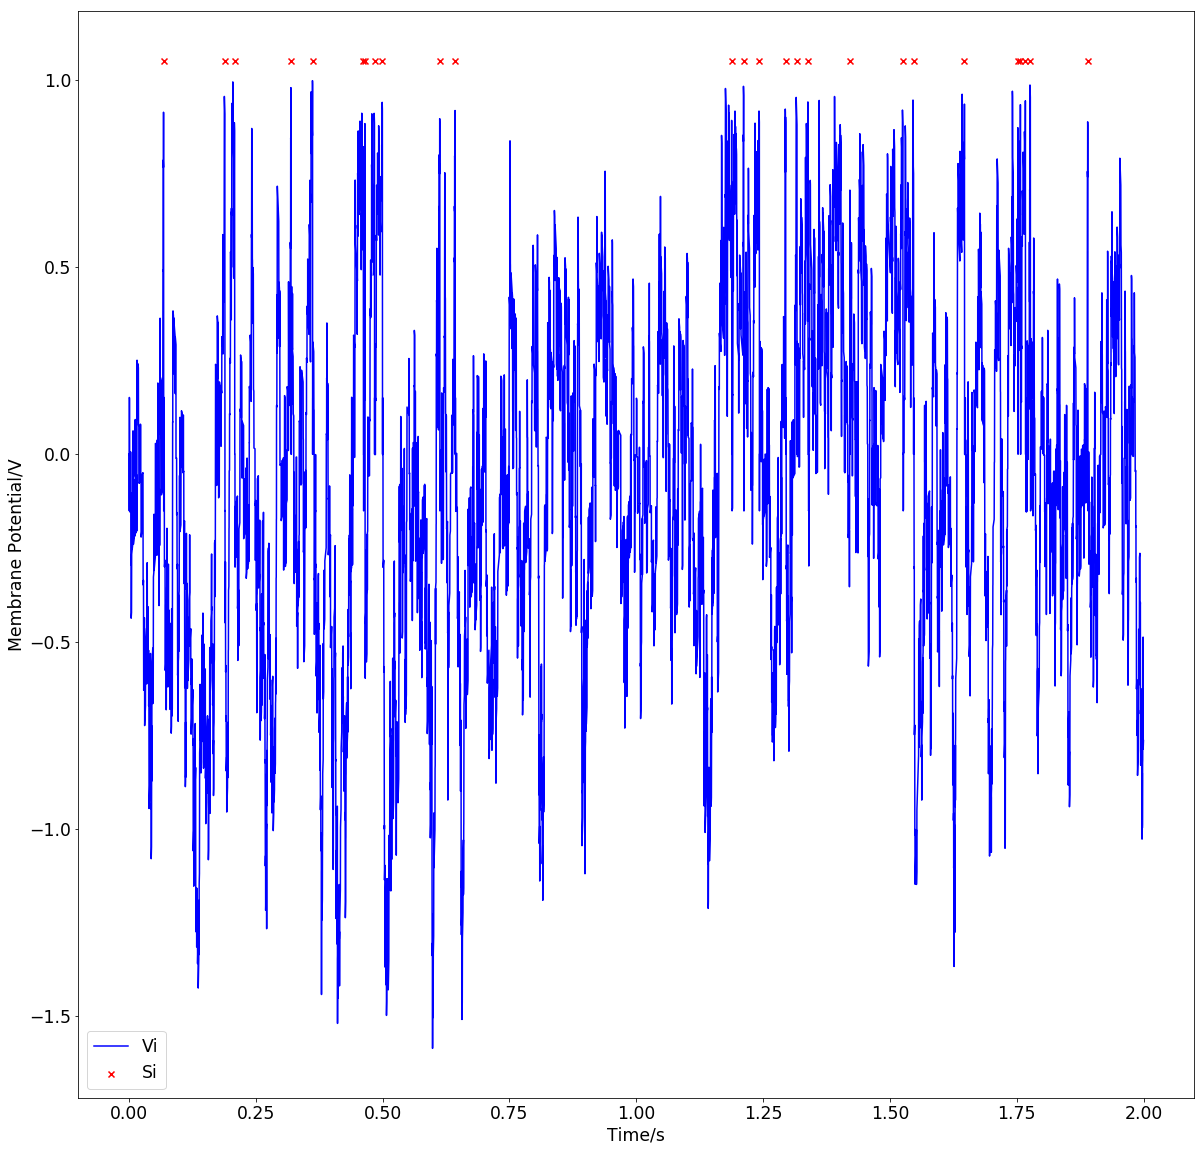

1.52
rate =  7.5
fano factor =  1.0581995638374513


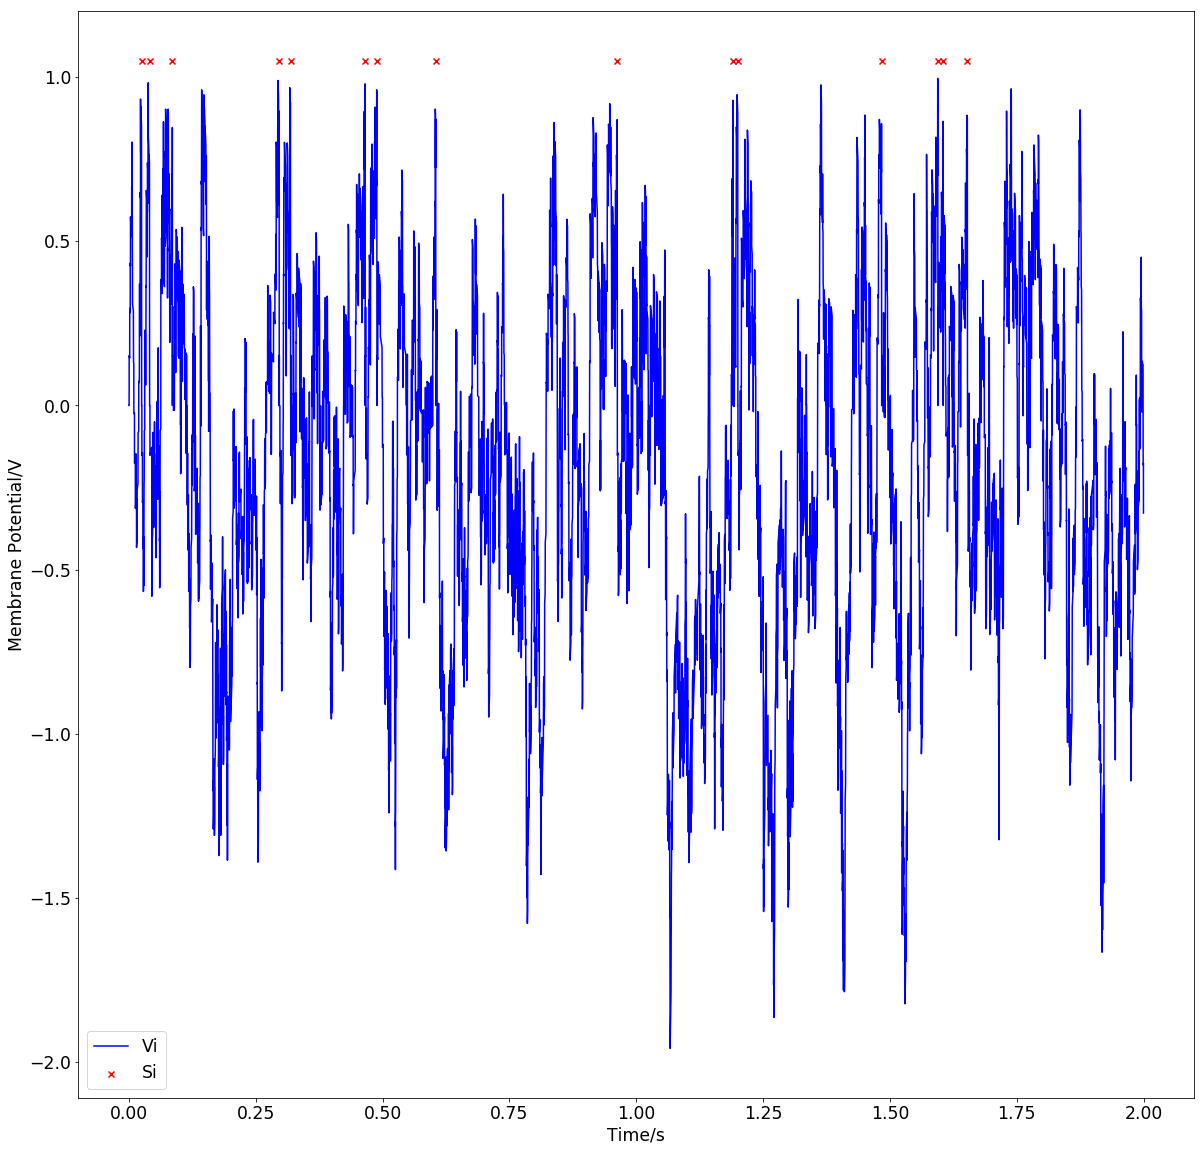

1.53
rate =  8.5
fano factor =  1.2163631338311005


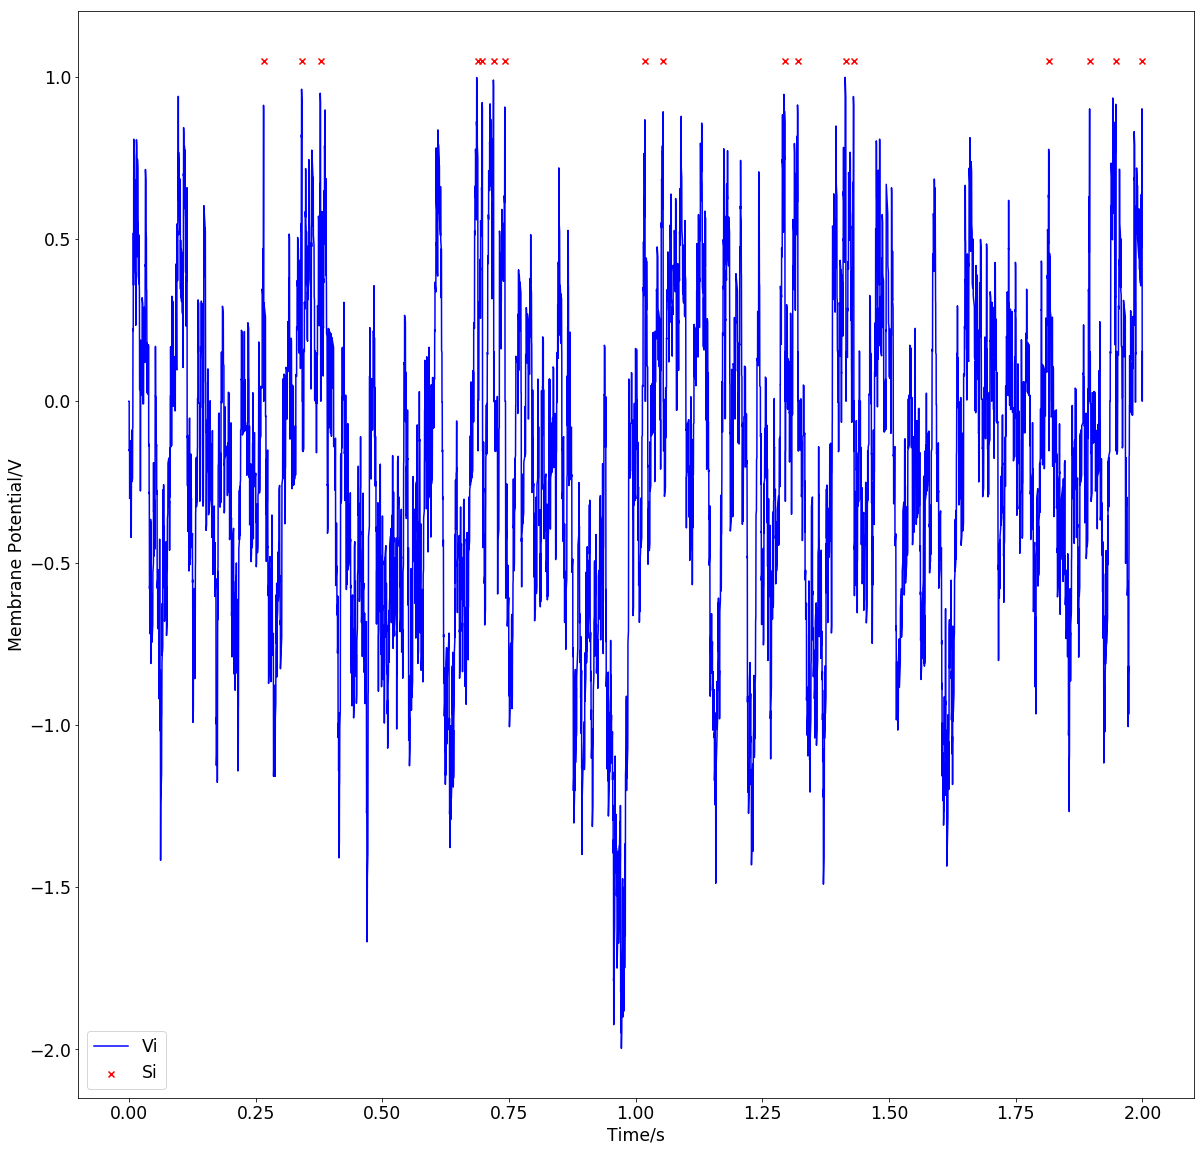

1.54
rate =  11.0
fano factor =  0.8069329163291473


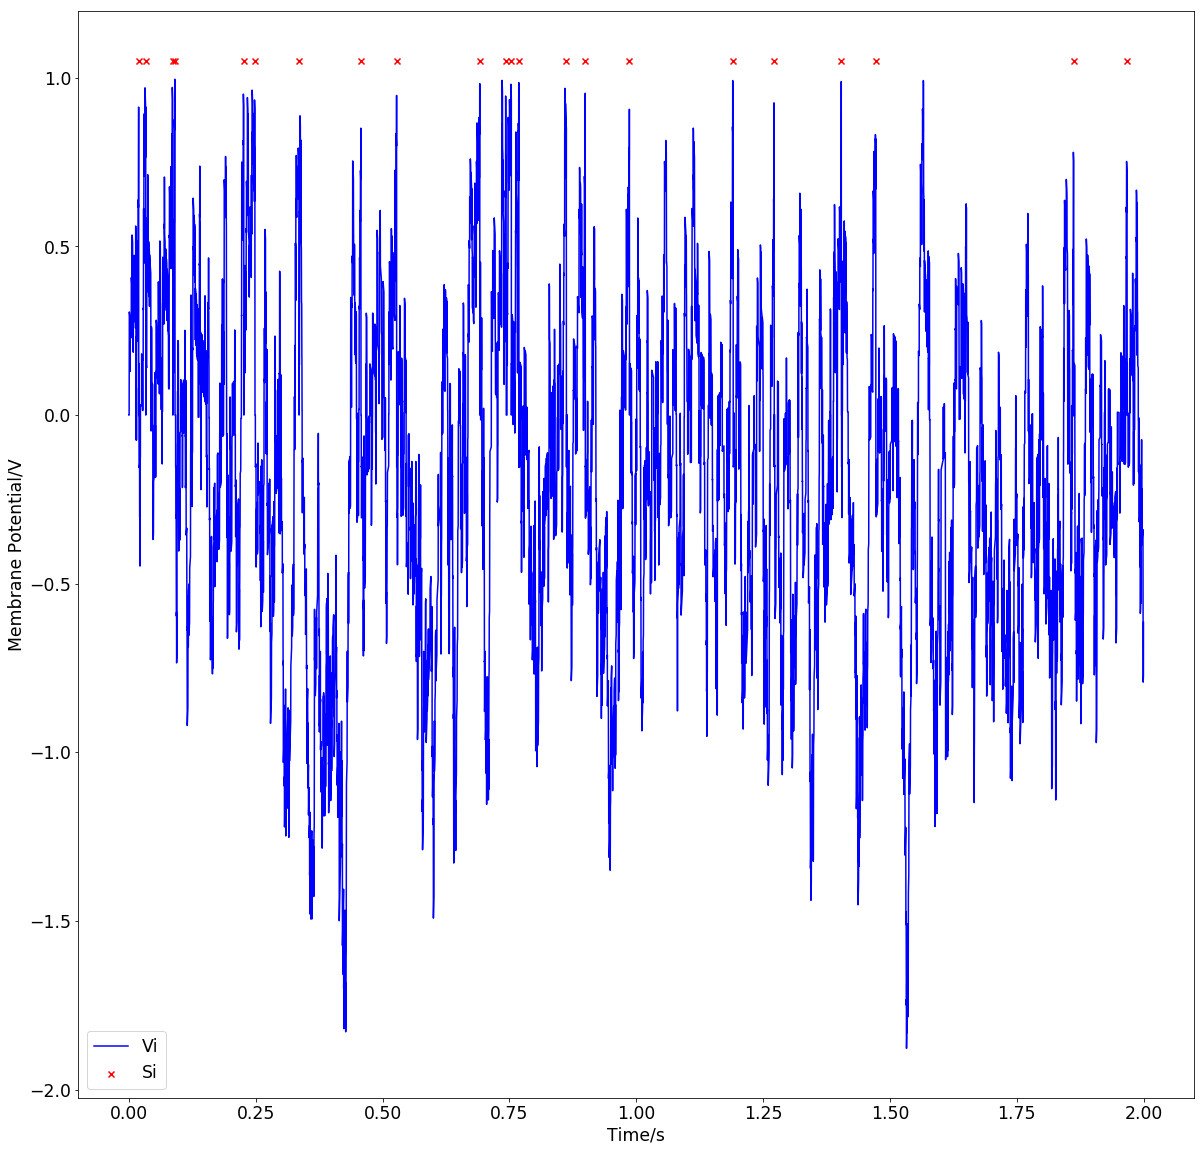

1.55
rate =  9.0
fano factor =  1.5660356897405985


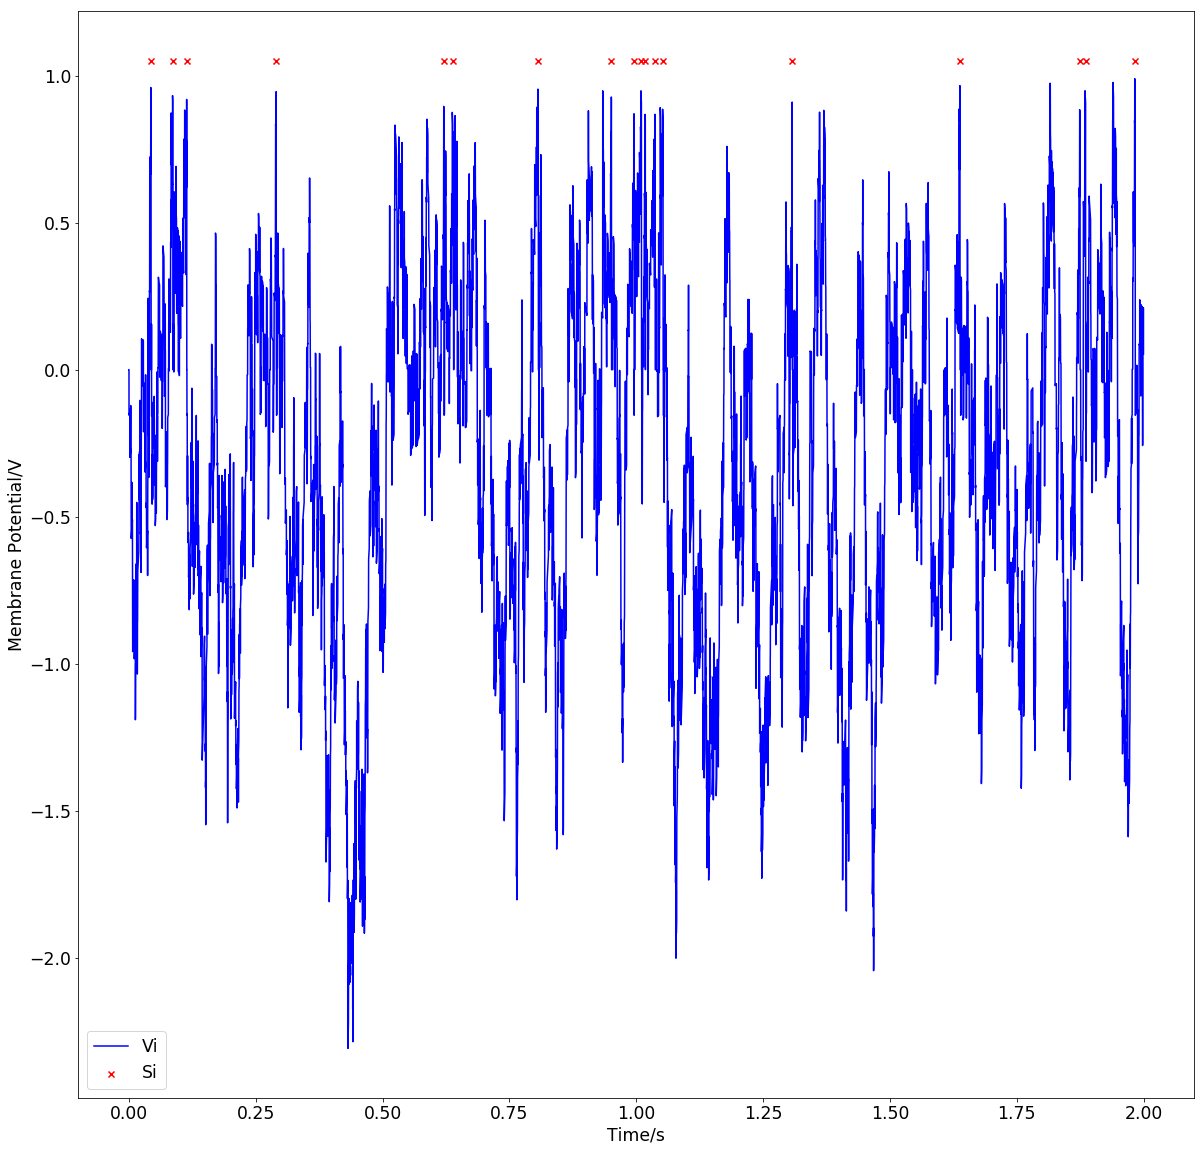

1.56
rate =  7.5
fano factor =  0.807282054572579


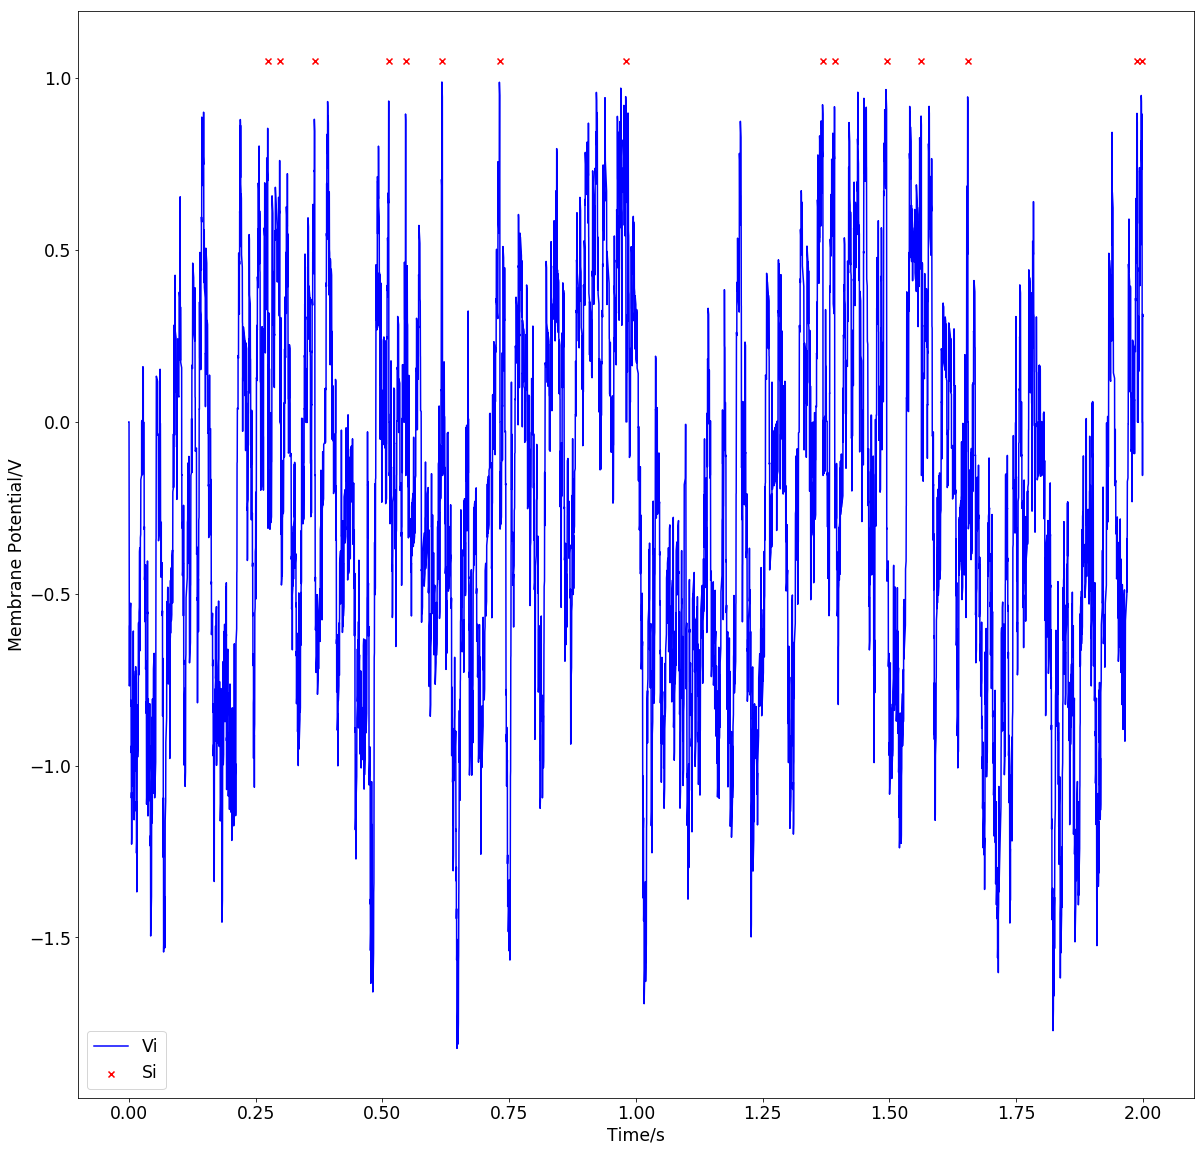

1.57
rate =  10.5
fano factor =  1.0543026084427347


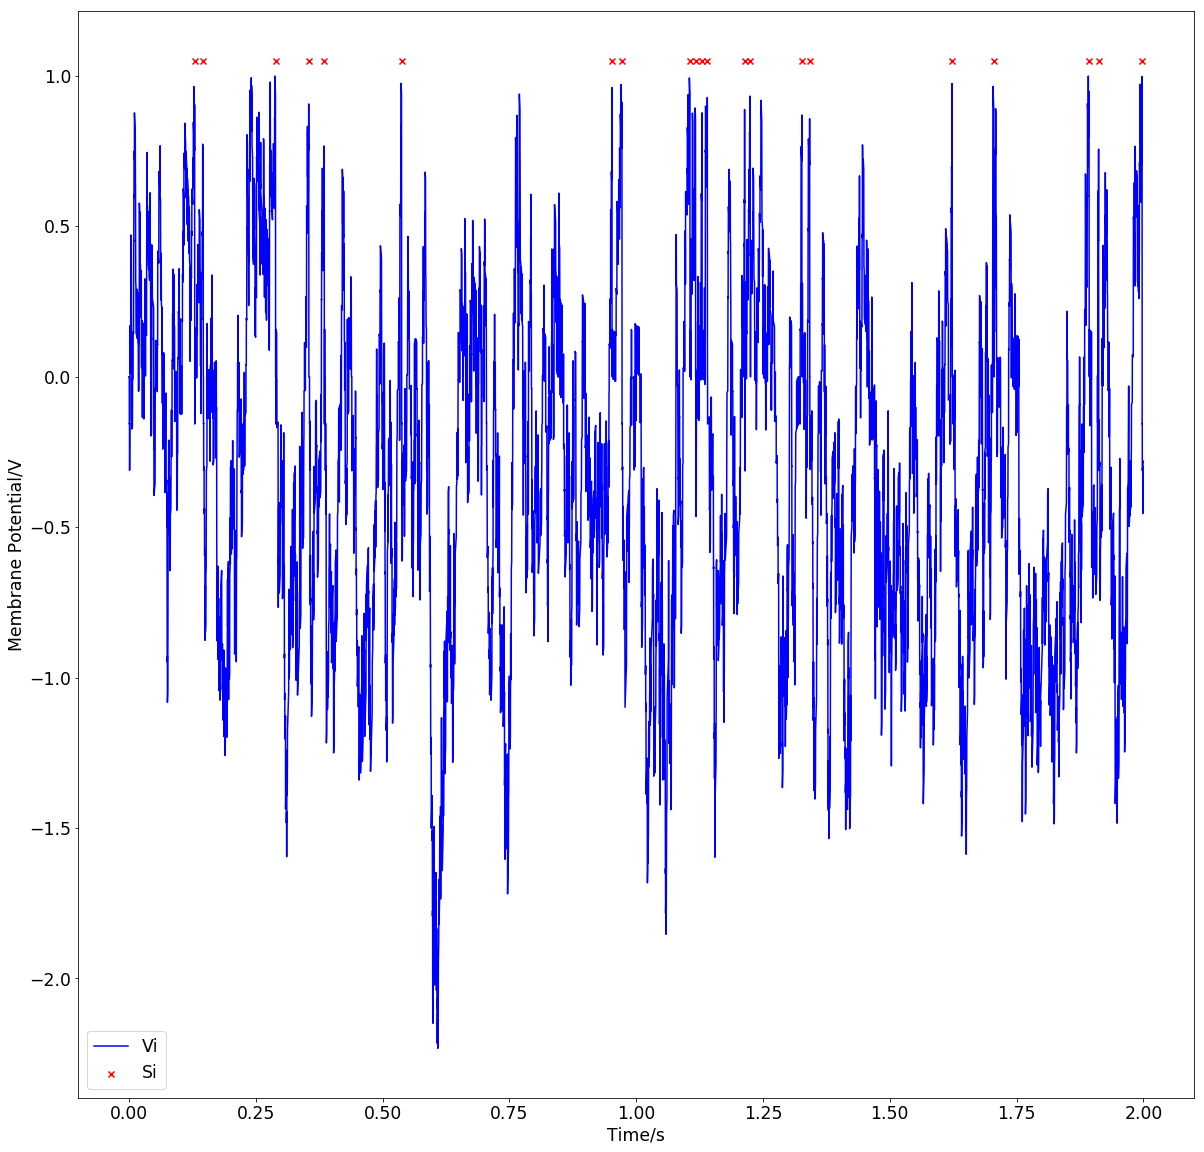

1.58
rate =  11.5
fano factor =  0.9738637574166058


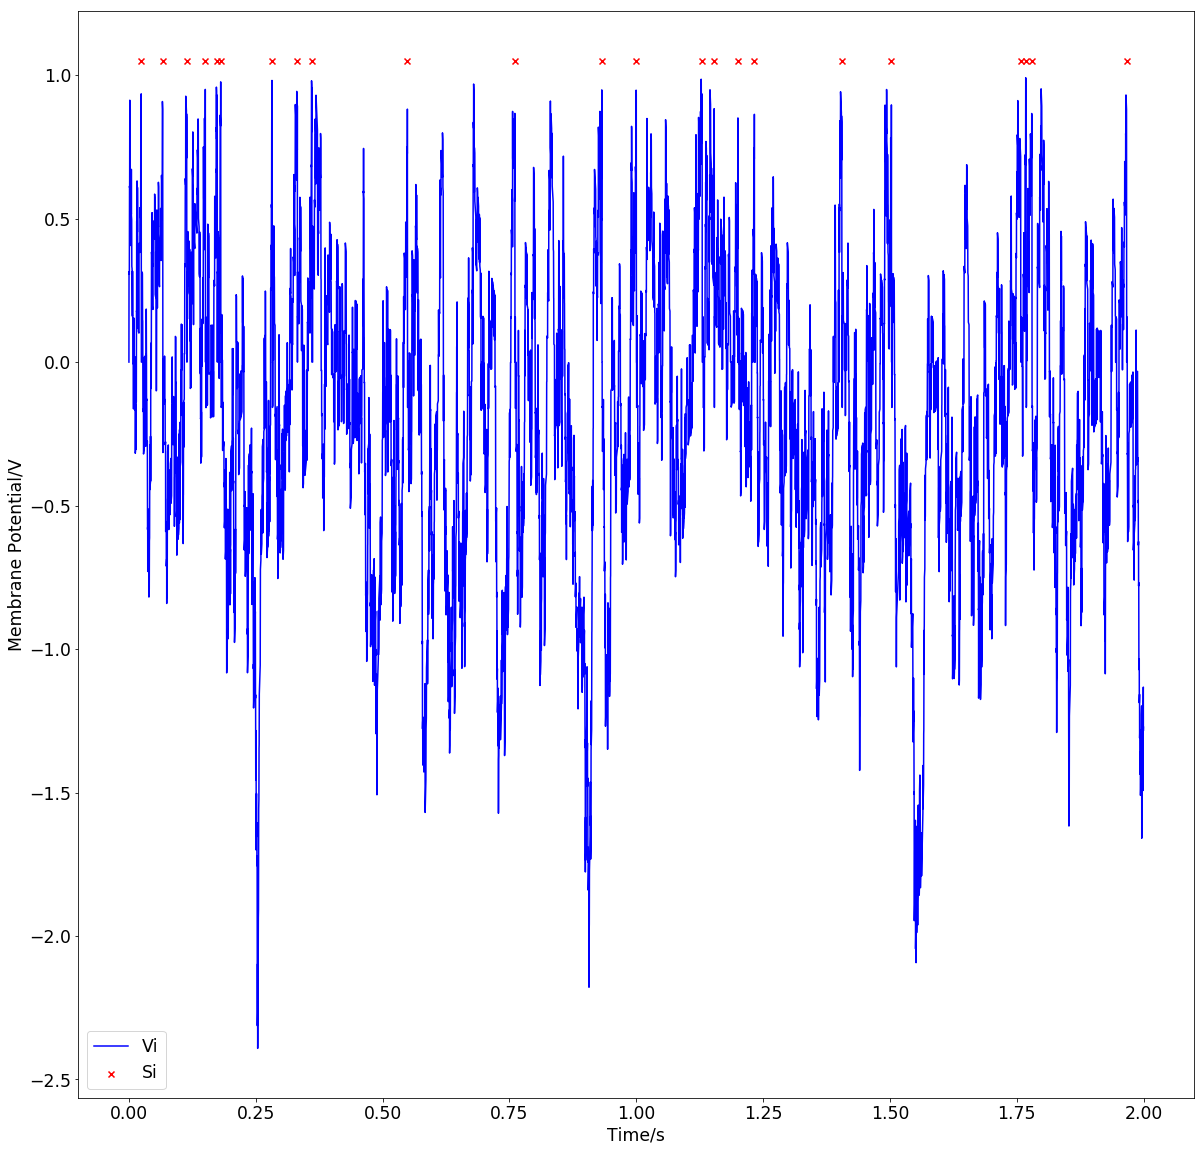

1.59
rate =  11.0
fano factor =  1.0327778252844315


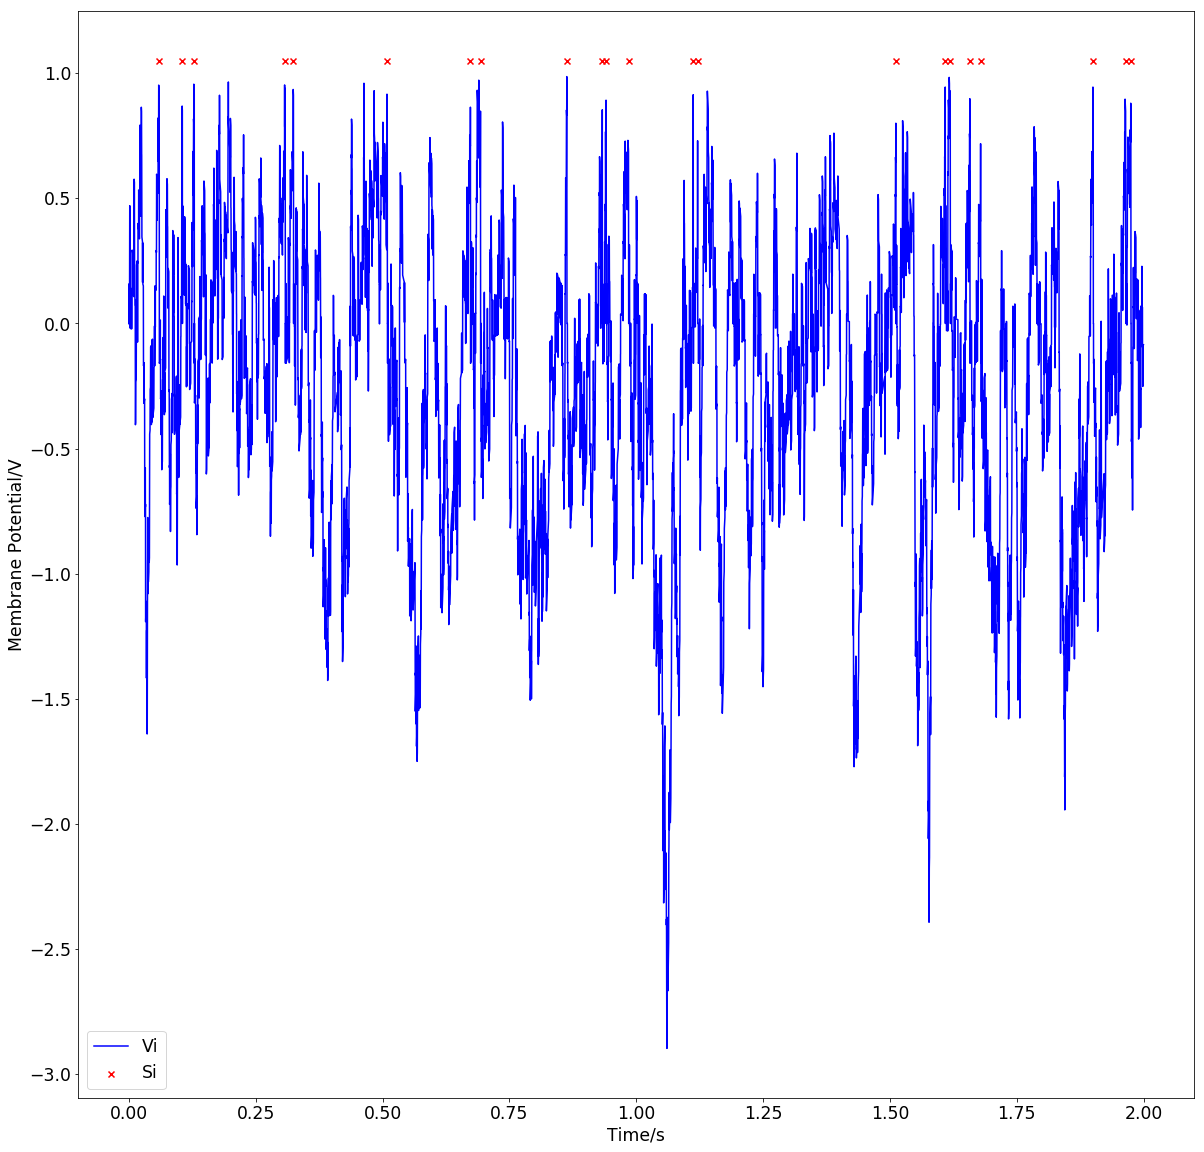

In [182]:
K=100
t=20*10**-3
rx=10
for i in range(20):
    w= (i-10) /100 +1.5
    print(w)
    SjE = gen_spike_train(2,K,dt,rx)
    SjI = gen_spike_train(2,K,dt,rx)
    
    single_LIF_neuron_EI_input(t,w,SjE,SjI,dt,V_t,True,False,True)

In [193]:
def comp_mean_cov_EI(tau,w,SjE,SjI,dt,V_t,reset = True,discard=0.1):
    samples = Sj.shape[0]
    K = Sj.shape[1]
    V = np.zeros(samples)
    Si = np.zeros(samples)   
    input_sum_E = np.sum(SjE,1)
    input_sum_I = np.sum(SjI,1)
    
    input_sum = input_sum_E - input_sum_I
    for i in range(samples-1): #calculate discrete time membrane potential
        #k = i+1
        #print(V[i])
        V[i+1]=V[i]+dt*(-V[i]/tau + w*input_sum_E[i]/np.sqrt(K) - w*input_sum_I[i]/np.sqrt(K))
        #print(V[i+1])
        if V[i+1]>V_t:
            if reset ==True:
                V[i+1]=0
            Si[i+1] = 1/dt
    plt.plot(V)
    plt.show()
    mean = np.average(V[int(discard/dt):])
    sd = np.std(V[int(discard/dt):])
    print(sd**2)
    return [mean,sd**2]

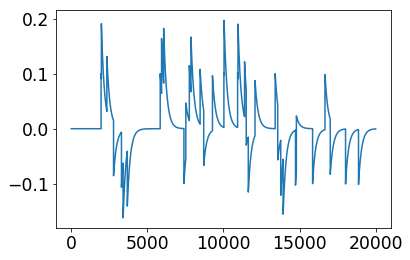

0.0023576722991875427


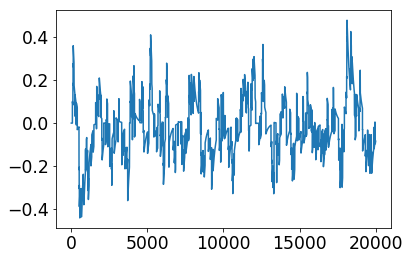

0.014892162467312314


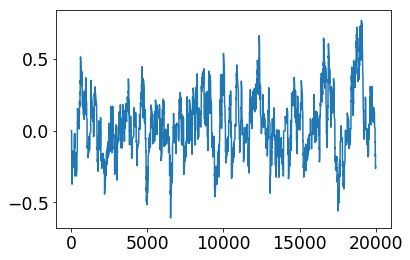

0.04203842214271764


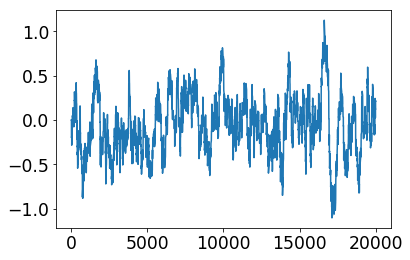

0.10330524657138962


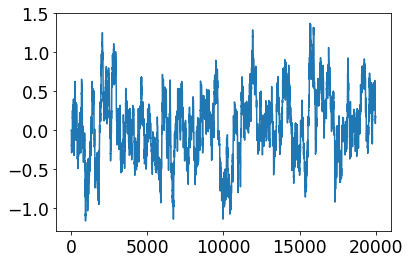

0.17861957002678255


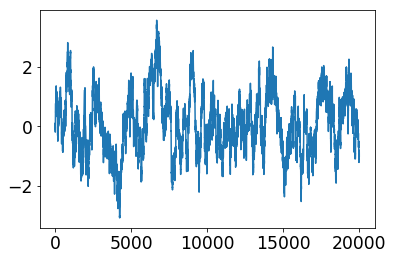

1.0301883802455447


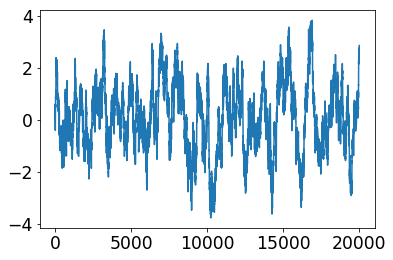

1.7165004272643911


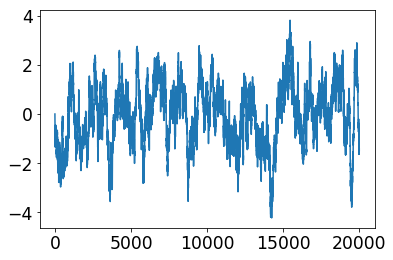

1.4943704261620503


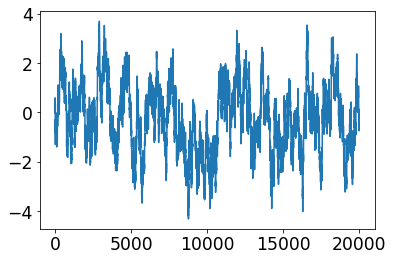

1.8357592843288733


In [194]:
N=1000
ks = np.array([1,10,25,50,100,500,800,900,1000])
moments = np.zeros((ks.shape[0],2))
rx=10
w=1
t = 0.02
for i in range(ks.shape[0]):
    SjE = gen_spike_train(10,ks[i],dt,rx)
    SjI = gen_spike_train(10,ks[i],dt,rx)
    moments[i,:] = comp_mean_cov_EI(t,w,SjE,SjI,dt,V_t,False)

    

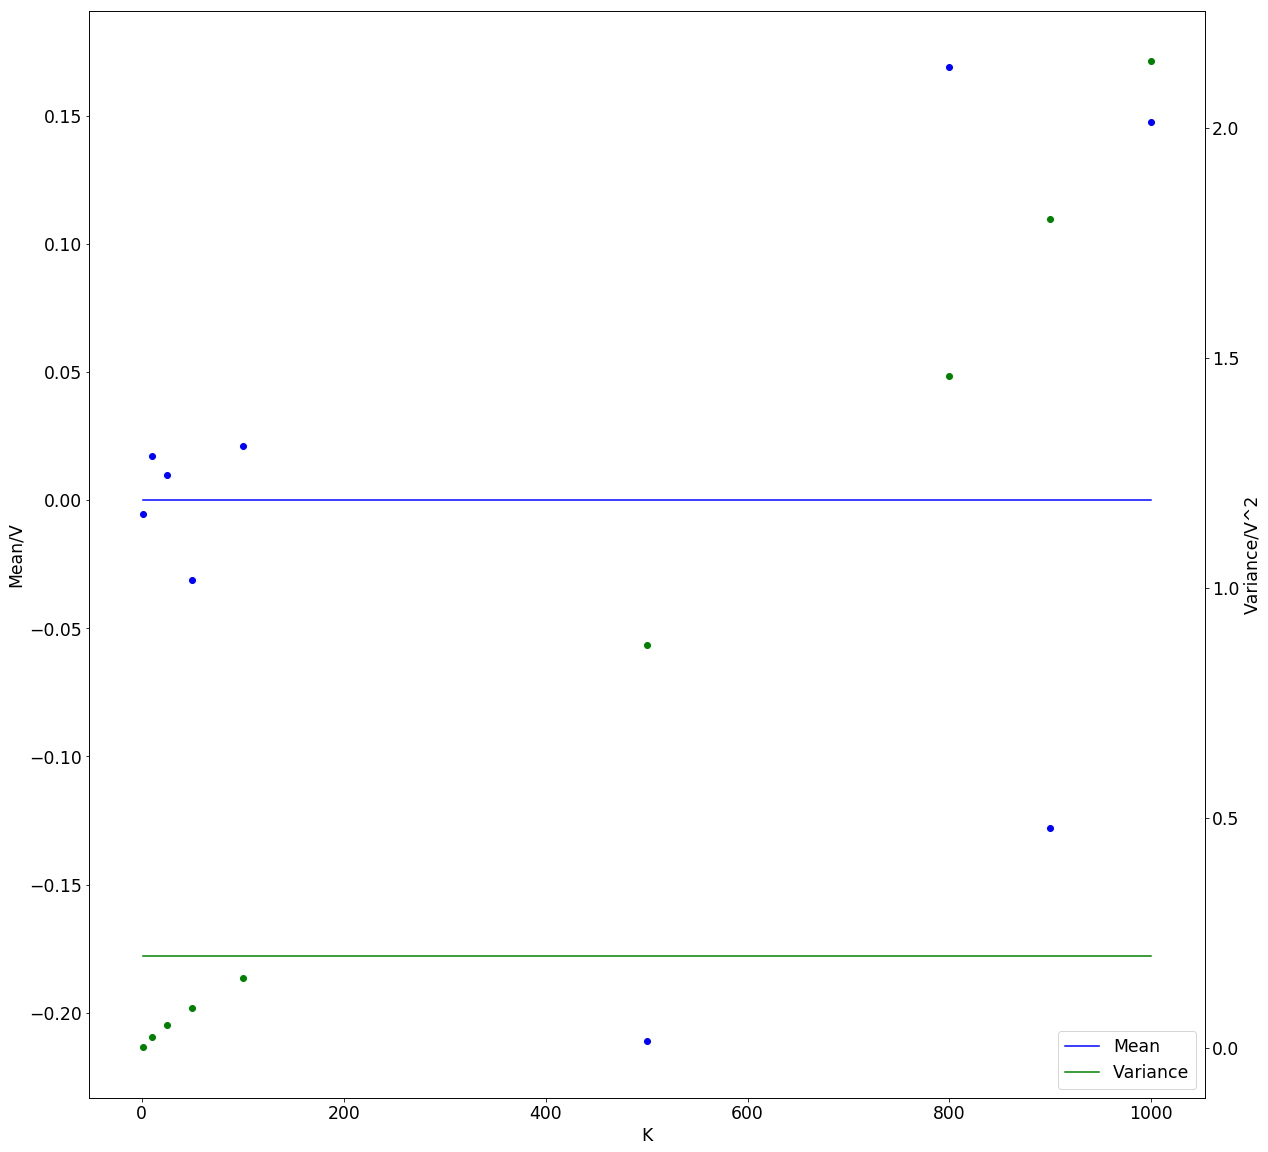

In [186]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(111)
plt.rc('axes', titlesize='xx-large')  # fontsize of the axes title
plt.rc('axes', labelsize='xx-large')  # fontsize of the x and y labels
plt.rc('xtick', labelsize='xx-large')  # fontsize of the tick labels
plt.rc('ytick', labelsize='xx-large')  # fontsize of the tick labels
plt.rc('legend', fontsize='xx-large')

pp= ax1.scatter(ks,moments[:,0],color='b',label='simulated means')
ax2 = ax1.twinx()
mp= ax2.scatter(ks,moments[:,1],color='g',label='simulated variance')

ax1.set_ylabel('Mean/V')
ax2.set_ylabel('Variance/V^2')
ax1.set_xlabel('K')


points = np.linspace(1,ks[-1],1000)
var = t *w**2 *rx * np.ones(points.shape)
me = np.zeros(points.shape)

pp = ax1.plot(points,me, color = 'b', label = 'Mean')
mm = ax2.plot(points,var,color = 'g',label = 'Variance')
#ax2.set_ylim(0,0.15)
lns = pp + mm
labs=[l.get_label() for l in lns]
ax1.legend(lns, labs,loc='lower right')
#plt.legend(loc='upper right')
plt.show()

In [203]:
# E and I populations are leaky integrate and fire neurons
def LIF_network(tau,J,dt,V_t,E_input,I_input,SX ,K, reset = True):
    samples = SX.shape[0]
    print(samples)
    N = SX.shape[1]
    print(N)
    V_E = np.zeros((samples,N))
    V_I = np.zeros((samples,N))
    
    SE = np.zeros((samples,N))
    SI = np.zeros((samples,N))

    sim_time = 0
    fire_counts = np.zeros((samples,2))
    
    for i in range(samples-1): #calculate discrete time membrane potential
        #k = i+1
        sim_time = i*dt
        if i%500 ==0:
            print('Time = ', sim_time)
        for j in range(N): 
            #E connections 
            # jth neuron in E
            
            h = J[0]*np.sum(SE[i,E_input[j,:,0]]) + J[2]*np.sum(SI[i,E_input[j,:,1]]) + J[4]*np.sum(SX[i,E_input[j,:,2]])
            V_E[i+1,j] = V_E[i,j] + dt*(-V_E[i,j]/tau + h/np.sqrt(K) )
        
        
            #I connections 
            # jth neuron in I
            h = J[1] * np.sum(SE[i,I_input[j,:,0]]) + J[3]*np.sum(SI[i,I_input[j,:,1]]) + J[5] * np.sum(SX[i,I_input[j,:,2]])
            V_I[i+1,j] = V_I[i,j] + dt*(-V_I[i,j]/tau + h/np.sqrt(K) )
        
            #checking to see if neurons have fired
            if V_E[i+1,j]>V_t:
                if reset ==True:
                    V_E[i+1,j]=0
                SE[i+1,j] = 1/dt
                fire_counts[i+1,0] += 1
            if V_I[i+1,j]>V_t:
                if reset ==True:
                    V_I[i+1,j]=0
                SI[i+1,j] = 1/dt
                fire_counts[i+1,1] += 1
    fire_counts = fire_counts/(dt*N)
    plt.plot(fire_counts[:,0],color = 'g')
    plt.plot(fire_counts[:,1],color = 'b')
    plt.show()
    av_fire = np.average(fire_counts,0)
    print(av_fire)
    print('E Av count', av_fire[0])
    print('I Av count', av_fire[1])
    
    
    return V_E,V_I,SE,SI
               
                
    #print(V)
    #plt.plot(Sj)
    #plt.plot(Si)
    #plt.plot(V)
    #plt.plot(input_sum)
    #plt.show()        

In [40]:
#weight parameters
JEE = 1
JIE = 1
JEI = -2
JII = -1.8
JEX = 1
JIX = 0.8

J = [JEE,JIE,JEI,JII,JEX,JIX]

N=1000
K=100

#connectivity 
E_input = np.random.randint(N, size=(N,K,3)) # N E neurons, each with 3K inputs, E, I K
I_input = np.random.randint(N, size=(N,K,3)) # this allows self connectivity?


SX = gen_spike_train(2,N,dt,rx)


VE,VI,SE,SI = LIF_network(t,J,dt,V_t,E_input,I_input,SX ,K, reset = True)

20000
1000
Time =  0.0
Time =  0.05
Time =  0.1
Time =  0.15
Time =  0.2
Time =  0.25
Time =  0.3
Time =  0.35000000000000003
Time =  0.4
Time =  0.45
Time =  0.5
Time =  0.55
Time =  0.6
Time =  0.65
Time =  0.7000000000000001
Time =  0.75
Time =  0.8
Time =  0.8500000000000001
Time =  0.9
Time =  0.9500000000000001
Time =  1.0
Time =  1.05
Time =  1.1
Time =  1.1500000000000001
Time =  1.2
Time =  1.25
Time =  1.3
Time =  1.35
Time =  1.4000000000000001
Time =  1.4500000000000002
Time =  1.5
Time =  1.55
Time =  1.6
Time =  1.6500000000000001
Time =  1.7000000000000002
Time =  1.75
Time =  1.8
Time =  1.85
Time =  1.9000000000000001
Time =  1.9500000000000002
[12.7465 11.636 ]
E Av count 12.7465
I Av count 11.636


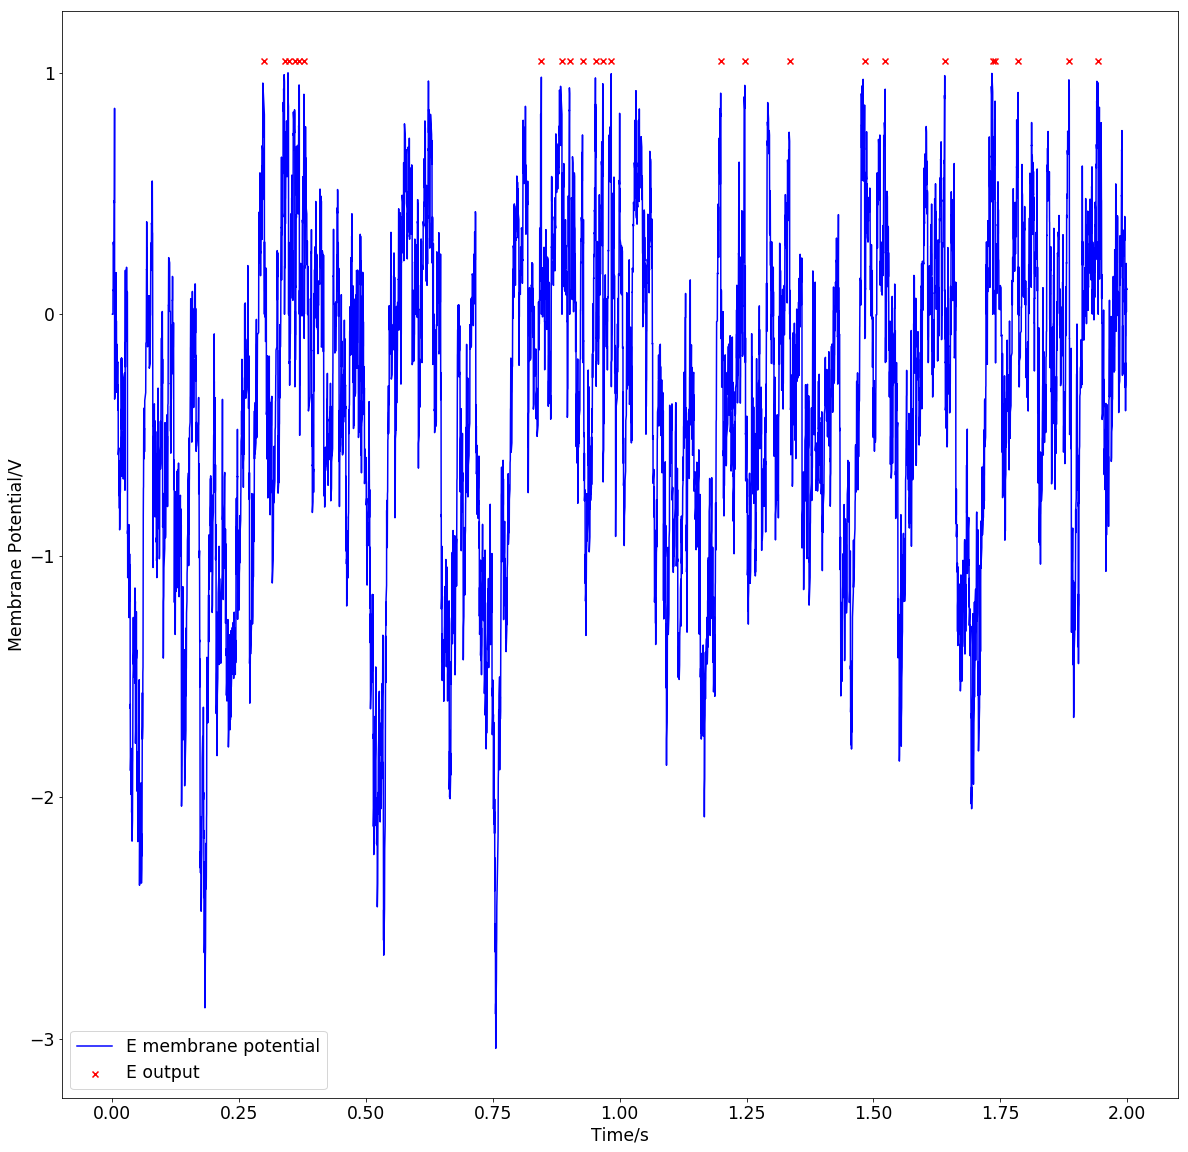

In [42]:
neuron =2  
plt.figure(figsize=(20, 20))
times = np.nonzero(SE[:,neuron]) # gets the indices of the neurons that fired
times = times[0]*dt
plt.scatter(times,np.ones(times.shape)*1.05,marker='x',color='r',label='E output')
  
samples = SE.shape[0]   
times= np.arange(0,samples*dt,dt)
plt.plot(times,VE[:,neuron],color='b',label='E membrane potential')
plt.ylabel('Membrane Potential/V')
plt.xlabel('Time/s')
plt.legend(loc = 'lower left')
plt.show()

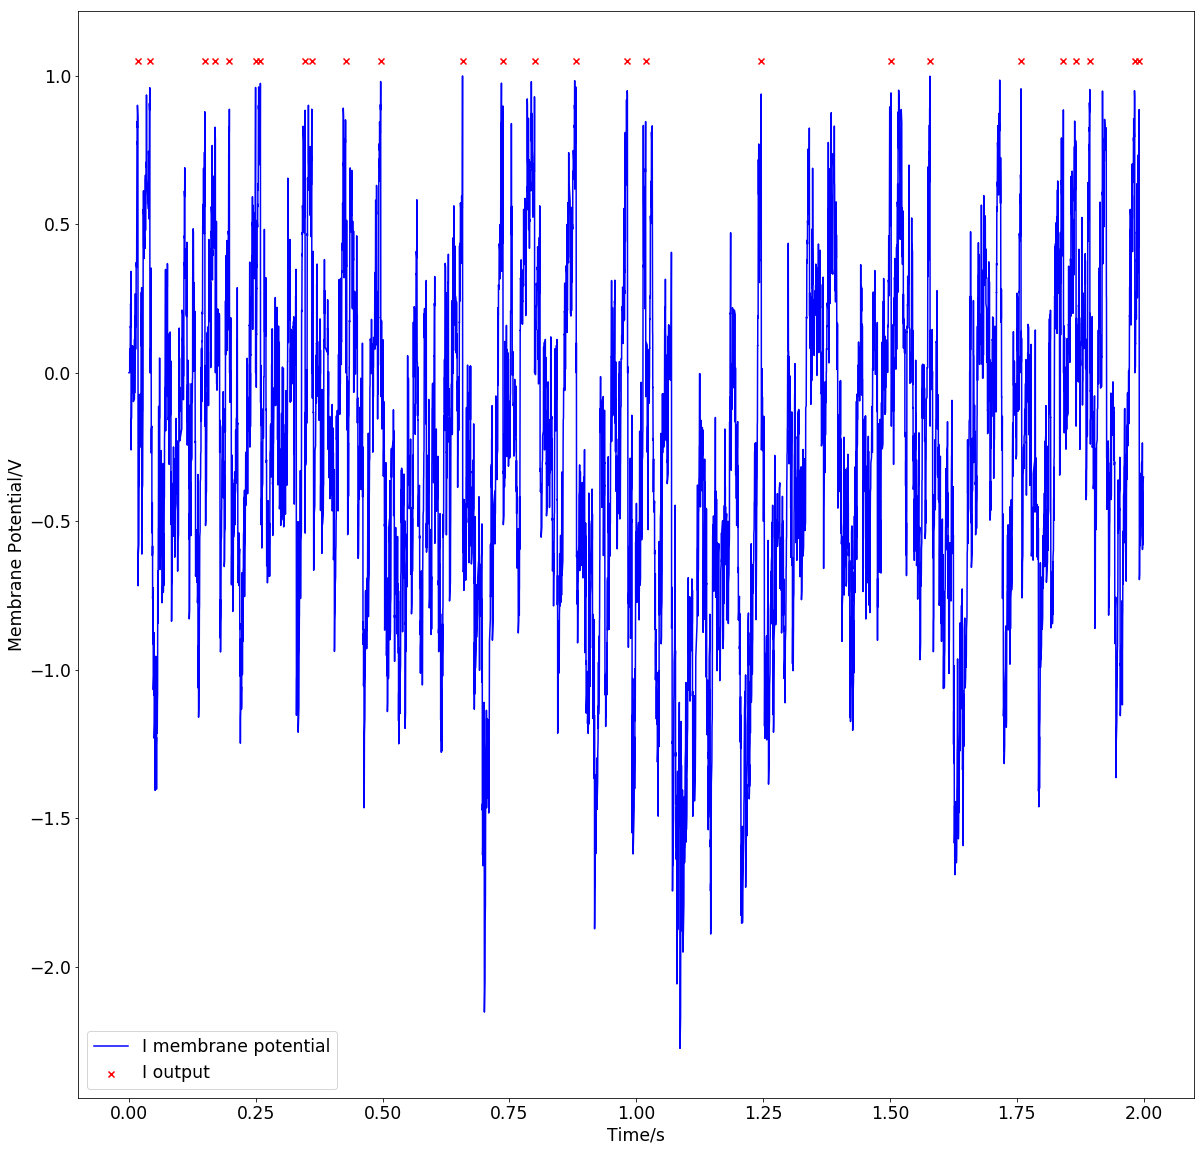

In [43]:
neuron =2  
plt.figure(figsize=(20, 20))
times = np.nonzero(SI[:,neuron]) # gets the indices of the neurons that fired
times = times[0]*dt
plt.scatter(times,np.ones(times.shape)*1.05,marker='x',color='r',label='I output')
  
samples = SI.shape[0]   
times= np.arange(0,samples*dt,dt)
plt.plot(times,VI[:,neuron],color='b',label='I membrane potential')
plt.ylabel('Membrane Potential/V')
plt.xlabel('Time/s')
plt.legend(loc = 'lower left')
plt.show()

In [48]:
#E_input = np.random.randint(N, size=(N,K,3)) # N E neurons, each with 3K inputs, E, I K
#I_input = np.random.randint(N, size=(N,K,3)) # this allows self connectivity?

rx = 5
SX = gen_spike_train(2,N,dt,rx)
VE_5,VI_5,SE_5,SI_5 = LIF_network(t,J,dt,V_t,E_input,I_input,SX ,K, reset = True)

20000
1000
Time =  0.0
Time =  0.05
Time =  0.1
Time =  0.15
Time =  0.2
Time =  0.25
Time =  0.3
Time =  0.35000000000000003
Time =  0.4
Time =  0.45
Time =  0.5
Time =  0.55
Time =  0.6
Time =  0.65
Time =  0.7000000000000001
Time =  0.75
Time =  0.8
Time =  0.8500000000000001
Time =  0.9
Time =  0.9500000000000001
Time =  1.0
Time =  1.05
Time =  1.1
Time =  1.1500000000000001
Time =  1.2
Time =  1.25
Time =  1.3
Time =  1.35
Time =  1.4000000000000001
Time =  1.4500000000000002
Time =  1.5
Time =  1.55
Time =  1.6
Time =  1.6500000000000001
Time =  1.7000000000000002
Time =  1.75
Time =  1.8
Time =  1.85
Time =  1.9000000000000001
Time =  1.9500000000000002
[7.1945 6.0675]
E Av count 7.1945
I Av count 6.0675


In [49]:
rx = 15
SX = gen_spike_train(2,N,dt,rx)
VE_15,VI_15,SE_15,SI_15 = LIF_network(t,J,dt,V_t,E_input,I_input,SX ,K, reset = True)

20000
1000
Time =  0.0
Time =  0.05
Time =  0.1
Time =  0.15
Time =  0.2
Time =  0.25
Time =  0.3
Time =  0.35000000000000003
Time =  0.4
Time =  0.45
Time =  0.5
Time =  0.55
Time =  0.6
Time =  0.65
Time =  0.7000000000000001
Time =  0.75
Time =  0.8
Time =  0.8500000000000001
Time =  0.9
Time =  0.9500000000000001
Time =  1.0
Time =  1.05
Time =  1.1
Time =  1.1500000000000001
Time =  1.2
Time =  1.25
Time =  1.3
Time =  1.35
Time =  1.4000000000000001
Time =  1.4500000000000002
Time =  1.5
Time =  1.55
Time =  1.6
Time =  1.6500000000000001
Time =  1.7000000000000002
Time =  1.75
Time =  1.8
Time =  1.85
Time =  1.9000000000000001
Time =  1.9500000000000002
[18.554 17.21 ]
E Av count 18.554
I Av count 17.21


In [50]:
rx = 20
SX = gen_spike_train(2,N,dt,rx)
VE_20,VI_20,SE_20,SI_20 = LIF_network(t,J,dt,V_t,E_input,I_input,SX ,K, reset = True)

20000
1000
Time =  0.0
Time =  0.05
Time =  0.1
Time =  0.15
Time =  0.2
Time =  0.25
Time =  0.3
Time =  0.35000000000000003
Time =  0.4
Time =  0.45
Time =  0.5
Time =  0.55
Time =  0.6
Time =  0.65
Time =  0.7000000000000001
Time =  0.75
Time =  0.8
Time =  0.8500000000000001
Time =  0.9
Time =  0.9500000000000001
Time =  1.0
Time =  1.05
Time =  1.1
Time =  1.1500000000000001
Time =  1.2
Time =  1.25
Time =  1.3
Time =  1.35
Time =  1.4000000000000001
Time =  1.4500000000000002
Time =  1.5
Time =  1.55
Time =  1.6
Time =  1.6500000000000001
Time =  1.7000000000000002
Time =  1.75
Time =  1.8
Time =  1.85
Time =  1.9000000000000001
Time =  1.9500000000000002
[24.041 22.69 ]
E Av count 24.041
I Av count 22.69


In [51]:
N=100
K=100

#connectivity 
E_input = np.random.randint(N, size=(N,K,3)) # N E neurons, each with 3K inputs, E, I K
I_input = np.random.randint(N, size=(N,K,3)) # this allows self connectivity?

rx = 10
SX = gen_spike_train(2,N,dt,rx)


VE_f,VI_f,SE_f,SI_f = LIF_network(t,J,dt,V_t,E_input,I_input,SX ,K, reset = True)

20000
100
Time =  0.0
Time =  0.05
Time =  0.1
Time =  0.15
Time =  0.2
Time =  0.25
Time =  0.3
Time =  0.35000000000000003
Time =  0.4
Time =  0.45
Time =  0.5
Time =  0.55
Time =  0.6
Time =  0.65
Time =  0.7000000000000001
Time =  0.75
Time =  0.8
Time =  0.8500000000000001
Time =  0.9
Time =  0.9500000000000001
Time =  1.0
Time =  1.05
Time =  1.1
Time =  1.1500000000000001
Time =  1.2
Time =  1.25
Time =  1.3
Time =  1.35
Time =  1.4000000000000001
Time =  1.4500000000000002
Time =  1.5
Time =  1.55
Time =  1.6
Time =  1.6500000000000001
Time =  1.7000000000000002
Time =  1.75
Time =  1.8
Time =  1.85
Time =  1.9000000000000001
Time =  1.9500000000000002
[13.94  12.785]
E Av count 13.94
I Av count 12.785


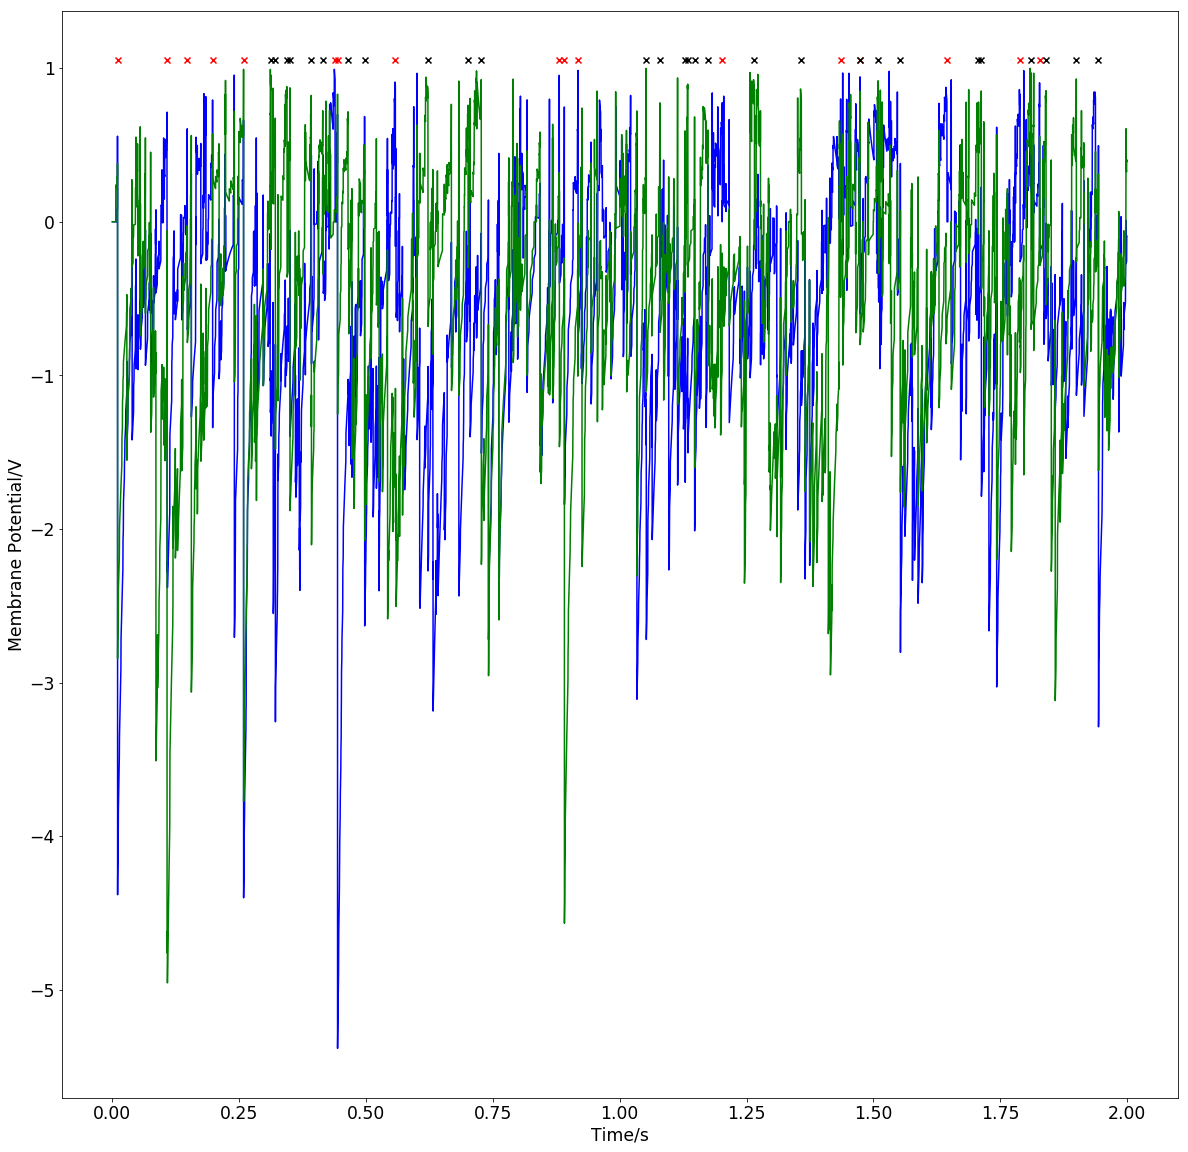

In [58]:

plt.figure(figsize=(20, 20))
times = np.nonzero(SI_f[:,0]) # gets the indices of the neurons that fired
times = times[0]*dt
plt.scatter(times,np.ones(times.shape)*1.05,marker='x',color='r',label='I output')
times = np.nonzero(SI_f[:,1]) # gets the indices of the neurons that fired
times = times[0]*dt
plt.scatter(times,np.ones(times.shape)*1.05,marker='x',color='k',label='I output')
  
samples = SI_f.shape[0]   
times= np.arange(0,samples*dt,dt)
plt.plot(times,VI_f[:,0],color='b',label='I membrane potential')
plt.plot(times,VI_f[:,1],color='g',label='I membrane potential')
plt.ylabel('Membrane Potential/V')
plt.xlabel('Time/s')
#plt.legend(loc = 'lower left')
plt.show()

In [90]:
import random
def gen_connect(K,N):
    con = np.zeros((N,K,3),dtype=int)
    for i in range(3): # each population
        for j in range(N): #each neuron
            con[j,:,i] = random.sample(range(N), K)       
    return con
    
    
    

In [92]:
#weight parameters
JEE = 1
JIE = 1
JEI = -2
JII = -1.8
JEX = 1
JIX = 0.8

J = [JEE,JIE,JEI,JII,JEX,JIX]

N=1000
K=100

#connectivity 
E_input = gen_connect(K,N) # N E neurons, each with 3K inputs, E, I K
I_input = gen_connect(K,N) # this allows self connectivity?

SX = gen_spike_train(2,N,dt,rx)
VE,VI,SE,SI = LIF_network(t,J,dt,V_t,E_input,I_input,SX ,K, reset = True)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
20000
1000
Time =  0.0
Time =  0.05
Time =  0.1
Time =  0.15
Time =  0.2
Time =  0.25
Time =  0.3
Time =  0.35000000000000003
Time =  0.4
Time =  0.45
Time =  0.5
Time =  0

In [93]:
rx = 5
SX = gen_spike_train(2,N,dt,rx)
VE_5,VI_5,SE_5,SI_5 = LIF_network(t,J,dt,V_t,E_input,I_input,SX ,K, reset = True)

20000
1000
Time =  0.0
Time =  0.05
Time =  0.1
Time =  0.15
Time =  0.2
Time =  0.25
Time =  0.3
Time =  0.35000000000000003
Time =  0.4
Time =  0.45
Time =  0.5
Time =  0.55
Time =  0.6
Time =  0.65
Time =  0.7000000000000001
Time =  0.75
Time =  0.8
Time =  0.8500000000000001
Time =  0.9
Time =  0.9500000000000001
Time =  1.0
Time =  1.05
Time =  1.1
Time =  1.1500000000000001
Time =  1.2
Time =  1.25
Time =  1.3
Time =  1.35
Time =  1.4000000000000001
Time =  1.4500000000000002
Time =  1.5
Time =  1.55
Time =  1.6
Time =  1.6500000000000001
Time =  1.7000000000000002
Time =  1.75
Time =  1.8
Time =  1.85
Time =  1.9000000000000001
Time =  1.9500000000000002
[6.9515 5.8305]
E Av count 6.9515
I Av count 5.8305


In [94]:
rx = 15
SX = gen_spike_train(2,N,dt,rx)
VE_15,VI_15,SE_15,SI_15 = LIF_network(t,J,dt,V_t,E_input,I_input,SX ,K, reset = True)

20000
1000
Time =  0.0
Time =  0.05
Time =  0.1
Time =  0.15
Time =  0.2
Time =  0.25
Time =  0.3
Time =  0.35000000000000003
Time =  0.4
Time =  0.45
Time =  0.5
Time =  0.55
Time =  0.6
Time =  0.65
Time =  0.7000000000000001
Time =  0.75
Time =  0.8
Time =  0.8500000000000001
Time =  0.9
Time =  0.9500000000000001
Time =  1.0
Time =  1.05
Time =  1.1
Time =  1.1500000000000001
Time =  1.2
Time =  1.25
Time =  1.3
Time =  1.35
Time =  1.4000000000000001
Time =  1.4500000000000002
Time =  1.5
Time =  1.55
Time =  1.6
Time =  1.6500000000000001
Time =  1.7000000000000002
Time =  1.75
Time =  1.8
Time =  1.85
Time =  1.9000000000000001
Time =  1.9500000000000002
[18.291 16.877]
E Av count 18.291
I Av count 16.877


In [95]:
rx = 20
SX = gen_spike_train(2,N,dt,rx)
VE_20,VI_20,SE_20,SI_20 = LIF_network(t,J,dt,V_t,E_input,I_input,SX ,K, reset = True)

20000
1000
Time =  0.0
Time =  0.05
Time =  0.1
Time =  0.15
Time =  0.2
Time =  0.25
Time =  0.3
Time =  0.35000000000000003
Time =  0.4
Time =  0.45
Time =  0.5
Time =  0.55
Time =  0.6
Time =  0.65
Time =  0.7000000000000001
Time =  0.75
Time =  0.8
Time =  0.8500000000000001
Time =  0.9
Time =  0.9500000000000001
Time =  1.0
Time =  1.05
Time =  1.1
Time =  1.1500000000000001
Time =  1.2
Time =  1.25
Time =  1.3
Time =  1.35
Time =  1.4000000000000001
Time =  1.4500000000000002
Time =  1.5
Time =  1.55
Time =  1.6
Time =  1.6500000000000001
Time =  1.7000000000000002
Time =  1.75
Time =  1.8
Time =  1.85
Time =  1.9000000000000001
Time =  1.9500000000000002
[24.2015 22.5095]
E Av count 24.2015
I Av count 22.5095


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
20000
100
Time =  0.0
Time =  0.05
Time =  0.1
Time =  0.15
Time =  0.2
Time =  0.25
Time =  0.3
Time =  0.35000000000000003
Time =  0.4
Time =  0.45
Time =  0.5
Time =  0.

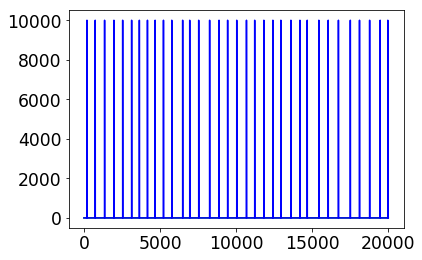

[ 0. 17.]
E Av count 0.0
I Av count 17.0
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
0.0 0.17


In [227]:
JEE = 1
JIE = 1
JEI = -2
JII = -1.8
JEX = 1
JIX = 0.8

J = [JEE,JIE,JEI,JII,JEX,JIX]


N=100
K=100
rx=10

#connectivity 
E_input_2 = gen_connect(K,N) # N E neurons, each with 3K inputs, E, I K
I_input_2 = gen_connect(K,N) # this allows self connectivity?

SX = gen_spike_train(2,N,dt,rx)

VE_f,VI_f,SE_f,SI_f = LIF_network(t,J,dt,V_t,E_input_2,I_input_2,SX ,K, reset = True)

ce = np.sum(SE_f,1)*dt
ci = np.sum(SI_f,1)*dt
print(ce)
print(ci)
ce1 = np.average(ce)
ci1=np.average(ci)
print(ce1, ci1)

33.463300000000004
[0.02   0.0743 0.1358 0.1972 0.2546 0.3135 0.3643 0.4175 0.4679 0.5227
 0.5772 0.6488 0.6952 0.7542 0.826  0.8878 0.9443 1.0041 1.0681 1.1221
 1.1823 1.2416 1.294  1.3601 1.4193 1.4674 1.5435 1.6053 1.6723 1.7505
 1.8108 1.8773 1.9466 1.9967]
17.2411
[0.0743 0.1972 0.3135 0.4175 0.5227 0.6488 0.7542 0.8878 1.0041 1.1221
 1.2416 1.3601 1.4674 1.6053 1.7505 1.8773 1.9967]
0.0
[]
0.0
[]


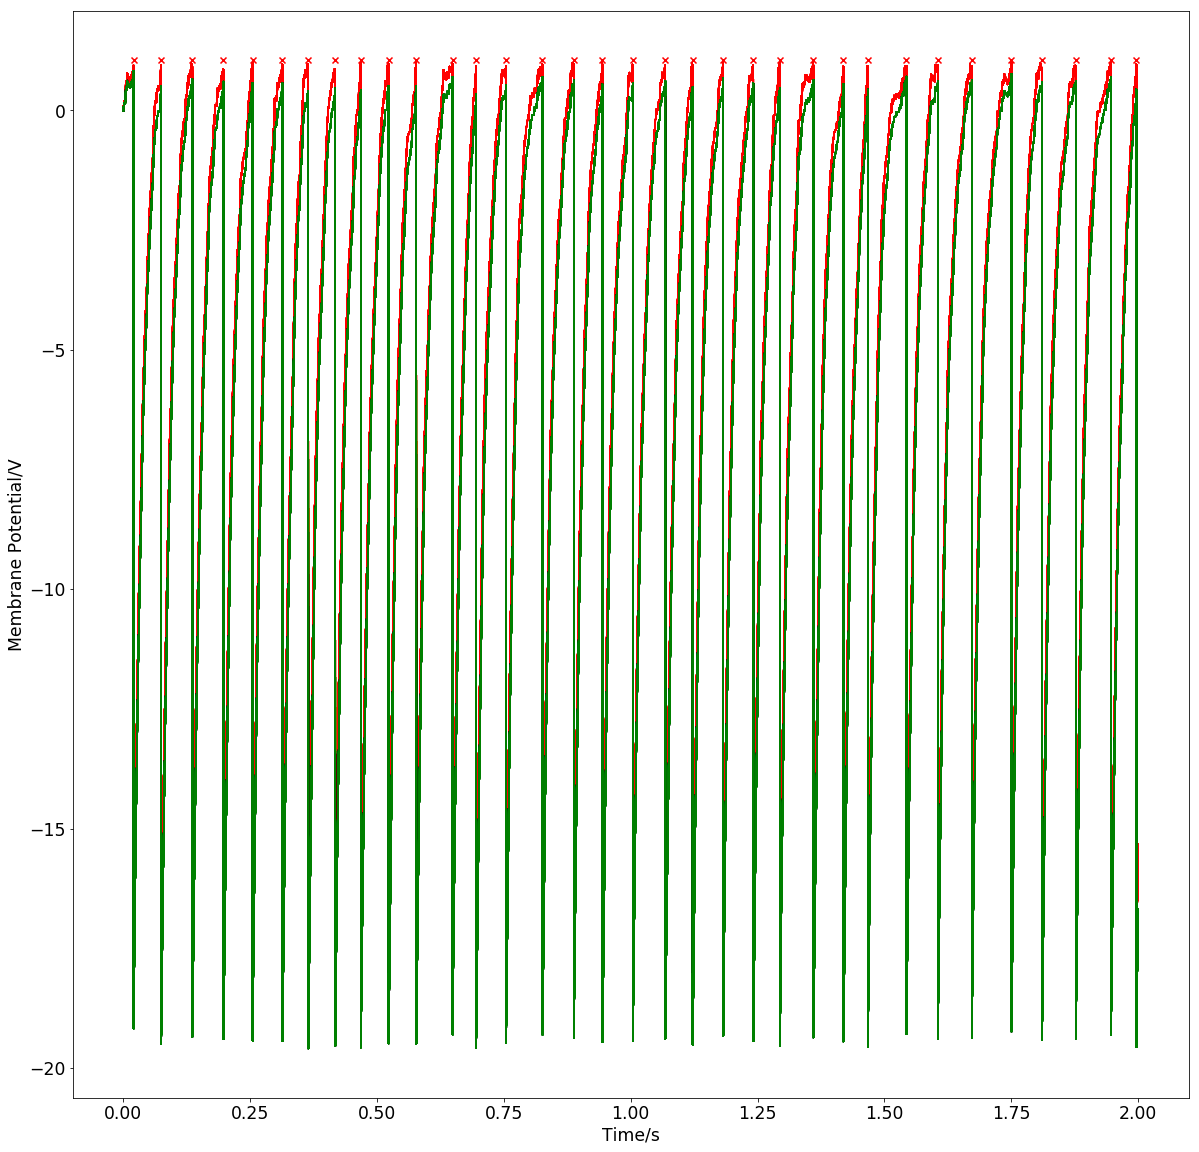

In [229]:
plt.figure(figsize=(20, 20))
times = np.nonzero(SI_f[:,0]) # gets the indices of the neurons that fired
times = times[0]*dt#*20
print(np.sum(times))
print(times)
plt.scatter(times,np.ones(times.shape)*1.05,marker='x',color='r',label='I output')
times = np.nonzero(SI_f[:,0]) # gets the indices of the neurons that fired
times = times[0][1::2]*dt#*20
print(np.sum(times))
print(times)
#plt.scatter(times,np.ones(times.shape)*1.1,marker='|',color='k',label='I output')


times = np.nonzero(SE_f[:,0]) # gets the indices of the neurons that fired
times = times[0][::2]*dt#*20
print(np.sum(times))
print(times)
plt.scatter(times,np.ones(times.shape)*1.25,marker='|',color='g',label='E output')
times = np.nonzero(SE_f[:,0]) # gets the indices of the neurons that fired
times = times[0][1::2]*dt#*20
print(np.sum(times))
print(times)
plt.scatter(times,np.ones(times.shape)*1.35,marker='|',color='b',label='E output')
    
    
samples = SI_f.shape[0]   
times= np.arange(0,samples*dt,dt)
plt.plot(times,VI_f[:,:],color='r',label='I membrane potential')
plt.plot(times,VE_f[:,:],color='g',label='E membrane potential')
plt.ylabel('Membrane Potential/V')
plt.xlabel('Time/s')
#plt.legend(loc = 'lower left')
plt.show()

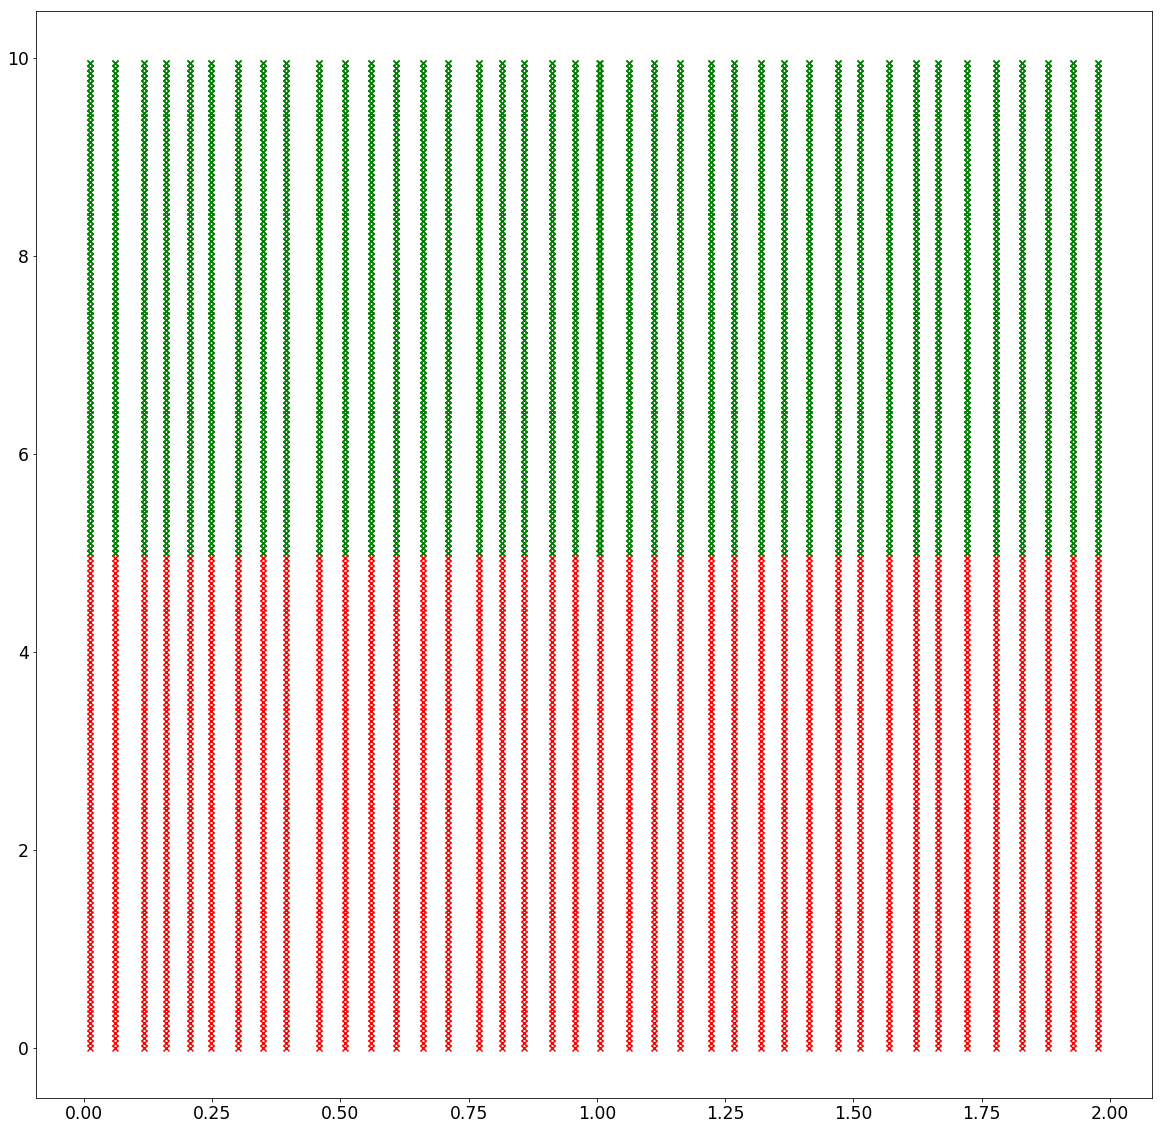

In [207]:



plt.figure(figsize=(20, 20))

for i in range(100):

    times = np.nonzero(SI_f[:,i]) # gets the indices of the neurons that fired
    times = times[0]*dt
    mult = 0+ 0.05*i
    plt.scatter(times,np.ones(times.shape)*mult,marker='x',color='r',label='I output')
    
    times = np.nonzero(SE_f[:,i]) # gets the indices of the neurons that fired
    times = times[0]*dt
    mult = 5+ 0.05*i
    plt.scatter(times,np.ones(times.shape)*mult,marker='x',color='g',label='I output')
plt.show()

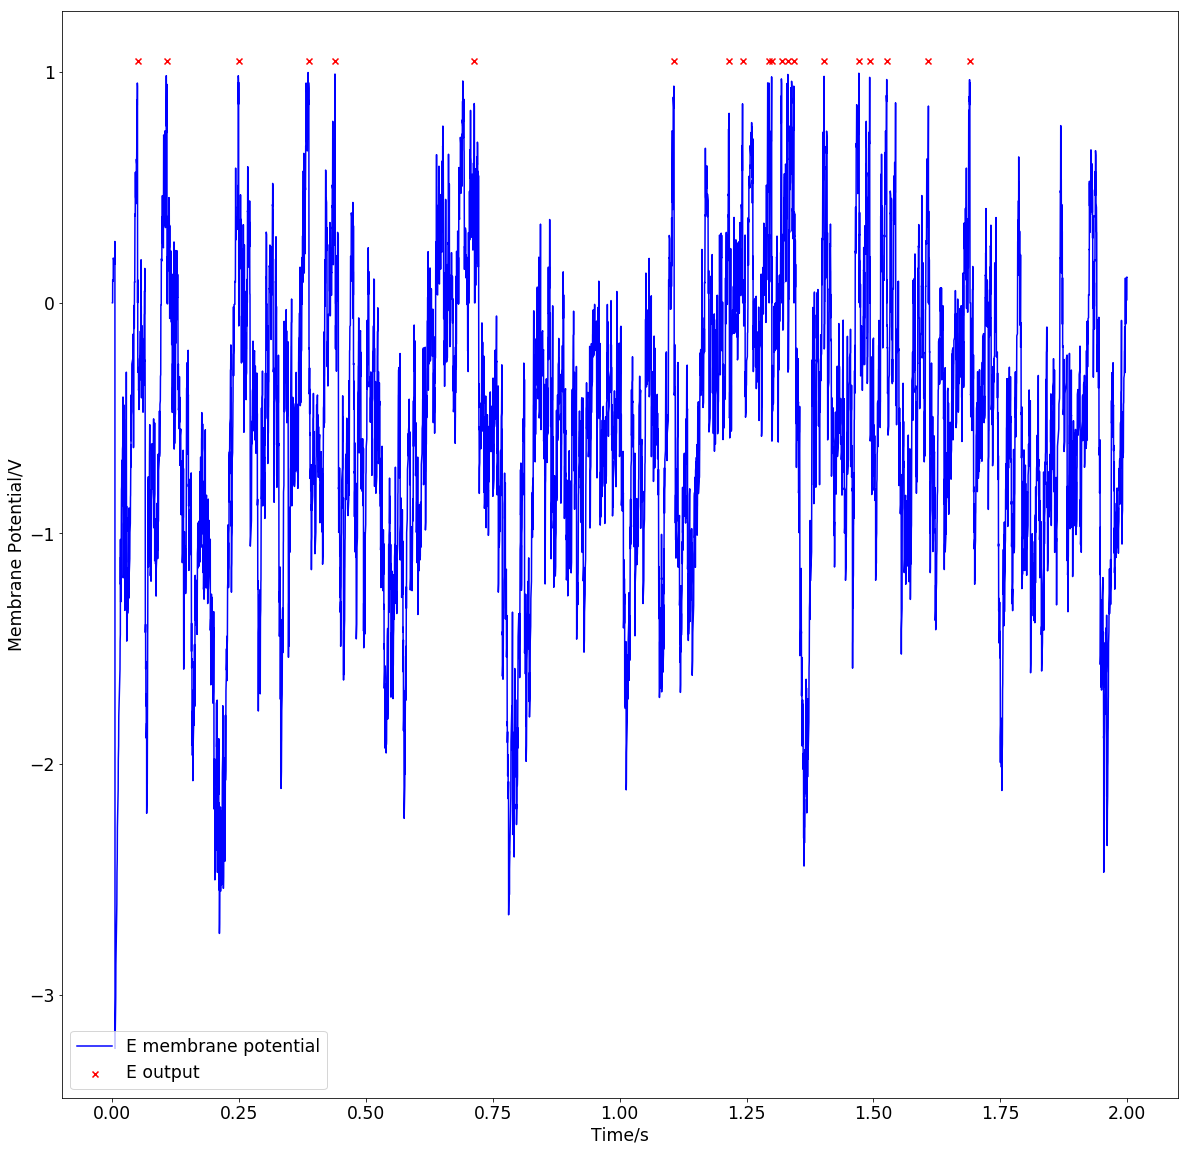

In [141]:
neuron =2  
plt.figure(figsize=(20, 20))
times = np.nonzero(SE[:,neuron]) # gets the indices of the neurons that fired
times = times[0]*dt
plt.scatter(times,np.ones(times.shape)*1.05,marker='x',color='r',label='E output')
  
samples = SE.shape[0]   
times= np.arange(0,samples*dt,dt)
plt.plot(times,VE[:,neuron],color='b',label='E membrane potential')
plt.ylabel('Membrane Potential/V')
plt.xlabel('Time/s')
plt.legend(loc = 'lower left')
plt.show()

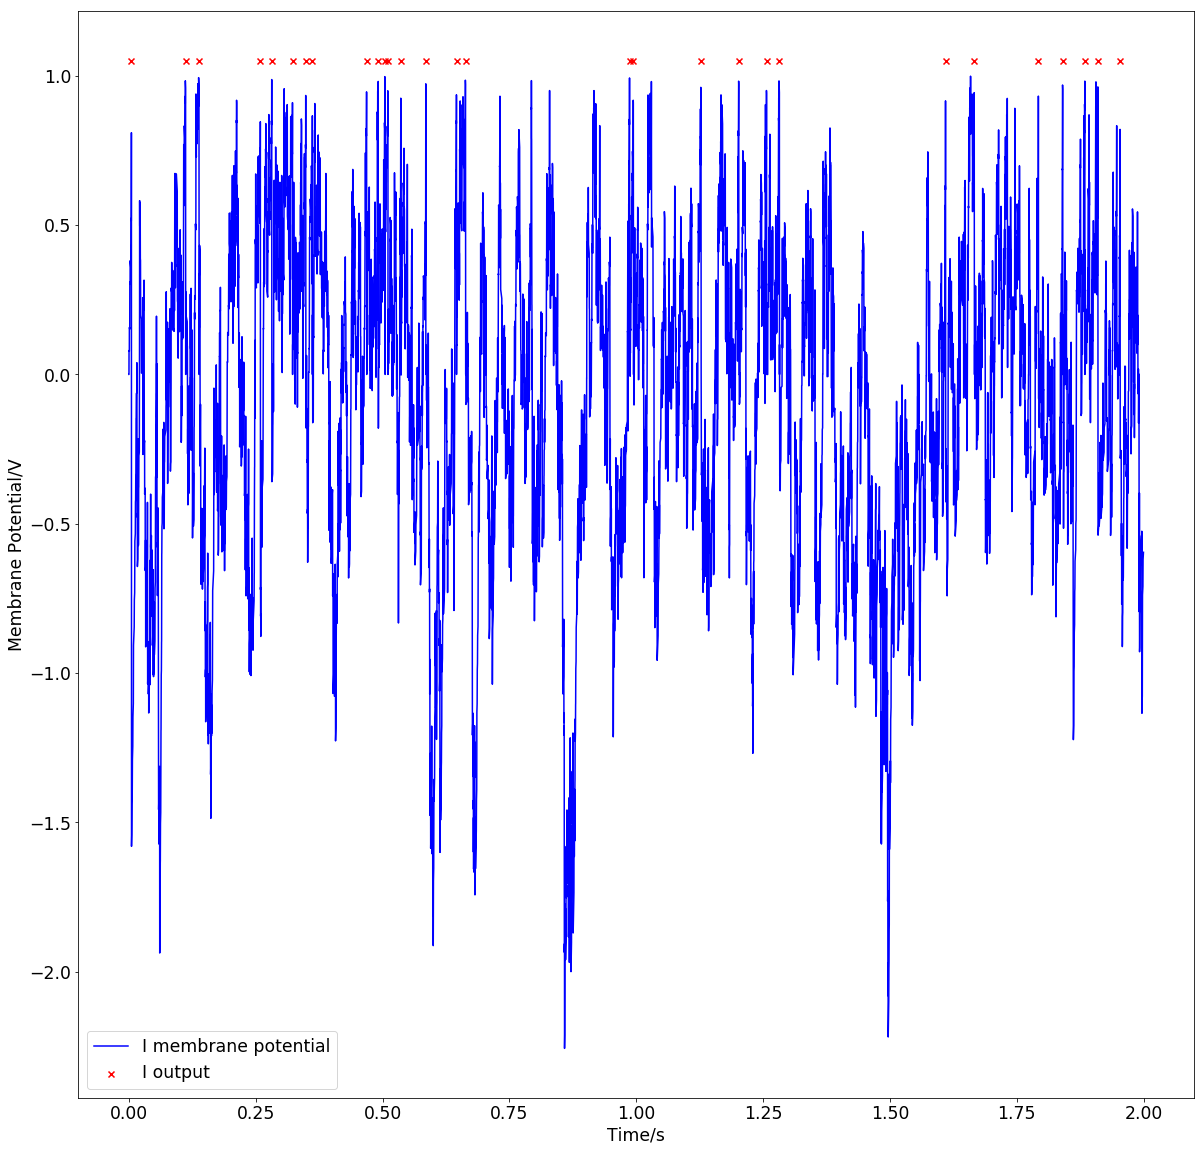

In [142]:
neuron =2  
plt.figure(figsize=(20, 20))
times = np.nonzero(SI[:,neuron]) # gets the indices of the neurons that fired
times = times[0]*dt
plt.scatter(times,np.ones(times.shape)*1.05,marker='x',color='r',label='I output')
  
samples = SE.shape[0]   
times= np.arange(0,samples*dt,dt)
plt.plot(times,VI[:,neuron],color='b',label='I membrane potential')
plt.ylabel('Membrane Potential/V')
plt.xlabel('Time/s')
plt.legend(loc = 'lower left')
plt.show()

In [248]:
JEE = 1
JIE = 1
JEI = -2
JII = -1.8
JEX = 1
JIX = 0.8


A = np.array([[JEE,JEI],[JIE,JII]])
B =np.array([-JEX,-JIX] ) + 1/np.sqrt(100)*np.array([JEE+JEI+JEX,JIE+JII+JIX] )
B=B.T
print(A)

rates = np.linalg.solve(A,B)
print(rates)

#Im = (JEE*(+JII-JEI)+JEI*(JEE-JIE)  )/( JEE*(JEX-JIX) -JEX*(JEE-JIE)  )

#delta = (5b    JII-JEE)/(JEE-JIE)
#gamma =(-JEX+JIX)/(JEE-JIE)
#alpha =JEE* (delta)+ JEI
#beta = JEE* (-gamma)- JEX

#print(alpha,beta,delta,gamma)

#Im = alpha/beta
#Em = delta*alpha/beta + gamma

#print(Im)

#print(10*Im)


[[ 1.  -2. ]
 [ 1.  -1.8]]
[1. 1.]
